In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import defaultdict
import numpy as np
import seaborn as sns

In [2]:
files_pattern = r'C:\Users\Lachlan\Desktop\PlayByPlayData\*.csv'

def load_data(file_pattern):
    files = glob.glob(file_pattern)
    dataframes = {file: pd.read_csv(file) for file in files}
    return dataframes

dataframes = load_data(files_pattern)

# Display loaded dataframes keys (file names)
dataframes.keys()


dict_keys(['C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp1997.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp1998.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp1999.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2000.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2001.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2002.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2003.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2004.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2005.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2006.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2007.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2008.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2009.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2010.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2011.csv', 'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2012.csv', 'C:\\Users\\Lachlan\\Desktop\

In [3]:
sample_file = list(dataframes.keys())[0]

print(f"Previewing data from file: {sample_file}")

dataframes[sample_file].head()


Previewing data from file: C:\Users\Lachlan\Desktop\PlayByPlayData\pbp1997.csv


gameid  period        clock  h_pts  a_pts team  playerid      player  \
0  29600001       1  PT12M00.00S    0.0    0.0  NaN         0         NaN   
1  29600001       1  PT12M00.00S    0.0    0.0  BOS       442  P. Ellison   
2  29600001       1  PT11M39.00S    0.0    2.0  CHI        23   D. Rodman   
3  29600001       1  PT11M39.00S    0.0    0.0  BOS       442  P. Ellison   
4  29600001       1  PT11M39.00S    0.0    3.0  CHI        23   D. Rodman   

         type            subtype result  x  y  dist  \
0      period              start    NaN  0  0     0   
1   Jump Ball                NaN    NaN  0  0     0   
2   Made Shot         Layup Shot   Made  0  0     0   
3        Foul           Shooting    NaN  0  0     0   
4  Free Throw  Free Throw 1 of 1    NaN  0  0     0   

                                           desc  season  
0            Start of 1st Period (11:15 PM EST)    1997  
1  Jump Ball Ellison vs. Longley: Tip to Harper    1997  
2         Rodman  Layup (2 PTS) (Longley 1 AST)    1997  
3                        Ellison S.FOUL (P1.T1)    1997  
4              Rodman Free Throw 1 of 1 (3 PTS)    1997

In [29]:
# init arrays for made and missed 3PT shots 
made_shots = [0] * 14
missed_shots = [0] * 14

year_index_map = {f'C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp{year}.csv': year - 2010 for year in range(2010, 2024)}


In [30]:
# Steph Curry's player ID
curry_player_id = 201939

# Iterate through files from 2010 onwards
for file, df in list(dataframes.items())[13:]:  # Starting from the 13th item (2010)
    year_index = year_index_map[file]  # Get the corresponding index for the year
    for _, row in df.iterrows():
        if row['playerid'] == curry_player_id and '3PT' in str(row['desc']) and row['team'] == 'GSW':
            if row['type'] == 'Made Shot':
                made_shots[year_index] += 1
            elif row['type'] == 'Missed Shot':
                missed_shots[year_index] += 1

# display counts of made and missed 3PT shots
print("Made Shots:", made_shots)
print("Missed Shots:", missed_shots)

Made Shots: [166, 151, 55, 314, 283, 384, 482, 394, 246, 422, 12, 349, 376, 330]
Missed Shots: [214, 191, 66, 392, 389, 494, 602, 563, 336, 568, 37, 476, 603, 466]


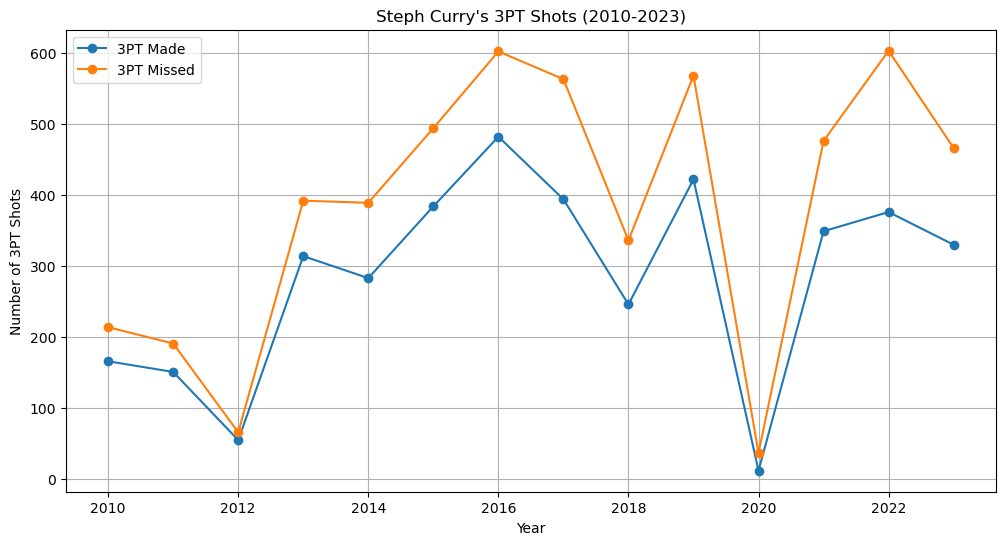

In [8]:
years = list(range(2010, 2024))

# plt made/ missed shots
plt.figure(figsize=(12, 6))
plt.plot(years, made_shots, marker='o', label='3PT Made')
plt.plot(years, missed_shots, marker='o', label='3PT Missed')

plt.title("Steph Curry's 3PT Shots (2010-2023)")
plt.xlabel("Year")
plt.ylabel("Number of 3PT Shots")
plt.legend()
plt.grid(True)

plt.show()


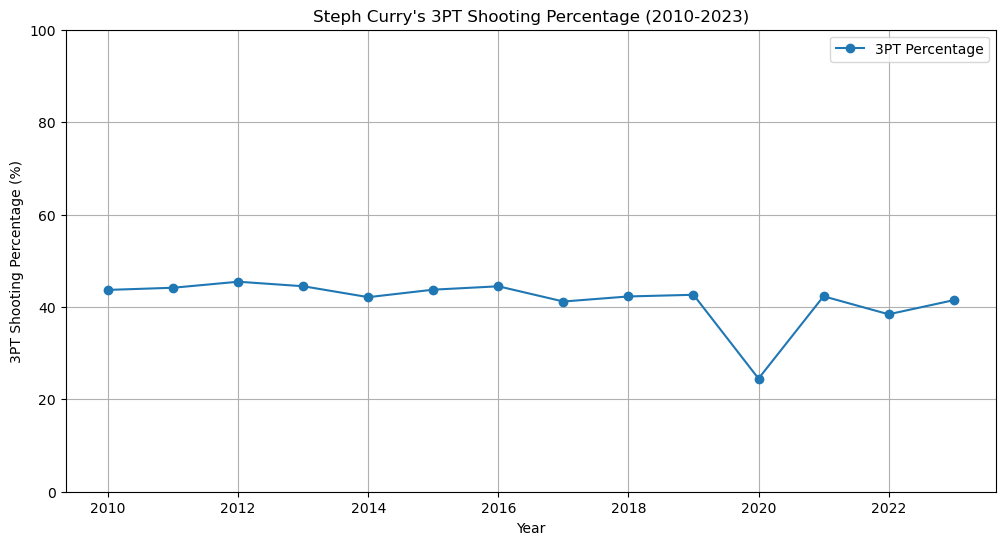

In [32]:
# calc Steph 3PT percentage across the years
three_pt_percentage = [(made / (made + missed)) * 100 for made, missed in zip(made_shots, missed_shots)]

years = list(range(2010, 2024))

# plot
plt.figure(figsize=(12, 6))
plt.plot(years, three_pt_percentage, marker='o', label='3PT Percentage')

# Add titles and labels
plt.title("Steph Curry's 3PT Shooting Percentage (2010-2023)")
plt.xlabel("Year")
plt.ylabel("3PT Shooting Percentage (%)")
plt.ylim(0, 100)  
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [3]:
teams_shots = defaultdict(lambda: [[0, 0] for _ in range(25)])  # 25 years from 1999 to 2023

# Iterate through all dataframes
for file, df in dataframes.items():
    year = int(file.split('pbp')[1].split('.')[0])
    if 1999 <= year <= 2023:
        index = year - 1999
        for _, row in df.iterrows():
            if '3PT' in str(row['desc']):
                team = row['team']
                if row['type'] == 'Made Shot':
                    teams_shots[team][index][0] += 1  
                elif row['type'] == 'Missed Shot':
                    teams_shots[team][index][1] += 1 


In [9]:
sample_team = 'GSW'
for year in range(1999, 2024):
    index = year - 1999
    makes, misses = teams_shots[sample_team][index]
    print(f"Year: {year}, Team: {sample_team}, Makes: {makes}, Misses: {misses}")

Year: 1999, Team: GSW, Makes: 162, Misses: 403
Year: 2000, Team: GSW, Makes: 345, Misses: 724
Year: 2001, Team: GSW, Makes: 282, Misses: 682
Year: 2002, Team: GSW, Makes: 320, Misses: 674
Year: 2003, Team: GSW, Makes: 425, Misses: 810
Year: 2004, Team: GSW, Makes: 429, Misses: 854
Year: 2005, Team: GSW, Makes: 624, Misses: 1150
Year: 2006, Team: GSW, Makes: 625, Misses: 1207
Year: 2007, Team: GSW, Makes: 822, Misses: 1485
Year: 2008, Team: GSW, Makes: 761, Misses: 1424
Year: 2009, Team: GSW, Makes: 550, Misses: 925
Year: 2010, Team: GSW, Makes: 633, Misses: 1054
Year: 2011, Team: GSW, Makes: 685, Misses: 1064
Year: 2012, Team: GSW, Makes: 524, Misses: 827
Year: 2013, Team: GSW, Makes: 762, Misses: 1138
Year: 2014, Team: GSW, Makes: 841, Misses: 1380
Year: 2015, Team: GSW, Makes: 1123, Misses: 1735
Year: 2016, Team: GSW, Makes: 1383, Misses: 1987
Year: 2017, Team: GSW, Makes: 1196, Misses: 1921
Year: 2018, Team: GSW, Makes: 1005, Misses: 1614
Year: 2019, Team: GSW, Makes: 1252, Misses: 

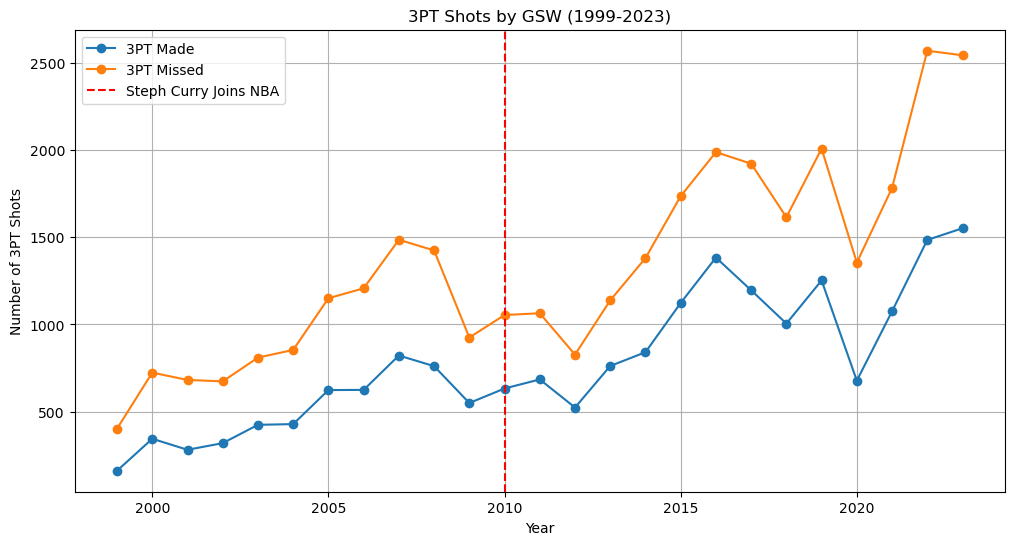

In [10]:
sample_team = 'GSW'

team_data = teams_shots[sample_team]

# Separate data into made and missed shots
made_shots_team = [year_data[0] for year_data in team_data]
missed_shots_team = [year_data[1] for year_data in team_data]

years = list(range(1999, 2023 + 1))

# Plot made and missed shots for  GSW 
plt.figure(figsize=(12, 6))
plt.plot(years, made_shots_team, marker='o', label='3PT Made')
plt.plot(years, missed_shots_team, marker='o', label='3PT Missed')

plt.title(f"3PT Shots by {sample_team} (1999-2023)")
plt.axvline(x=2010, color='r', linestyle='--', label='Steph Curry Joins NBA')
plt.xlabel("Year")
plt.ylabel("Number of 3PT Shots")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

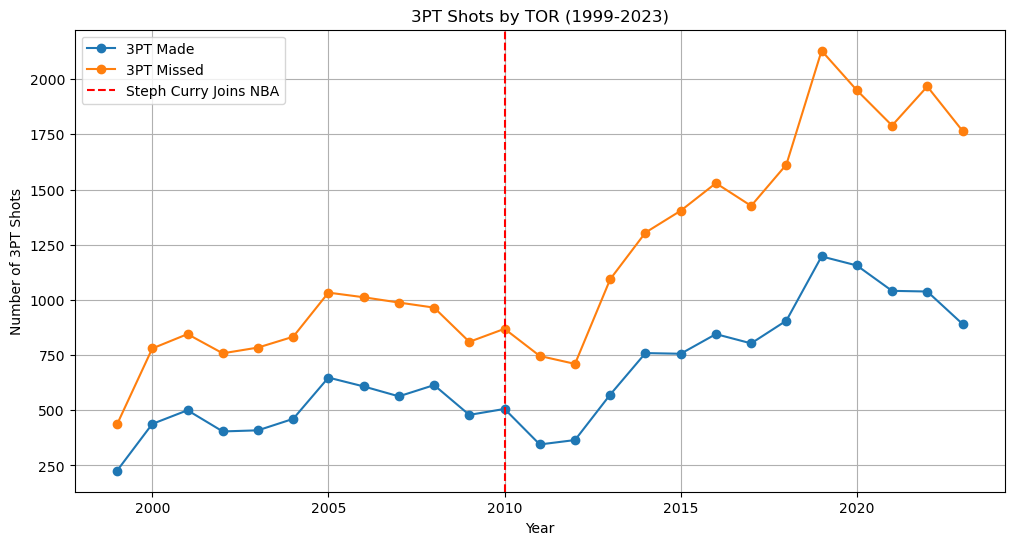

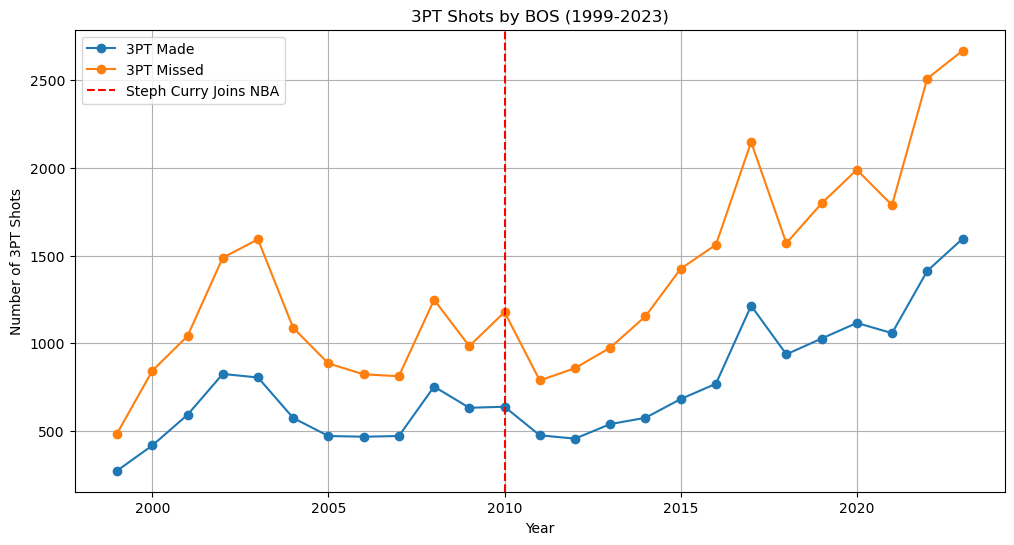

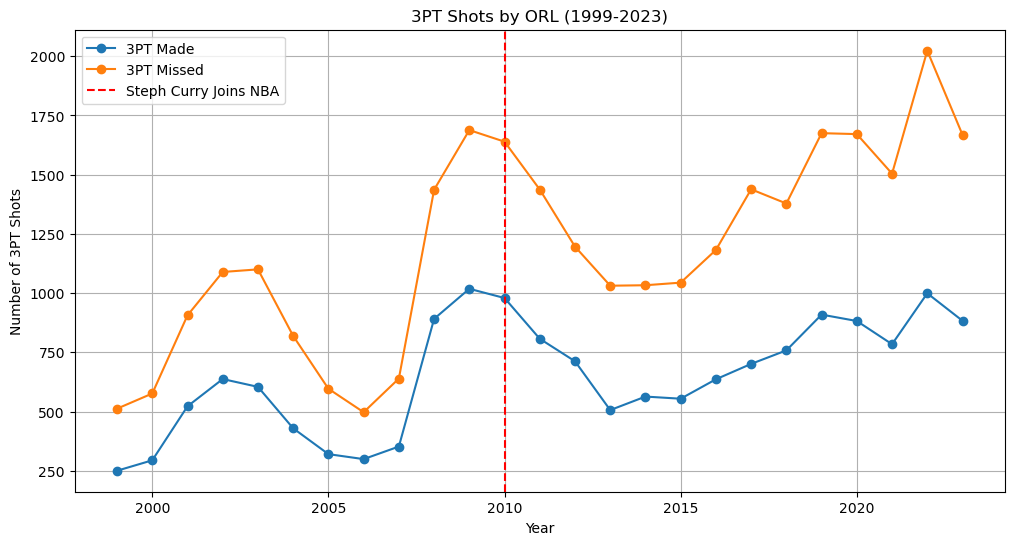

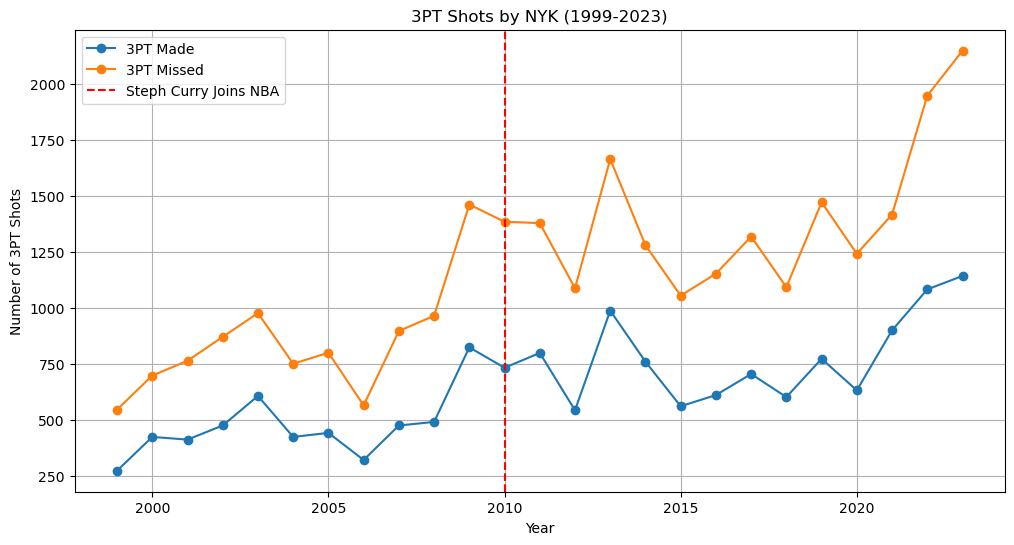

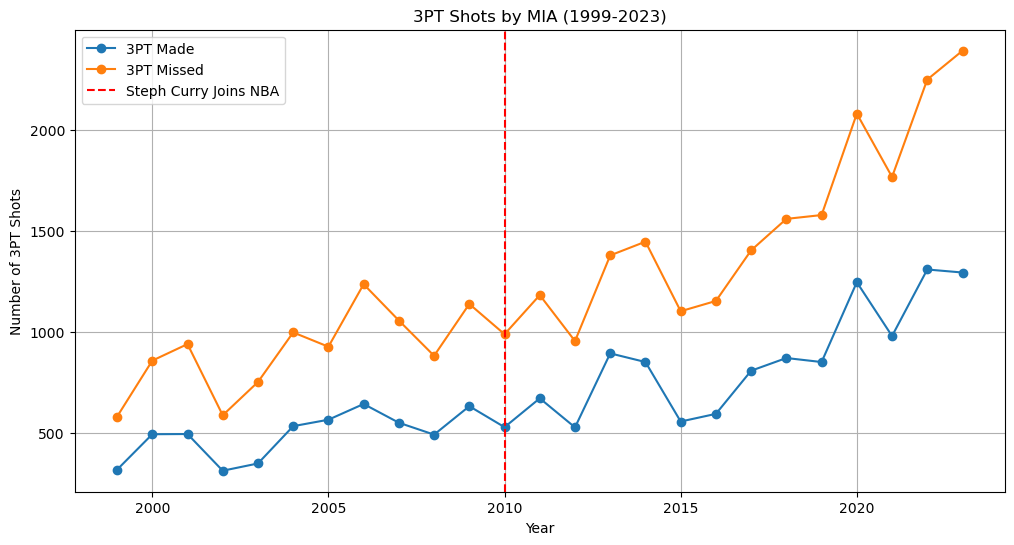

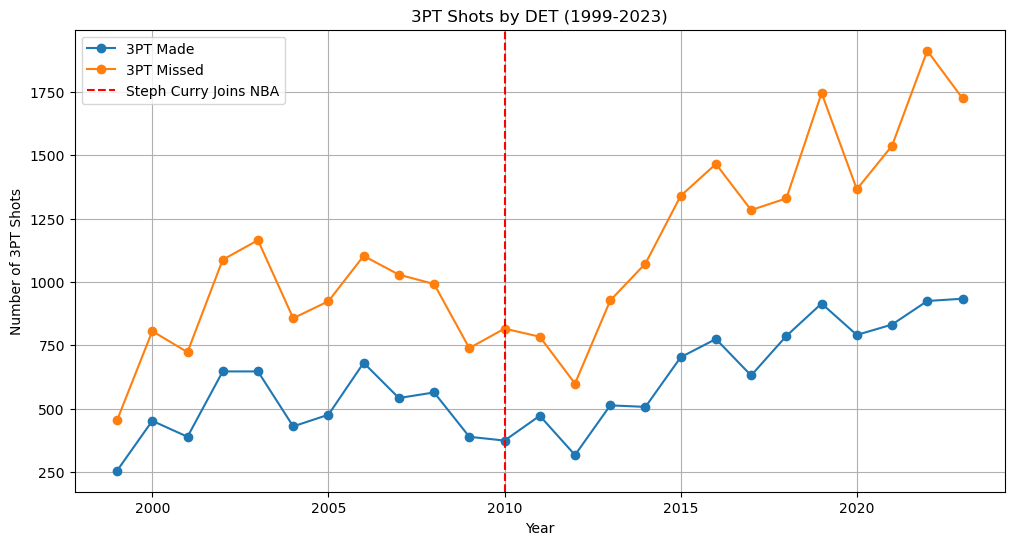

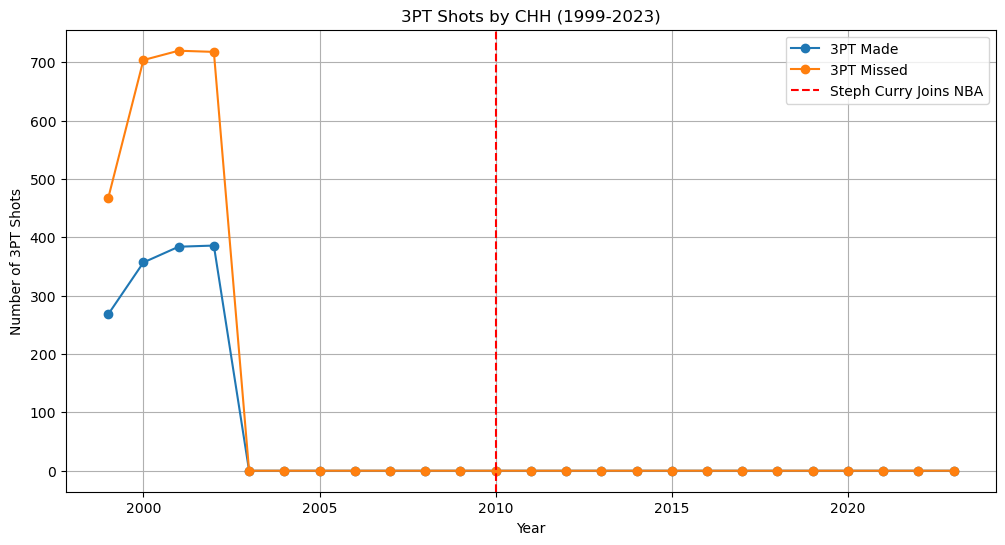

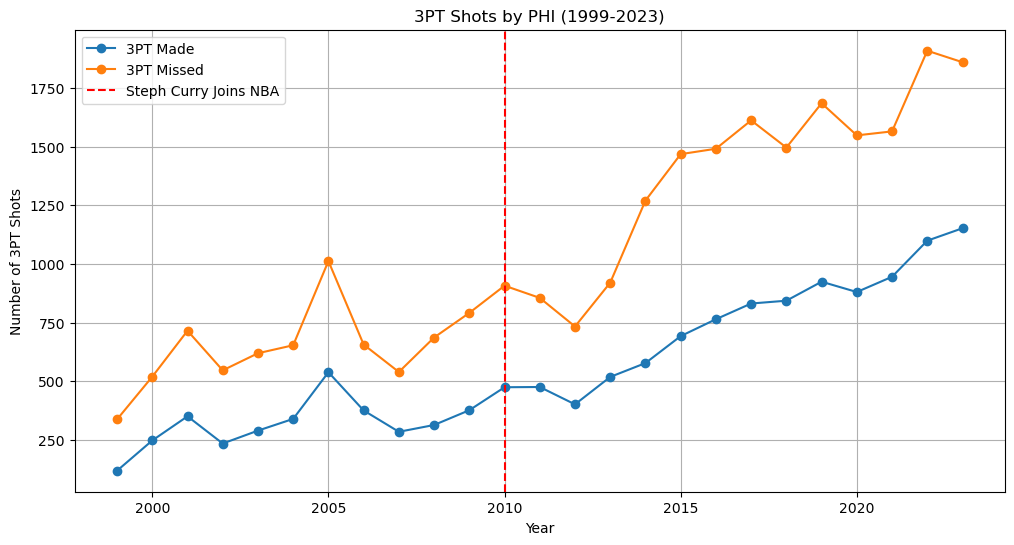

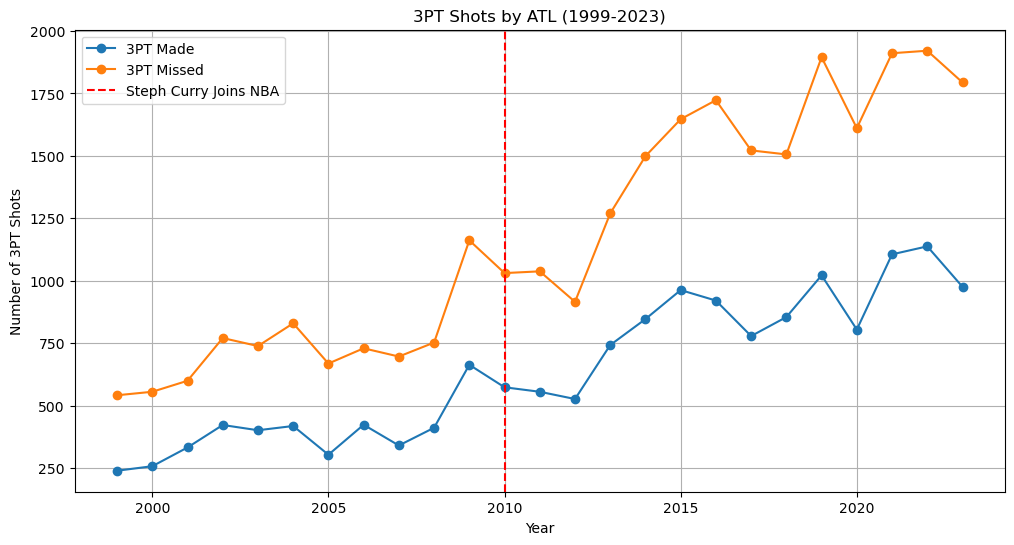

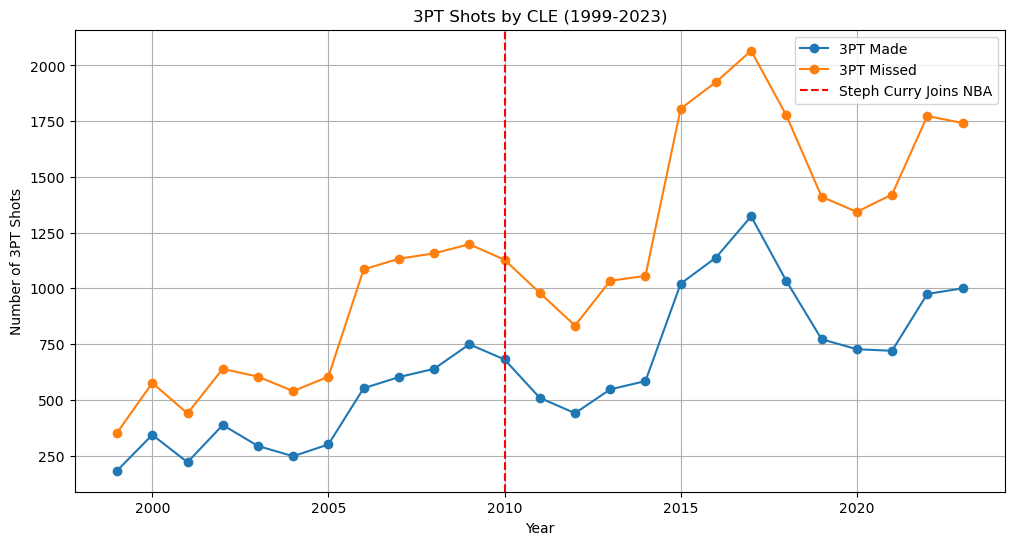

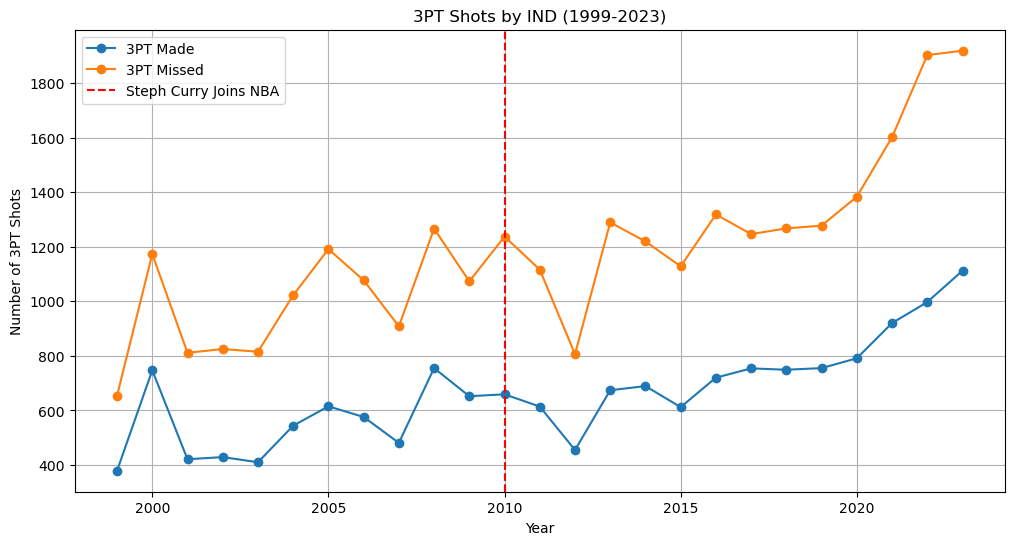

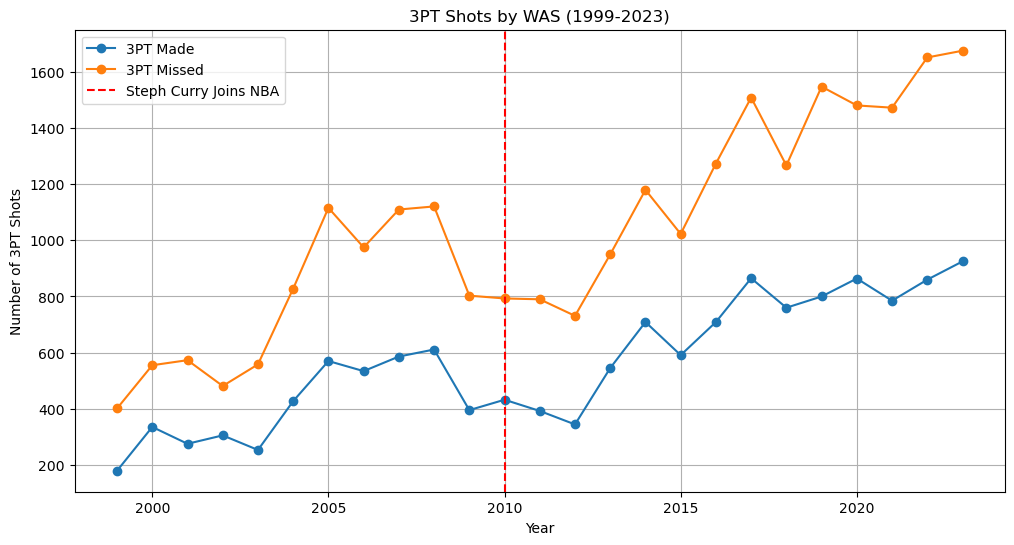

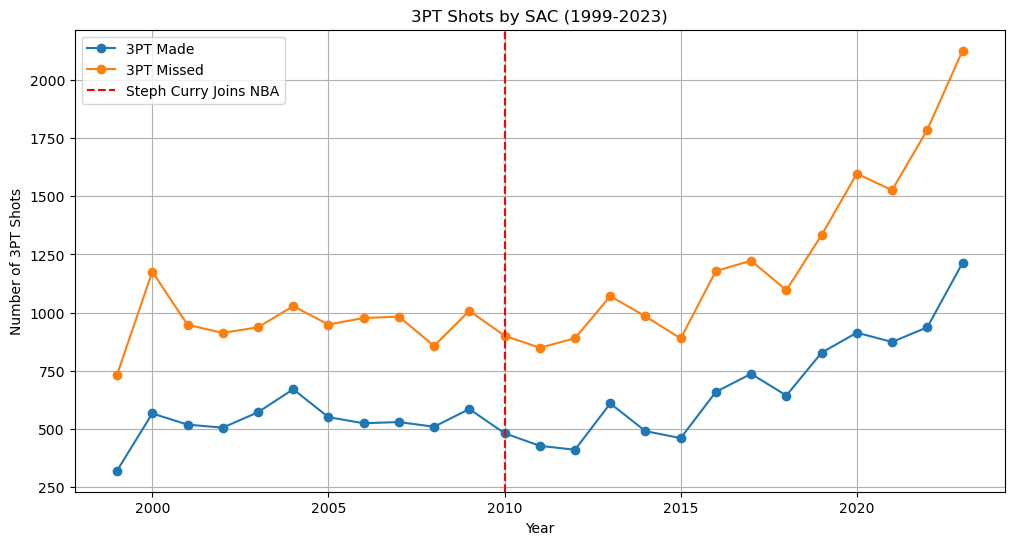

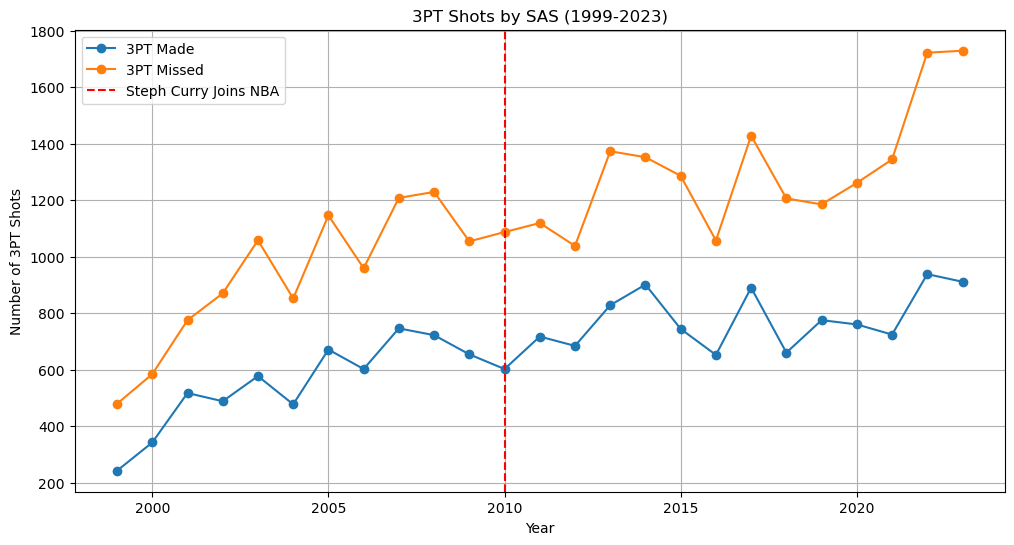

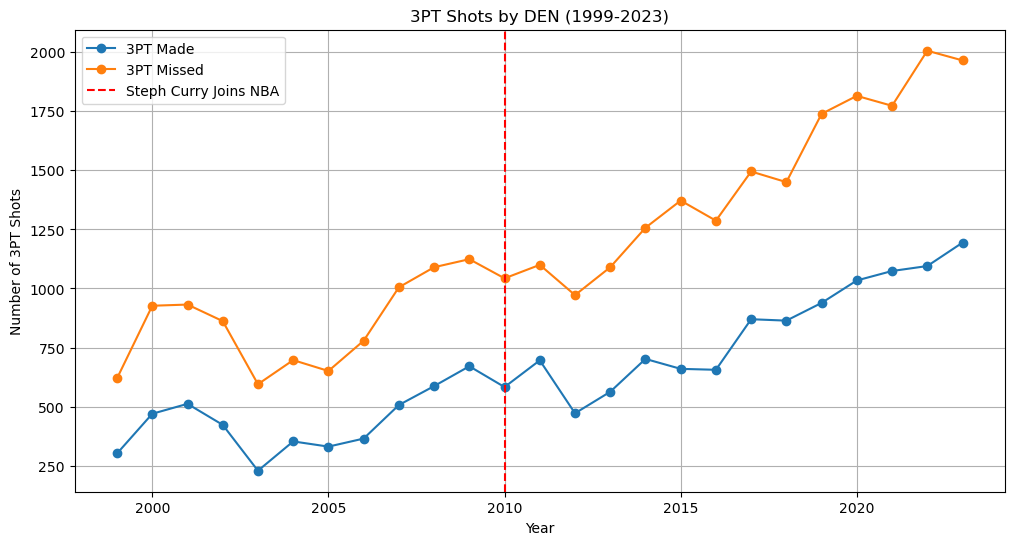

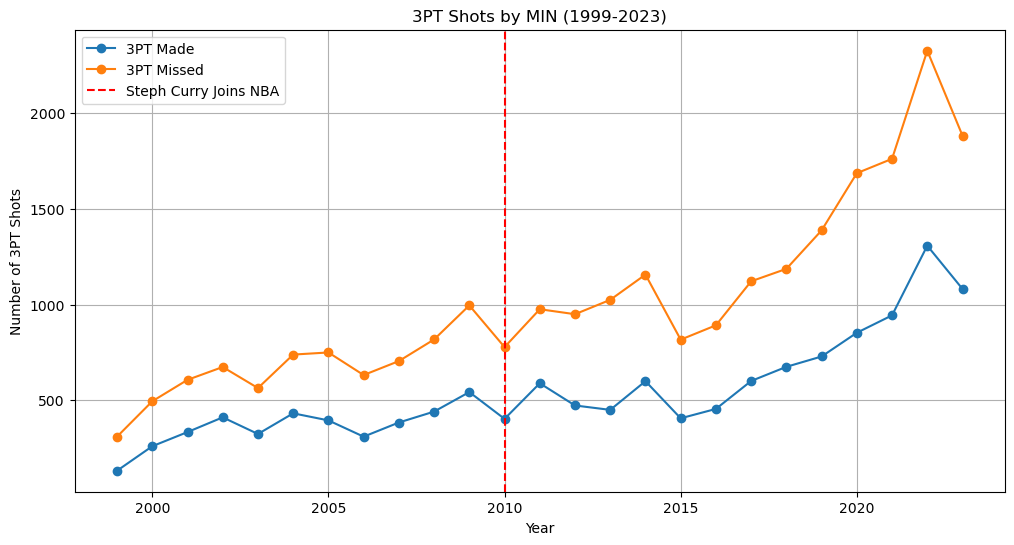

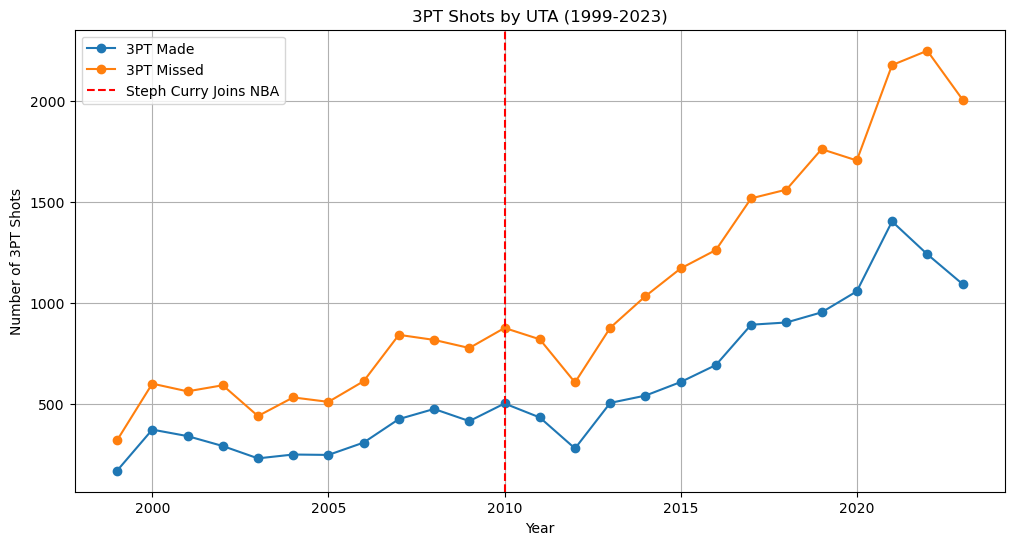

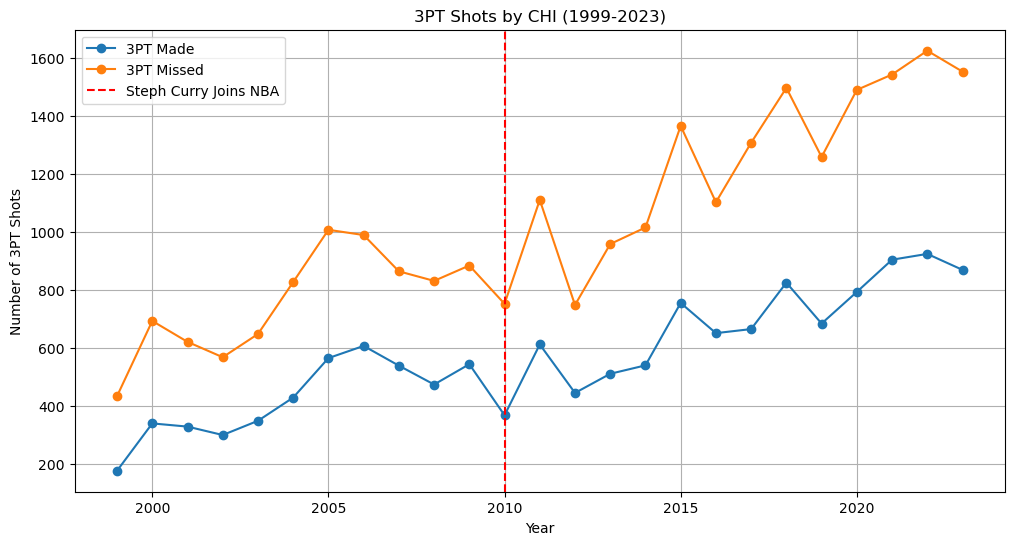

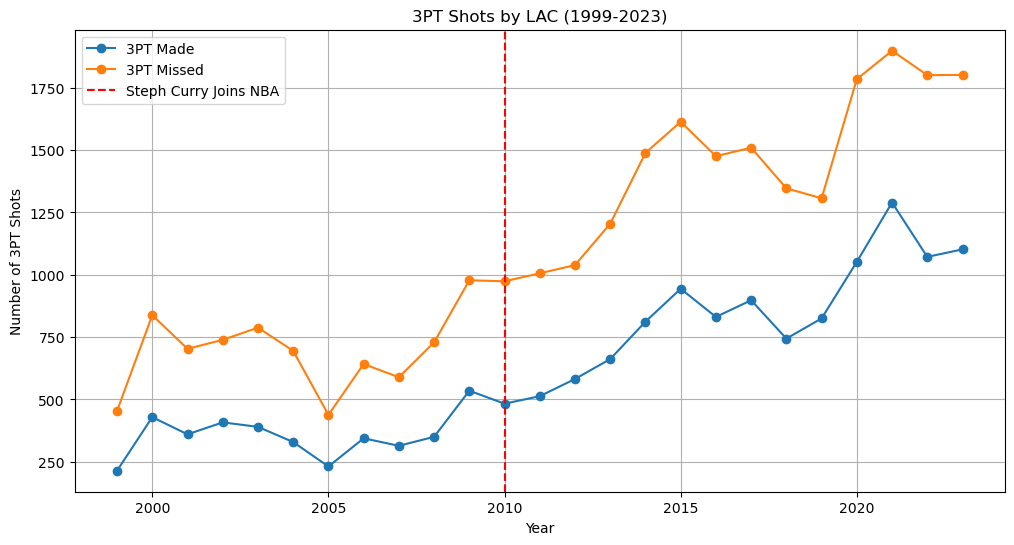

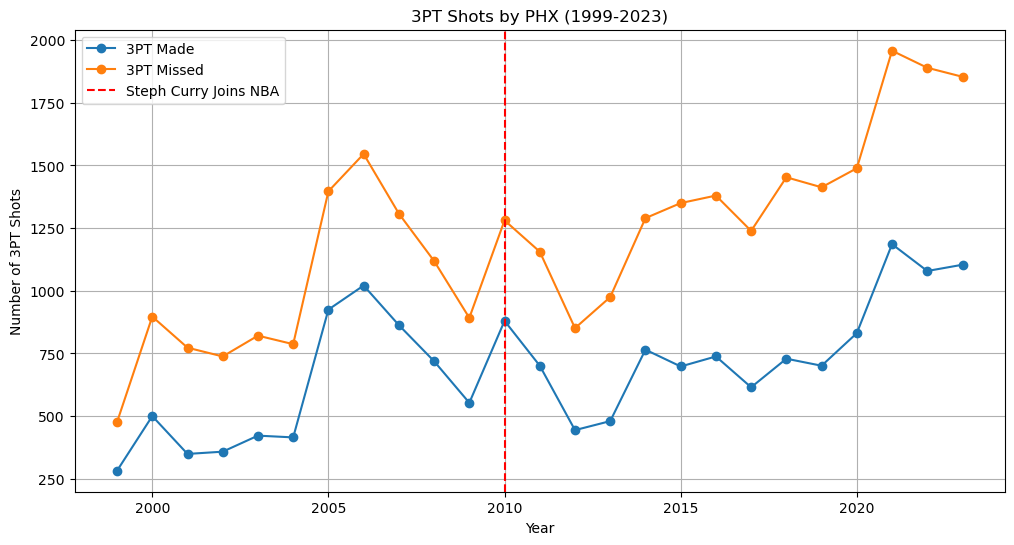

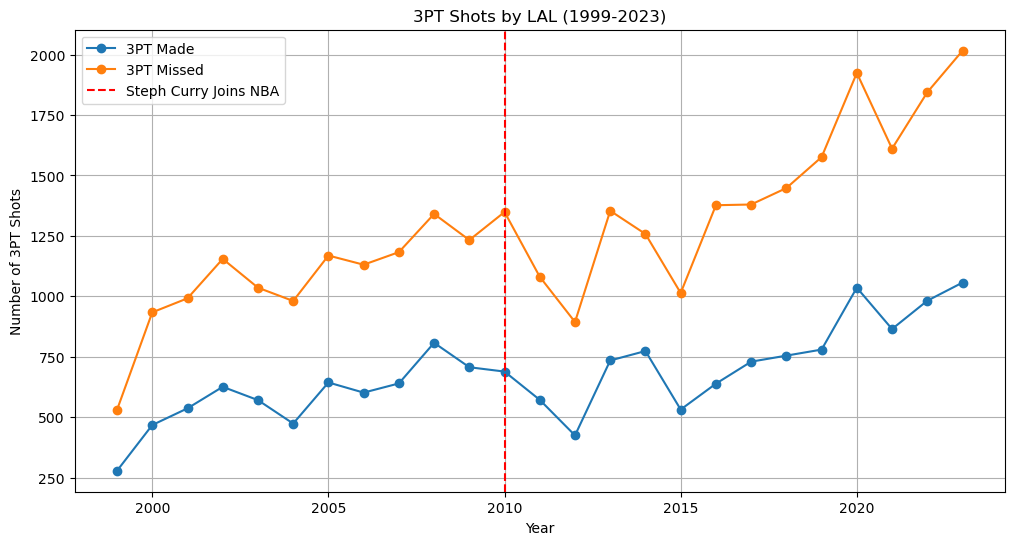

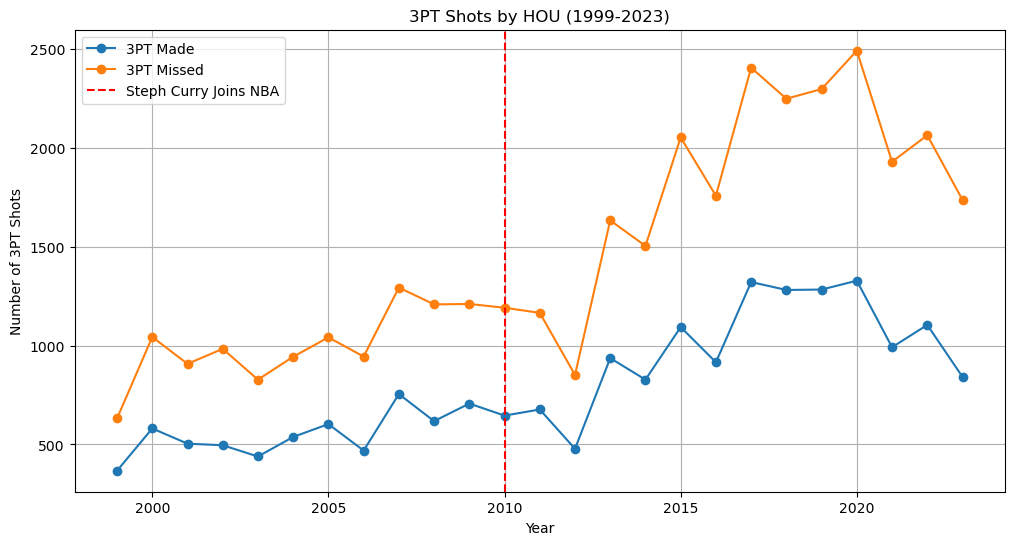

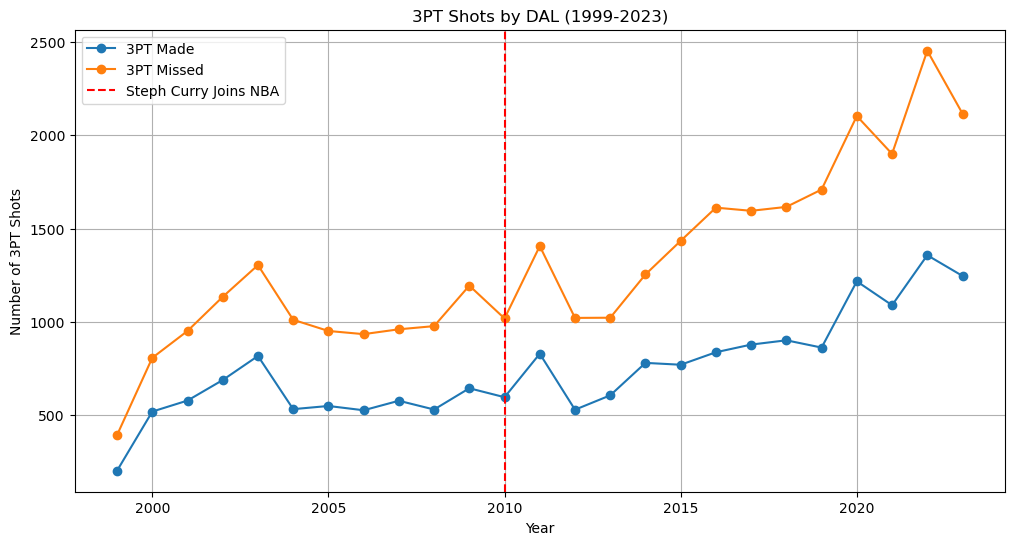

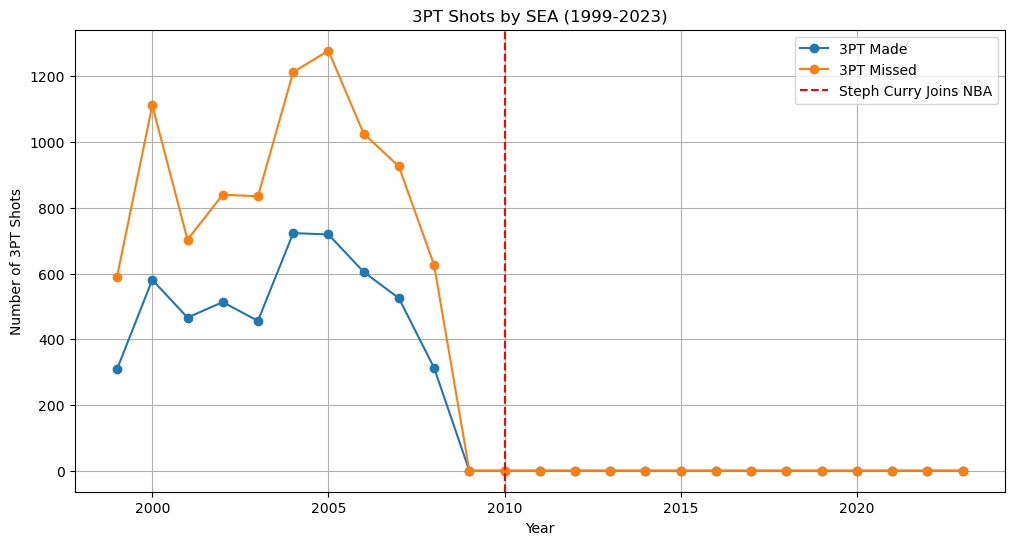

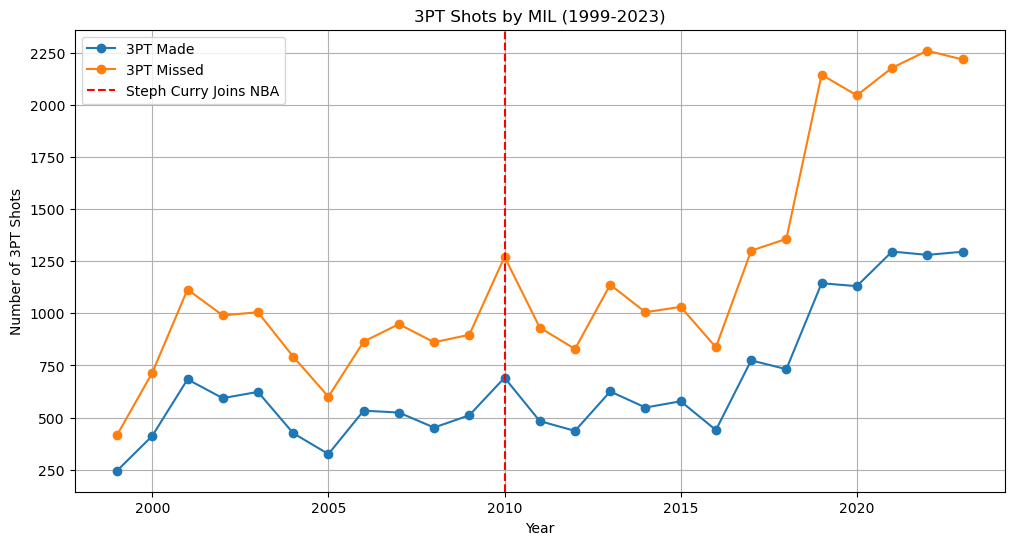

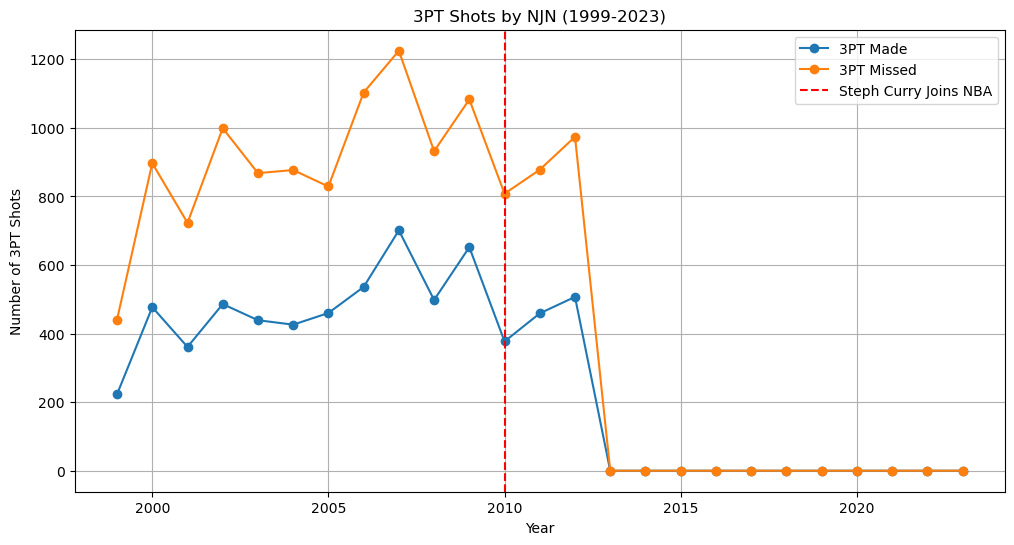

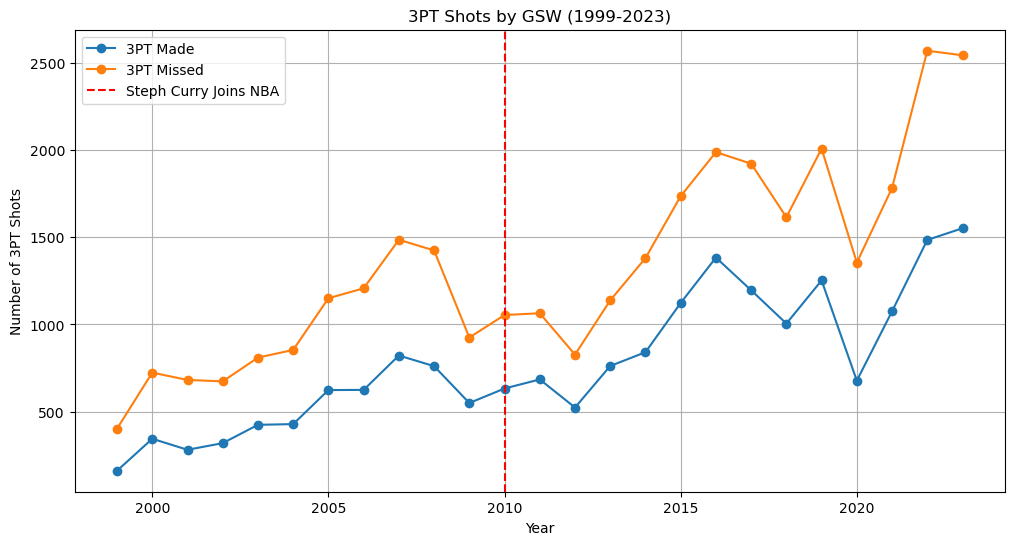

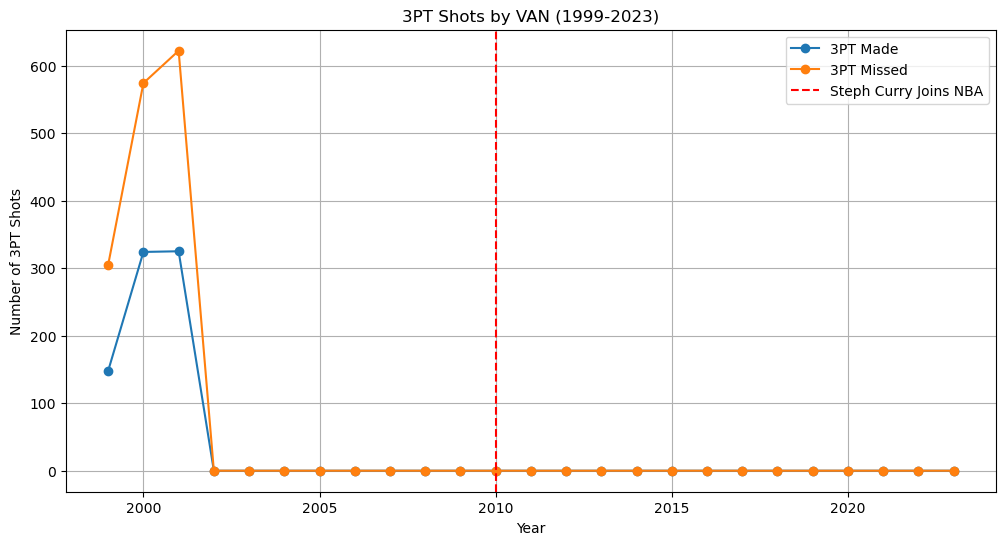

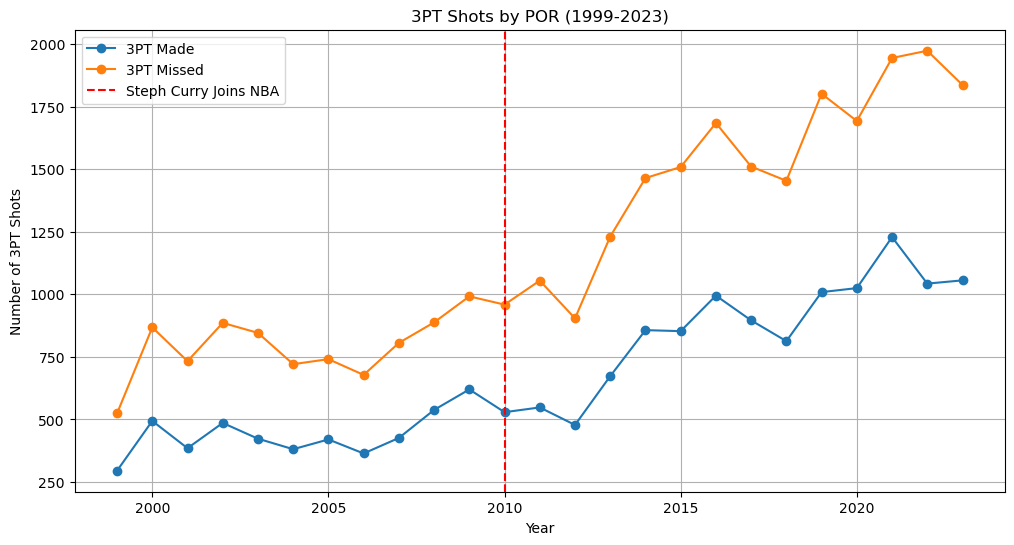

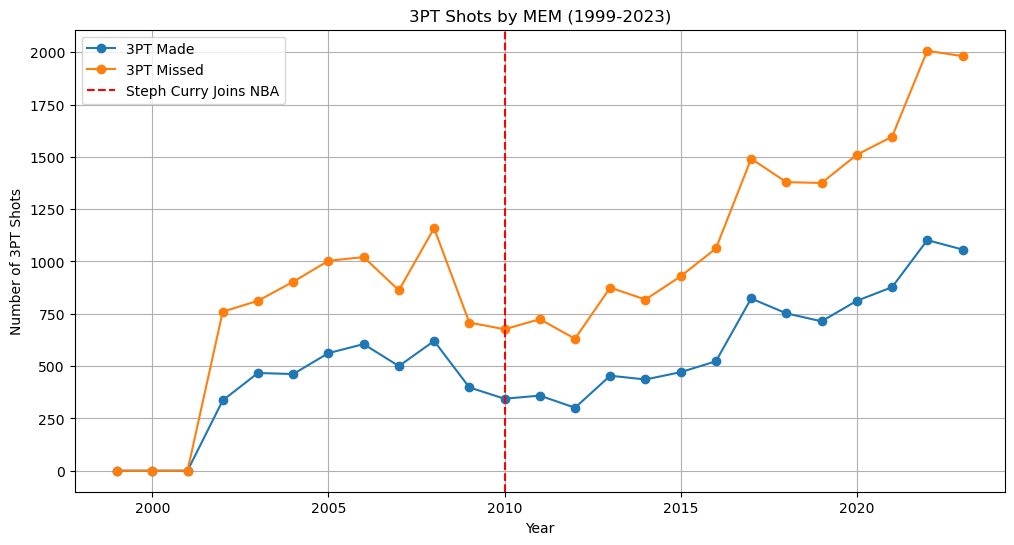

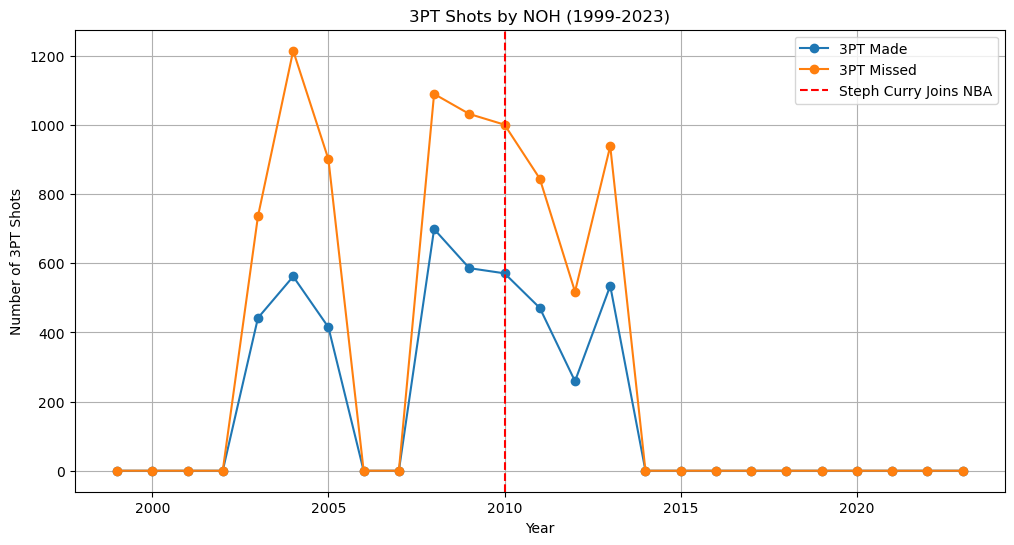

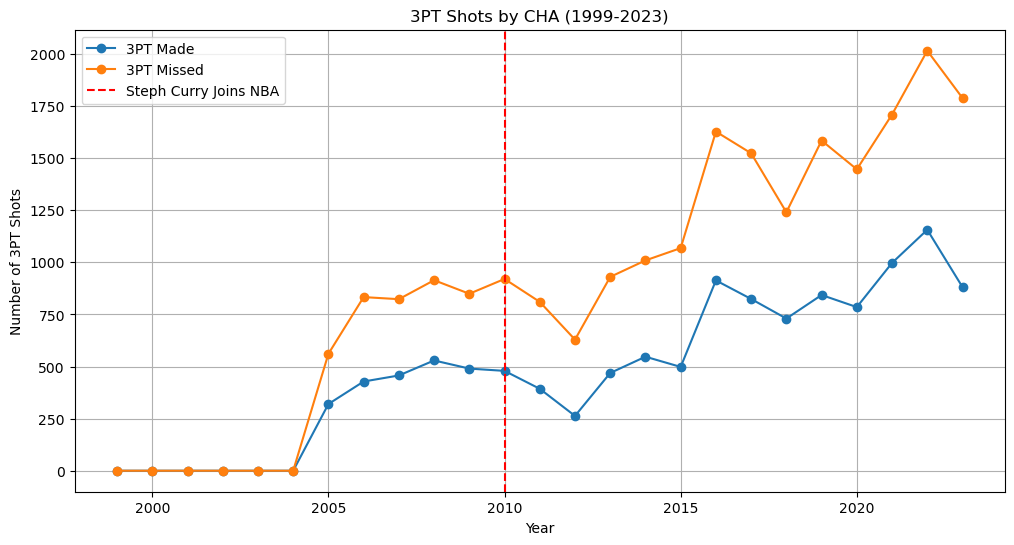

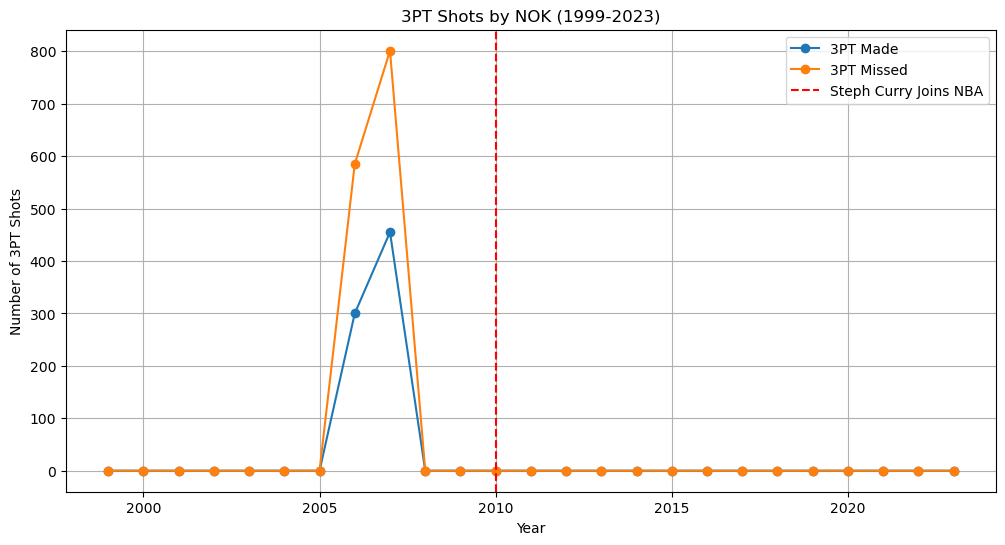

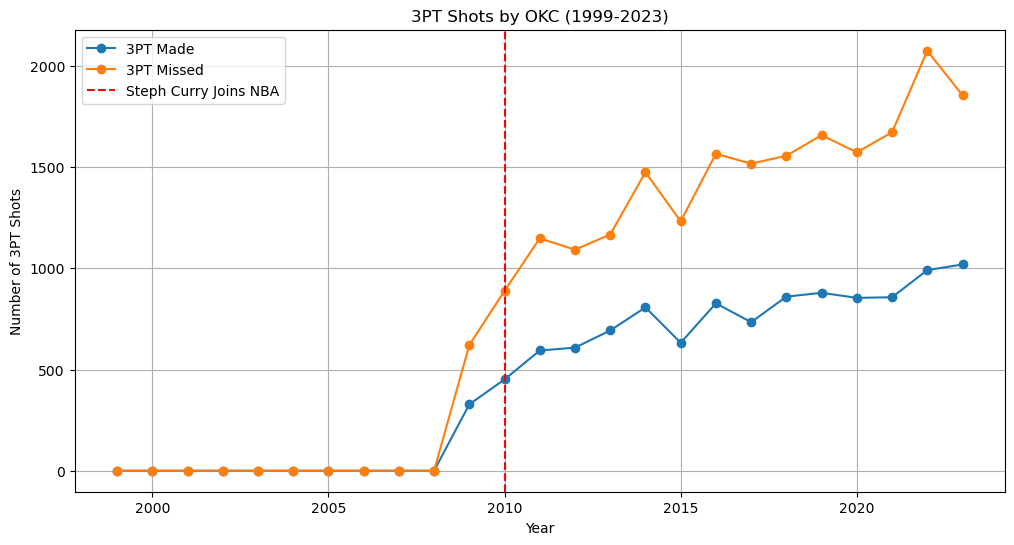

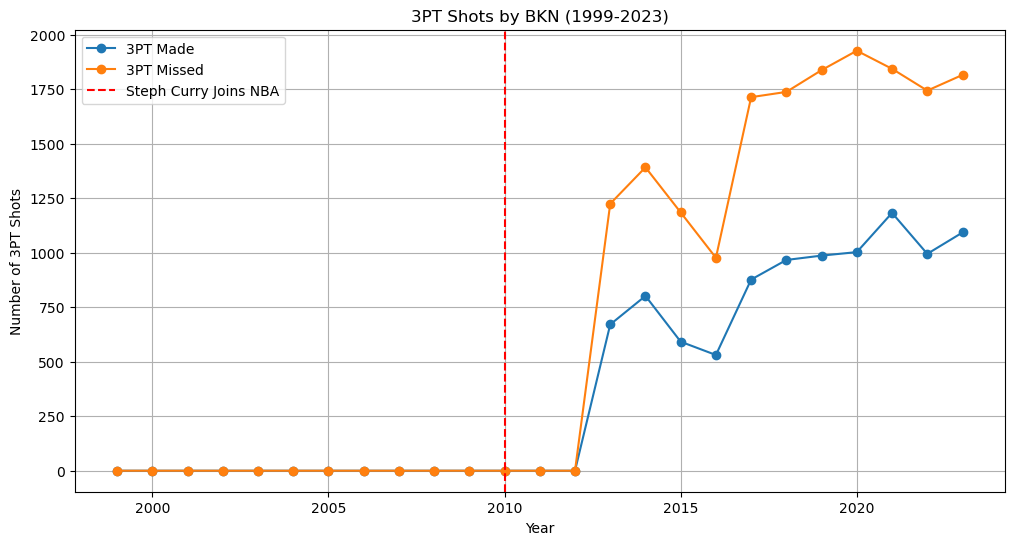

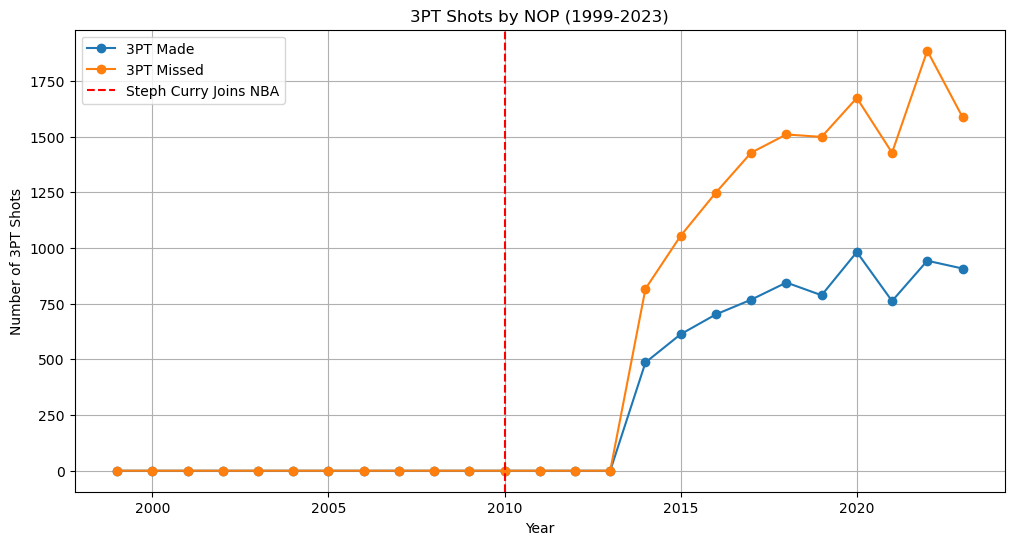

In [11]:
def year_to_index(year):
    return year - 1999

#extract data for each team and plot
for team, data in teams_shots.items():
    made_shots_team = [year_data[0] for year_data in data]
    missed_shots_team = [year_data[1] for year_data in data]
    years = list(range(1999, 2023 + 1))

# Plot made, missed shots for the team
    plt.figure(figsize=(12, 6))
    plt.plot(years, made_shots_team, marker='o', label='3PT Made')
    plt.plot(years, missed_shots_team, marker='o', label='3PT Missed')

    # add titles and labels
    plt.title(f"3PT Shots by {team} (1999-2023)")
    plt.xlabel("Year")
    # Add a vertical line at 2010
    plt.axvline(x=2010, color='r', linestyle='--', label='Steph Curry Joins NBA')
    plt.ylabel("Number of 3PT Shots")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


In [4]:
# Combine data for teams that changed names
team_combinations = {
    'NOP': ['NOH', 'NOK'],  # New Orleans Hornets/Pelicans
    'MEM': ['VAN'],  # Vancouver Grizzlies/Memphis Grizzlies
    'BKN': ['NJN'],  # New Jersey Nets/Brooklyn Nets
    'OKC': ['SEA'],   # Seattle SuperSonics/Oklahoma City Thunder
    'CHA': ['CHH']
}

# Update data for combined teams
for new_team, old_teams in team_combinations.items():
    for old_team in old_teams:
        if old_team in teams_shots:
            for i in range(25):  
                teams_shots[new_team][i][0] += teams_shots[old_team][i][0]  
                teams_shots[new_team][i][1] += teams_shots[old_team][i][1]  
            del teams_shots[old_team]

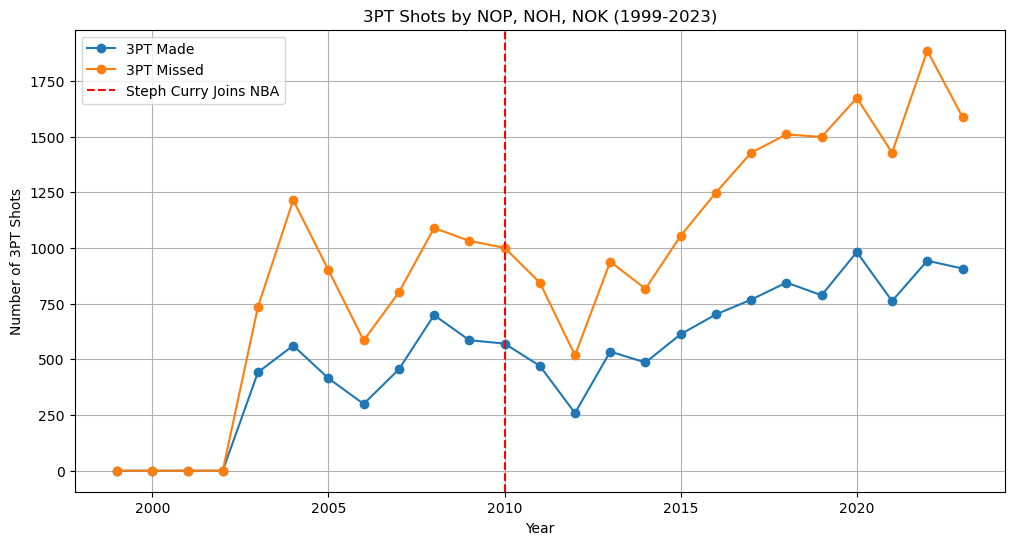

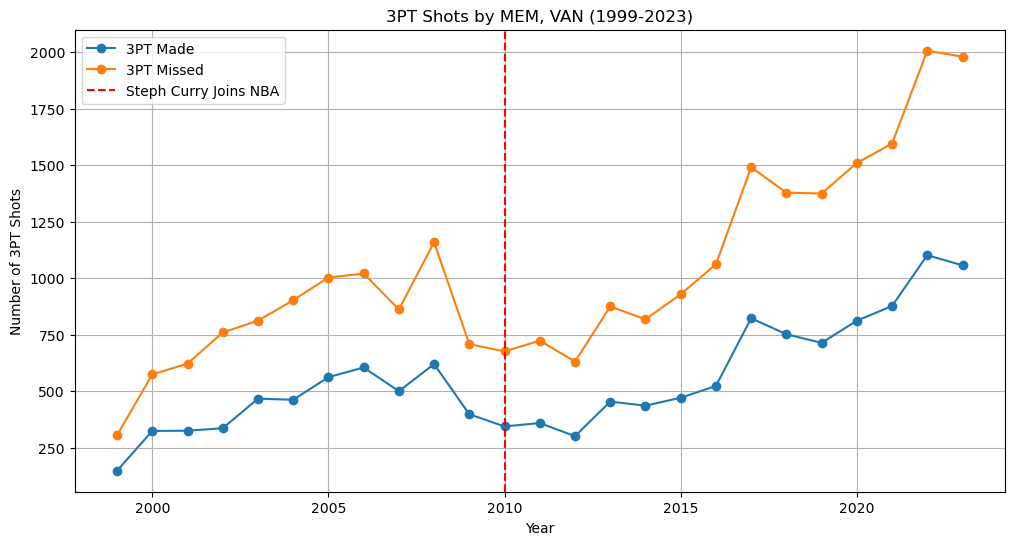

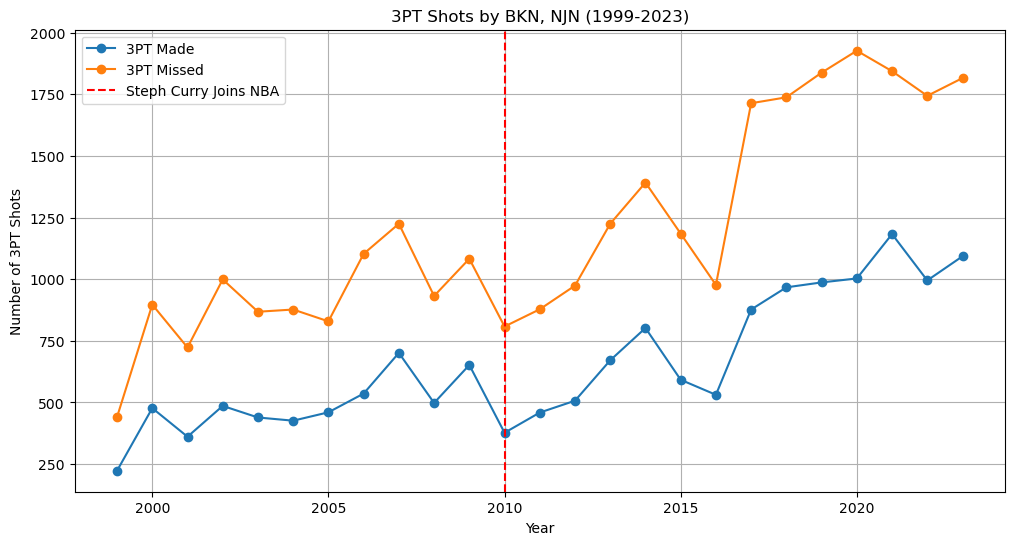

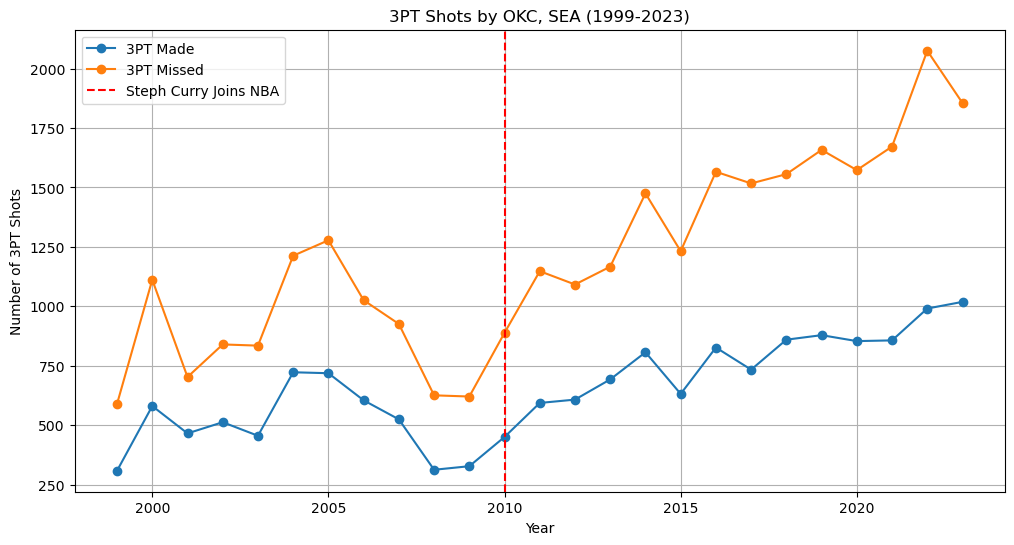

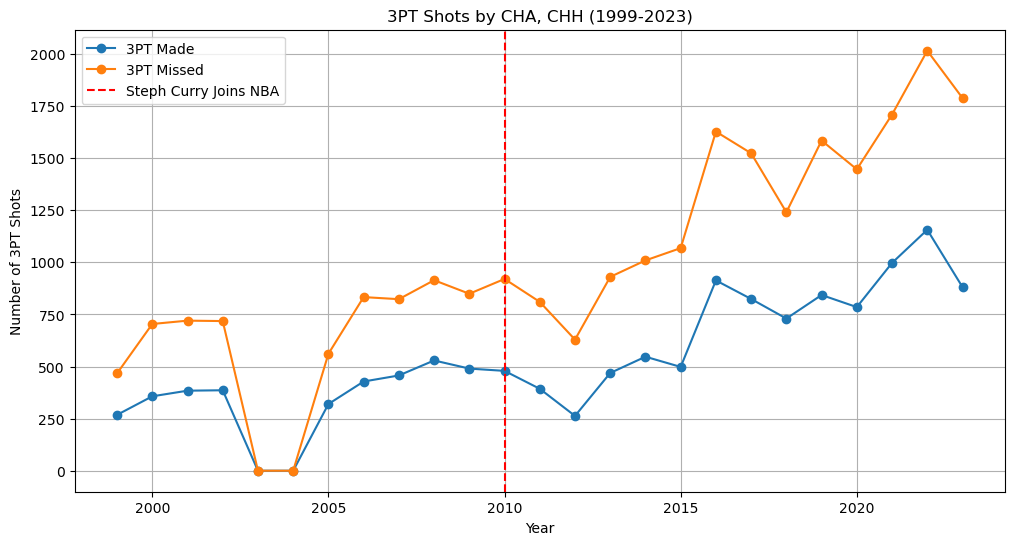

In [22]:
years = list(range(1999, 2023 + 1))

# plot team data
def plot_team_data(team, label):
    team_data = teams_shots[team]
    made_shots = [year_data[0] for year_data in team_data]
    missed_shots = [year_data[1] for year_data in team_data]
    
    # Plot made + missed shots for the team
    plt.figure(figsize=(12, 6))
    plt.plot(years, made_shots, marker='o', label='3PT Made')
    plt.plot(years, missed_shots, marker='o', label='3PT Missed')

    plt.title(f"3PT Shots by {label} (1999-2023)")
    plt.xlabel("Year")
    plt.axvline(x=2010, color='r', linestyle='--', label='Steph Curry Joins NBA')
    plt.ylabel("Number of 3PT Shots")
    plt.legend()
    plt.grid(True)

    plt.show()

# Plot data for combined teams
plot_team_data('NOP', 'NOP, NOH, NOK')
plot_team_data('MEM', 'MEM, VAN')
plot_team_data('BKN', 'BKN, NJN')
plot_team_data('OKC', 'OKC, SEA')
plot_team_data('CHA', 'CHA, CHH')

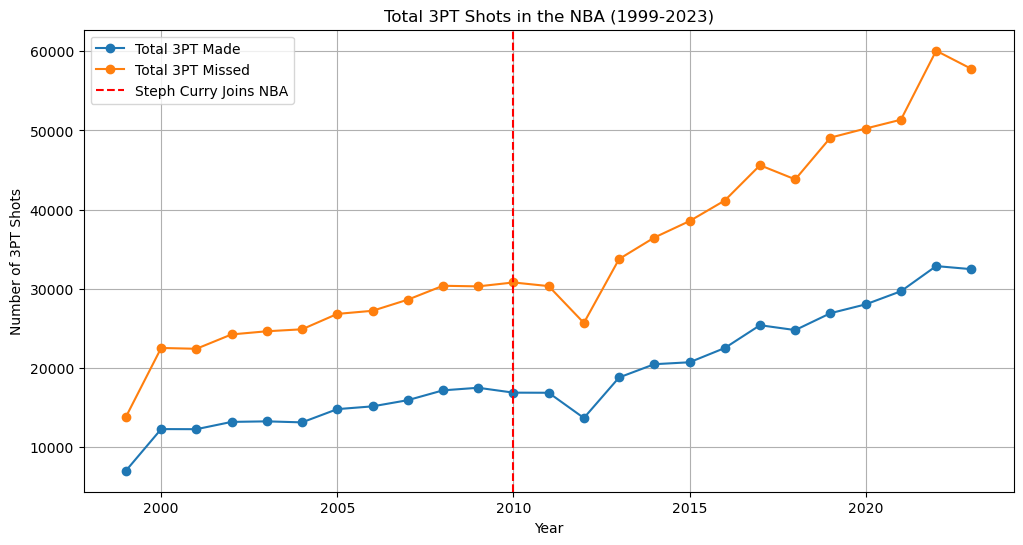

In [7]:
total_made_shots = [0] * 25
total_missed_shots = [0] * 25

for team, data in teams_shots.items():
    for year_index in range(25):
        total_made_shots[year_index] += data[year_index][0]
        total_missed_shots[year_index] += data[year_index][1]

years = list(range(1999, 2023 + 1))

plt.figure(figsize=(12, 6))
plt.plot(years, total_made_shots, marker='o', label='Total 3PT Made')
plt.plot(years, total_missed_shots, marker='o', label='Total 3PT Missed')

plt.title("Total 3PT Shots in the NBA (1999-2023)")
plt.xlabel("Year")
plt.ylabel("Number of 3PT Shots")
plt.axvline(x=2010, color='r', linestyle='--', label='Steph Curry Joins NBA')
plt.legend()
plt.grid(True)

plt.show()

In [12]:
print(total_made_shots[0])
print(total_made_shots[11])
print(total_made_shots[24])

7031
16888
32480


In [13]:
# Calculate avg 3PT shots made and missed per team
avg_made_shots = [total / 30 for total in total_made_shots]
avg_missed_shots = [total / 30 for total in total_missed_shots]

# Calculate 3PT percentage for the league average
avg_3pt_percentage = [(made / (made + missed)) * 100 if (made + missed) != 0 else 0 for made, missed in zip(avg_made_shots, avg_missed_shots)]

# Extract the data for GSW
gsw_data = teams_shots['GSW']
gsw_made_shots = [year_data[0] for year_data in gsw_data]
gsw_missed_shots = [year_data[1] for year_data in gsw_data]

# Calculate 3PT shooting percentage for GSW
gsw_3pt_percentage = [(made / (made + missed)) * 100 if (made + missed) != 0 else 0 for made, missed in zip(gsw_made_shots, gsw_missed_shots)]


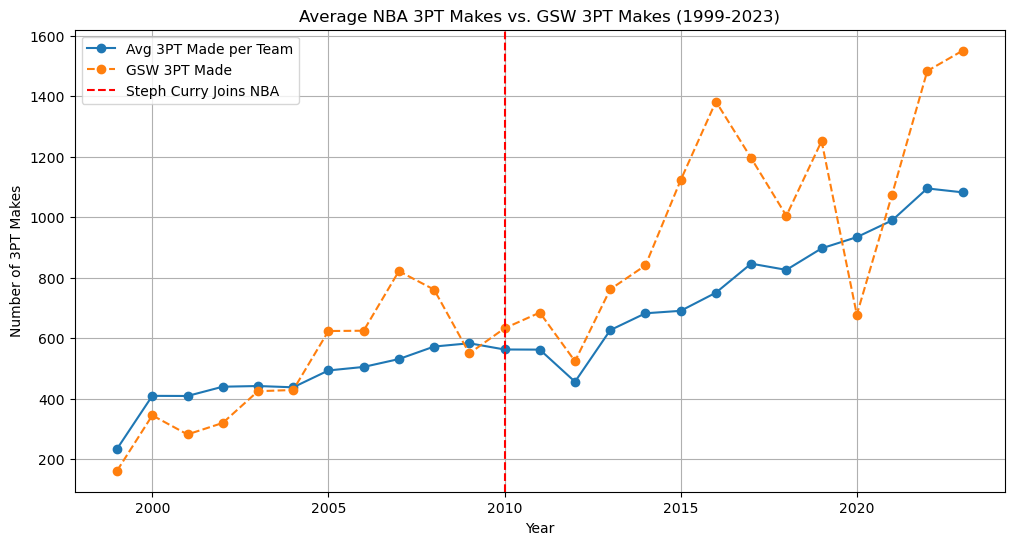

In [14]:
# Plot GSW and average made 3PT shots
plt.figure(figsize=(12, 6))
plt.plot(years, avg_made_shots, marker='o', label='Avg 3PT Made per Team')
plt.plot(years, gsw_made_shots, marker='o', linestyle='--', label='GSW 3PT Made')

plt.title("Average NBA 3PT Makes vs. GSW 3PT Makes (1999-2023)")
plt.xlabel("Year")
plt.axvline(x=2010, color='r', linestyle='--', label='Steph Curry Joins NBA')
plt.ylabel("Number of 3PT Makes")
plt.legend()
plt.grid(True)

plt.show()


In [20]:
print(avg_made_shots[17])
print(gsw_made_shots[17])

750.8
1383


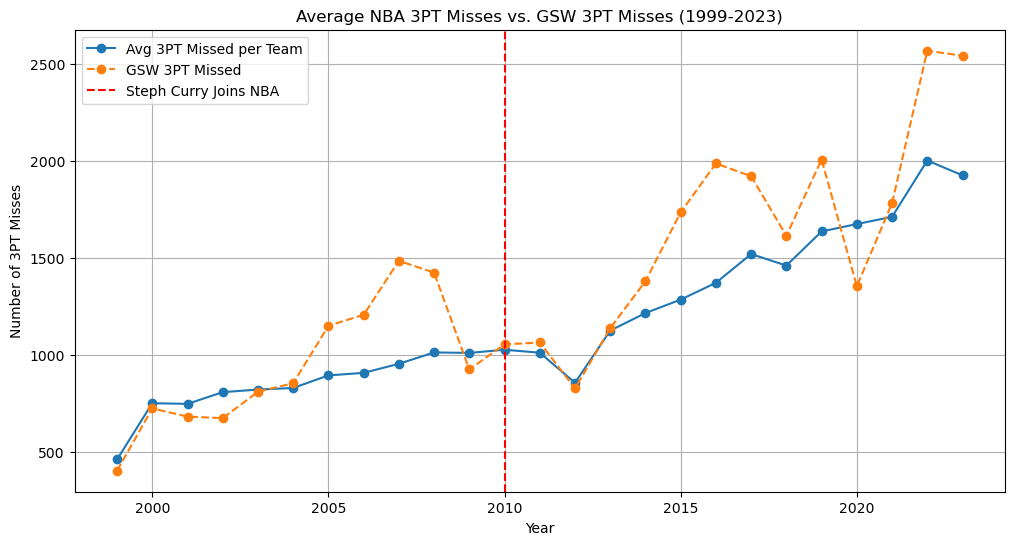

In [15]:
# Plot GSW average missed 3PT shots
plt.figure(figsize=(12, 6))
plt.plot(years, avg_missed_shots, marker='o', label='Avg 3PT Missed per Team')
plt.plot(years, gsw_missed_shots, marker='o', linestyle='--', label='GSW 3PT Missed')

plt.title("Average NBA 3PT Misses vs. GSW 3PT Misses (1999-2023)")
plt.xlabel("Year")
plt.ylabel("Number of 3PT Misses")
plt.axvline(x=2010, color='r', linestyle='--', label='Steph Curry Joins NBA')
plt.legend()
plt.grid(True)

plt.show()


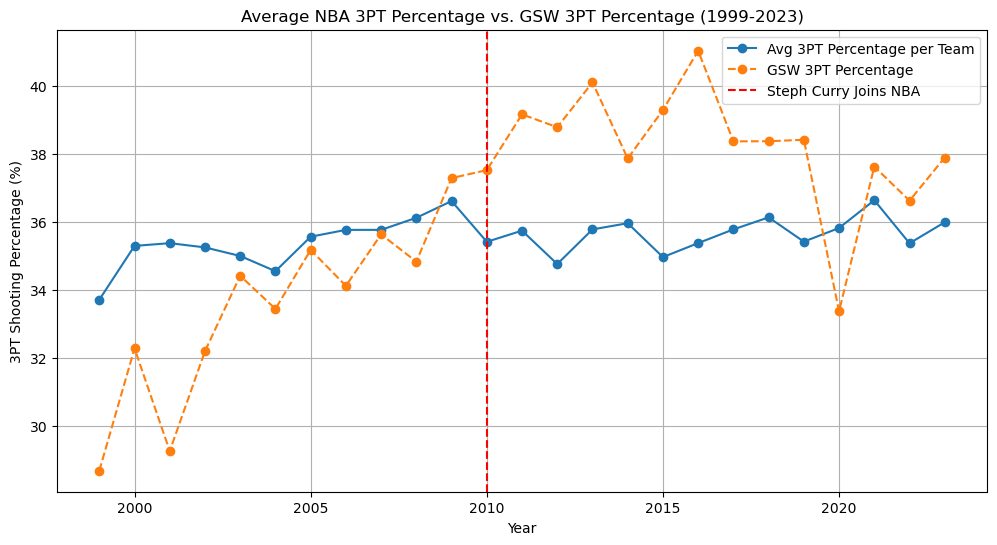

In [16]:
# Plot GSW 3PT shooting percentages vs avg
plt.figure(figsize=(12, 6))
plt.plot(years, avg_3pt_percentage, marker='o', label='Avg 3PT Percentage per Team')
plt.plot(years, gsw_3pt_percentage, marker='o', linestyle='--', label='GSW 3PT Percentage')

plt.title("Average NBA 3PT Percentage vs. GSW 3PT Percentage (1999-2023)")
plt.xlabel("Year")
plt.ylabel("3PT Shooting Percentage (%)")
plt.axvline(x=2010, color='r', linestyle='--', label='Steph Curry Joins NBA')
plt.legend()
plt.grid(True)

plt.show()

In [19]:
print(avg_3pt_percentage[17])
print(gsw_3pt_percentage[17])

35.37449154272611
41.038575667655785


In [6]:
# Initialize hashmaps for tracking 3PT makes and misses by player per season
player_makes_per_season = [defaultdict(int) for _ in range(25)]
player_misses_per_season = [defaultdict(int) for _ in range(25)]

def year_to_index(year):
    return year - 1999

# Iterate through the pre-loaded dataframes and process data
for file, df in dataframes.items():
    year = int(file.split('pbp')[1].split('.')[0])
    if 1999 <= year <= 2023:
        year_index = year_to_index(year)
        for _, row in df.iterrows():
            if '3PT' in str(row['desc']):
                if row['type'] == 'Made Shot':
                    player_makes_per_season[year_index][row['playerid']] += 1
                elif row['type'] == 'Missed Shot':
                    player_misses_per_season[year_index][row['playerid']] += 1


In [7]:
#look at currys
player = 201939
for year_index in range(25):
    year = 1999 + year_index
    made_shots = player_makes_per_season[year_index][player]
    missed_shots = player_misses_per_season[year_index][player]
    print(f"Year {year}: {player} made {made_shots} 3PT shots and missed {missed_shots} 3PT shots")

Year 1999: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2000: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2001: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2002: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2003: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2004: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2005: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2006: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2007: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2008: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2009: 201939 made 0 3PT shots and missed 0 3PT shots
Year 2010: 201939 made 166 3PT shots and missed 214 3PT shots
Year 2011: 201939 made 151 3PT shots and missed 191 3PT shots
Year 2012: 201939 made 55 3PT shots and missed 66 3PT shots
Year 2013: 201939 made 314 3PT shots and missed 392 3PT shots
Year 2014: 201939 made 283 3PT shots and missed 389 3PT shots
Year 2015: 201939 made 384 3PT shots and missed 494 3P

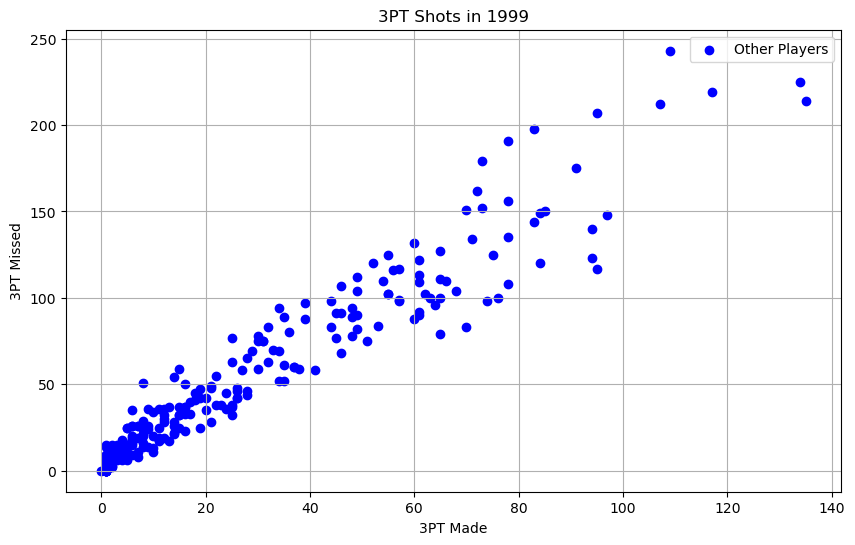

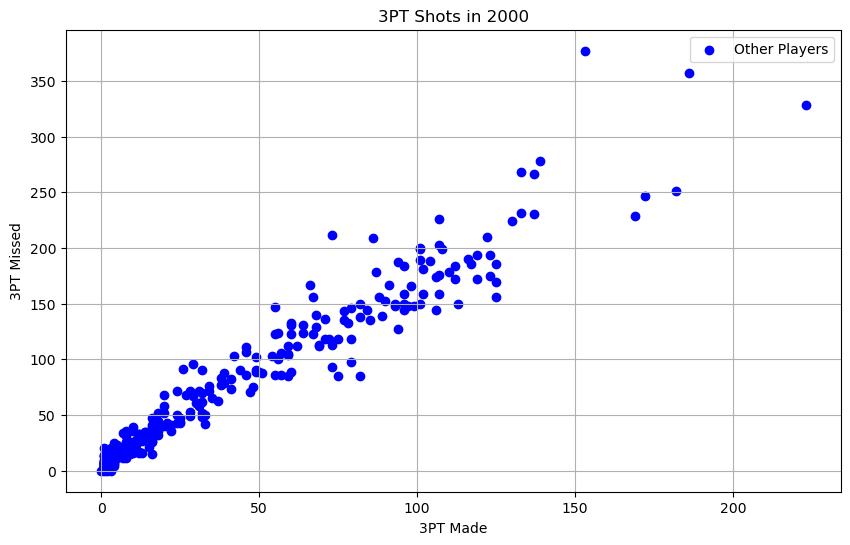

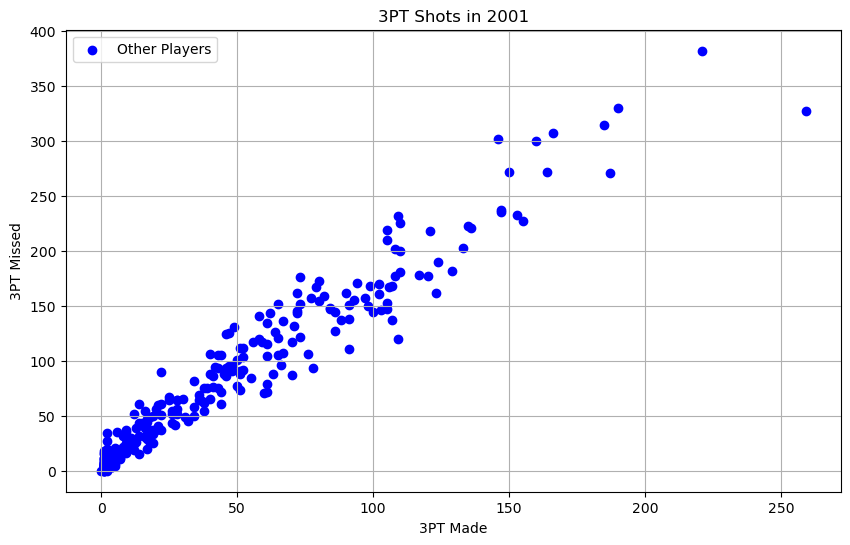

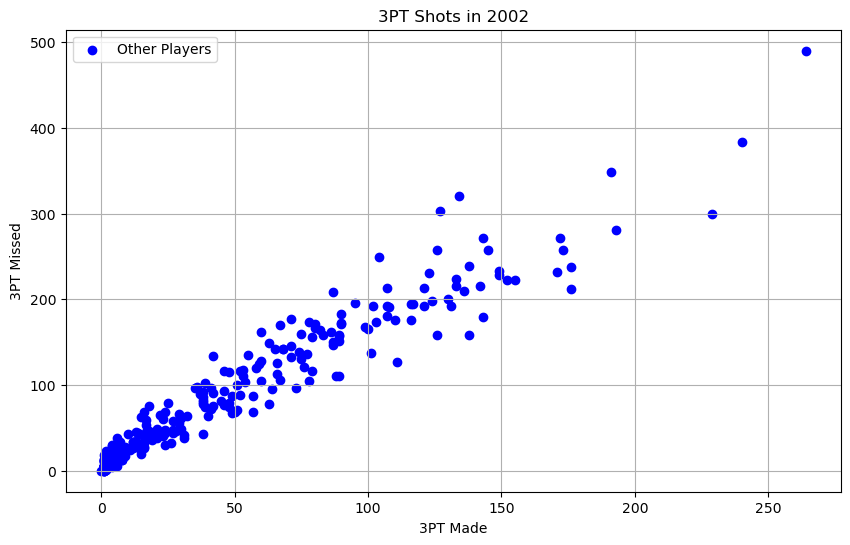

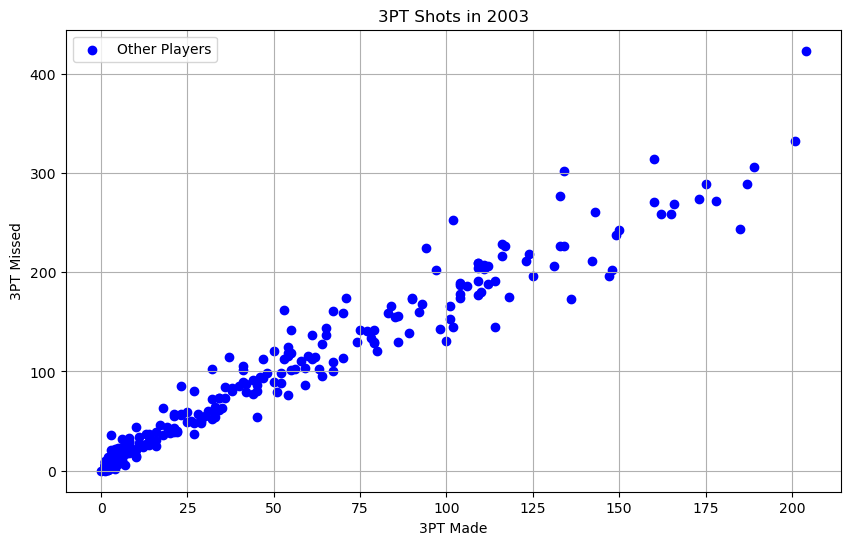

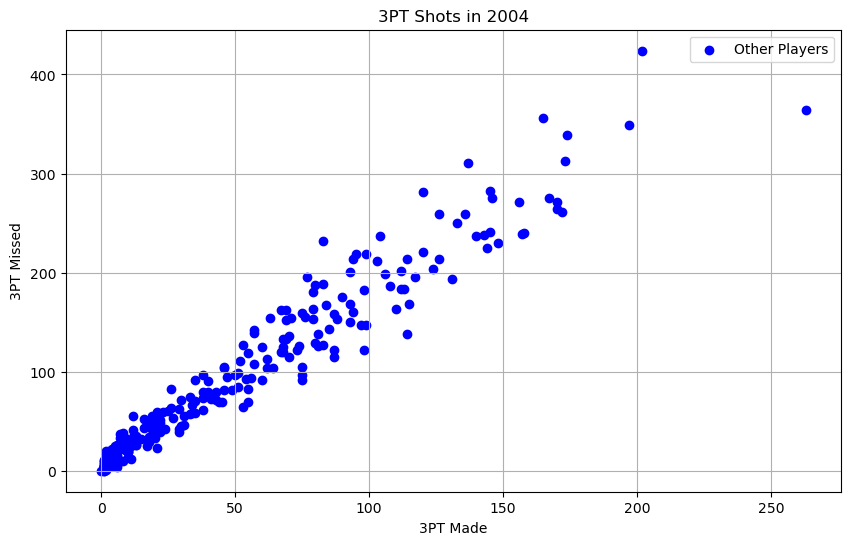

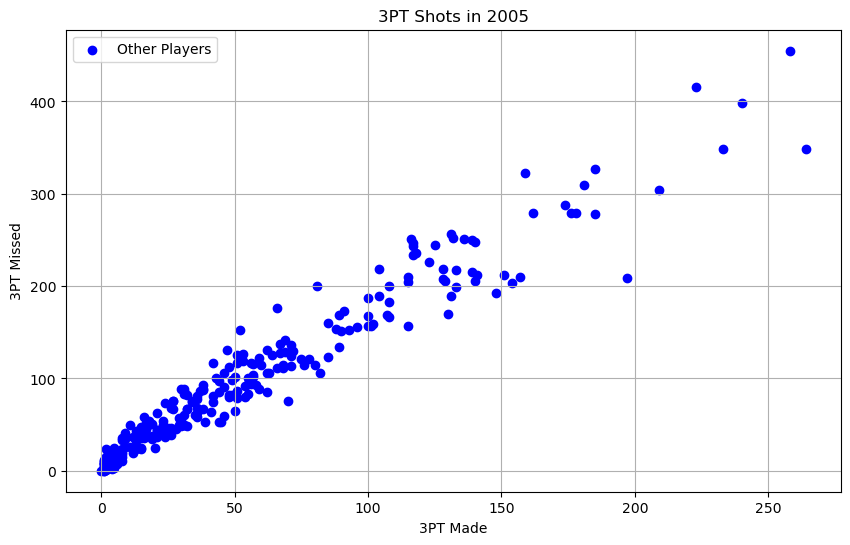

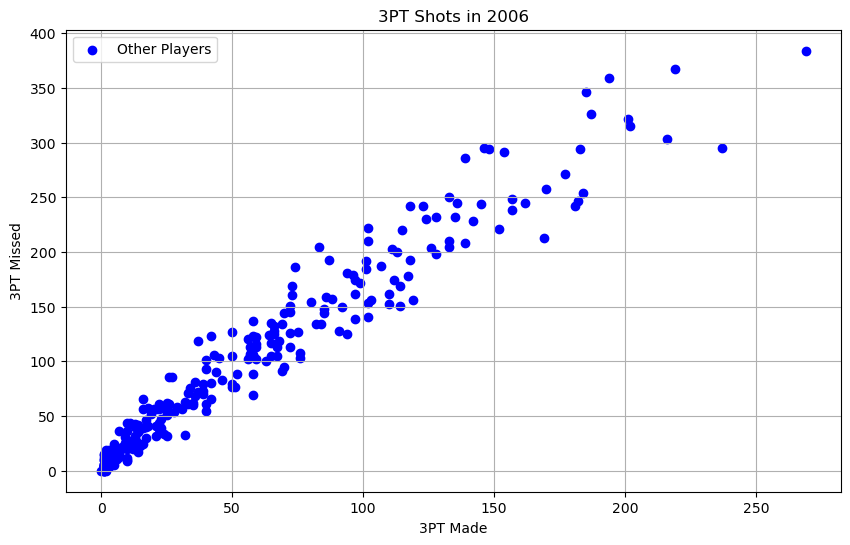

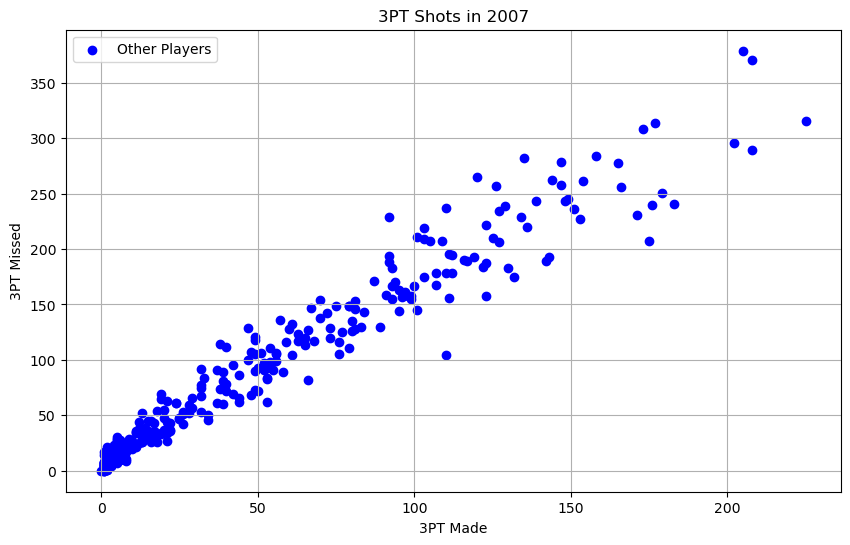

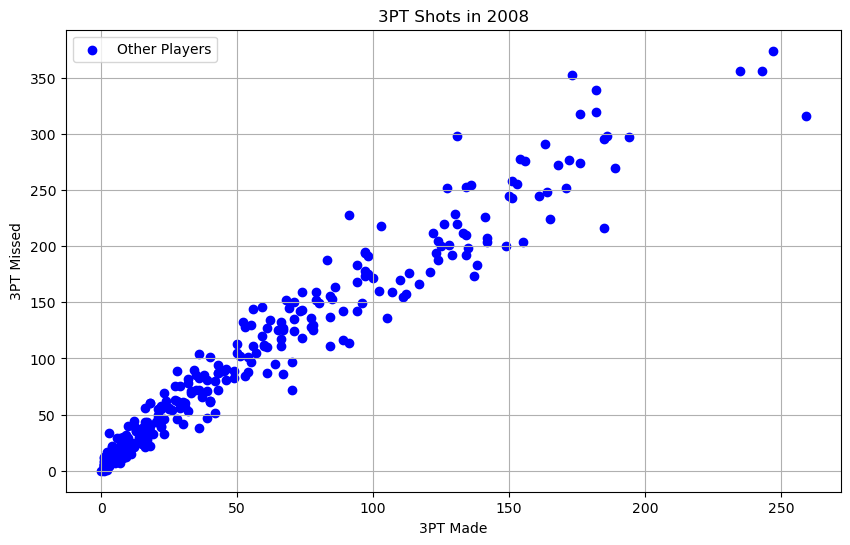

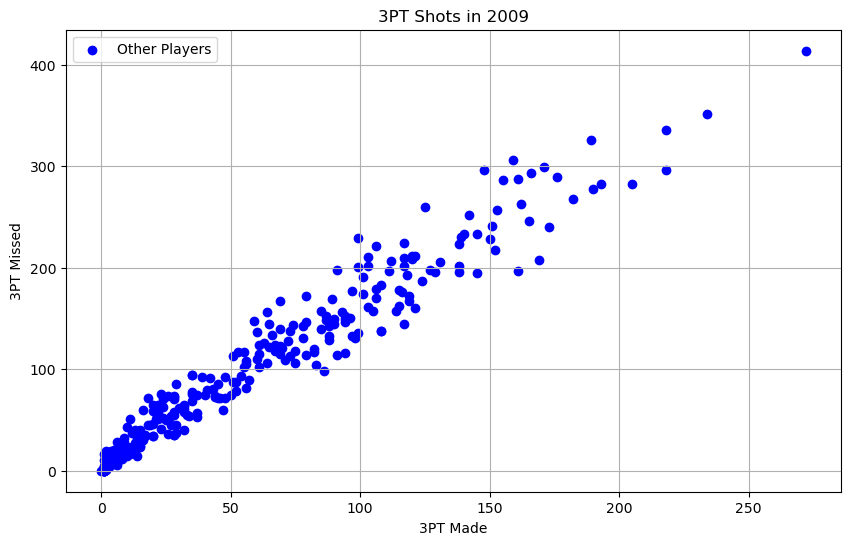

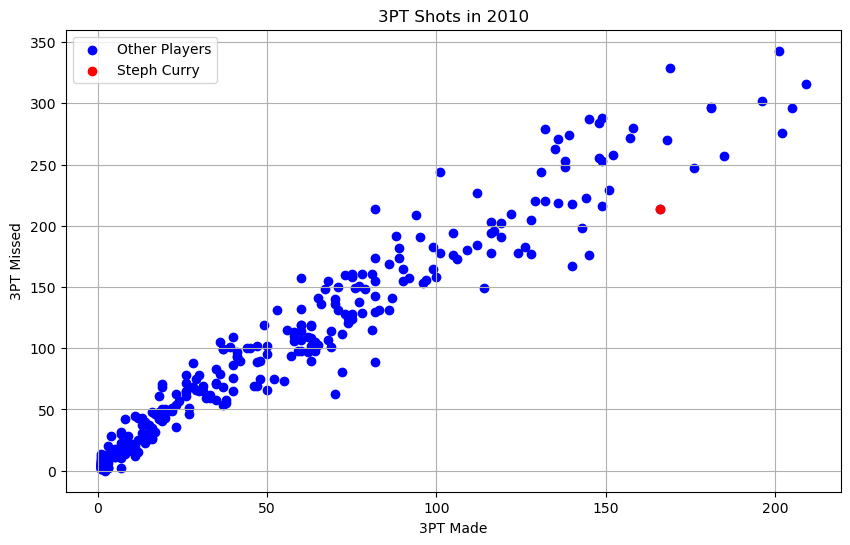

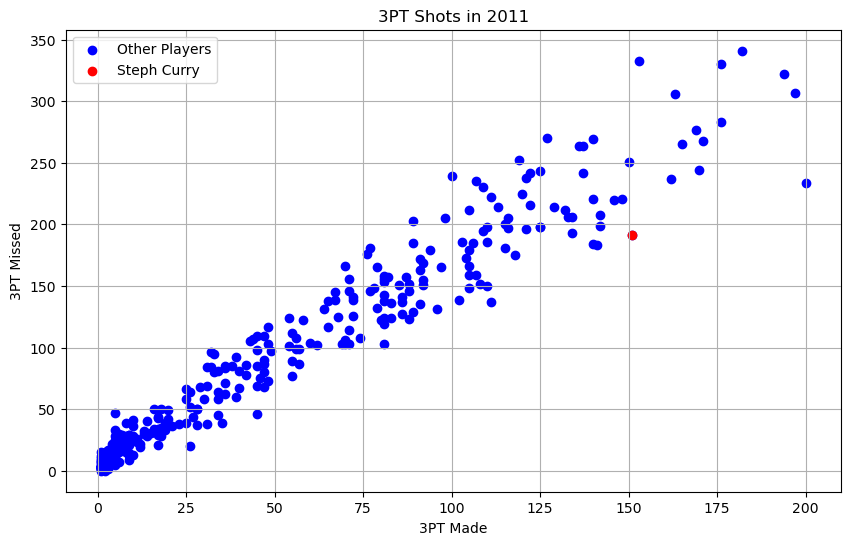

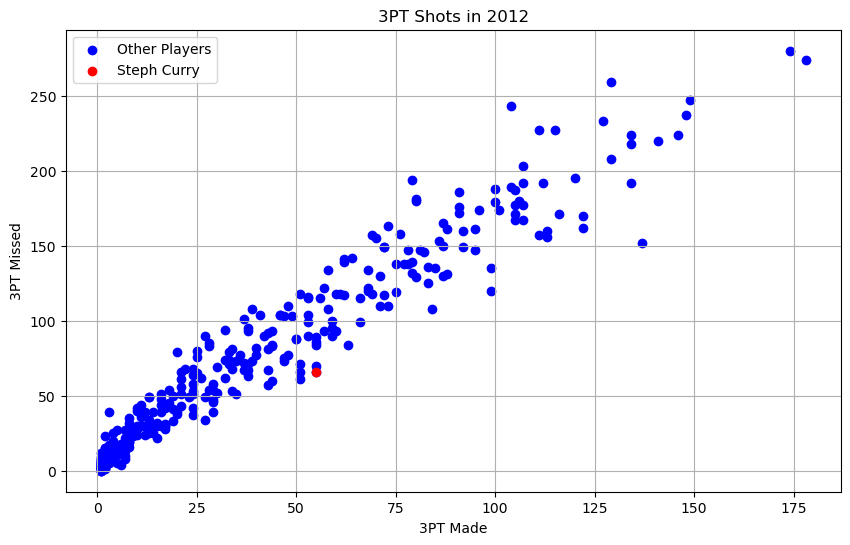

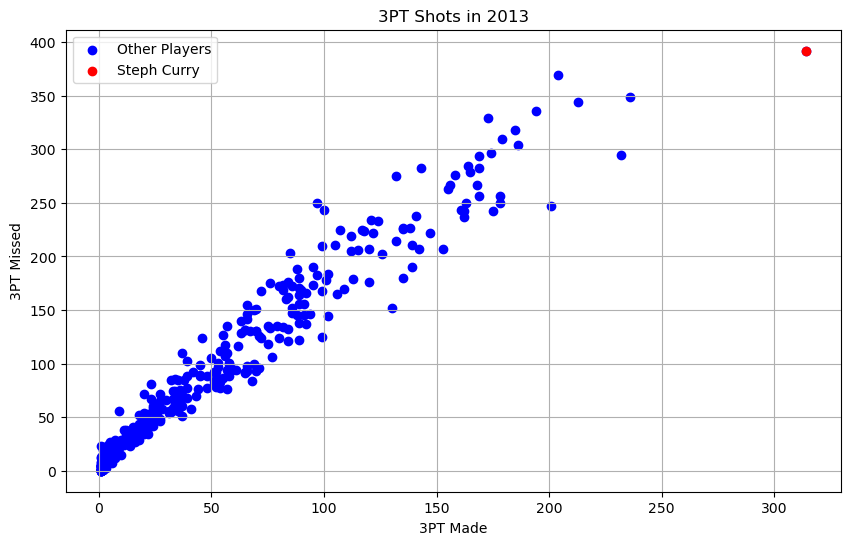

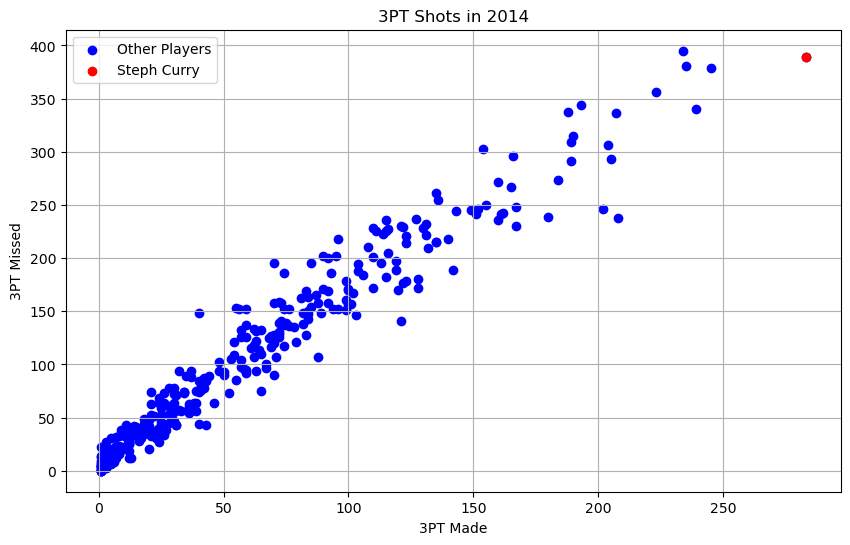

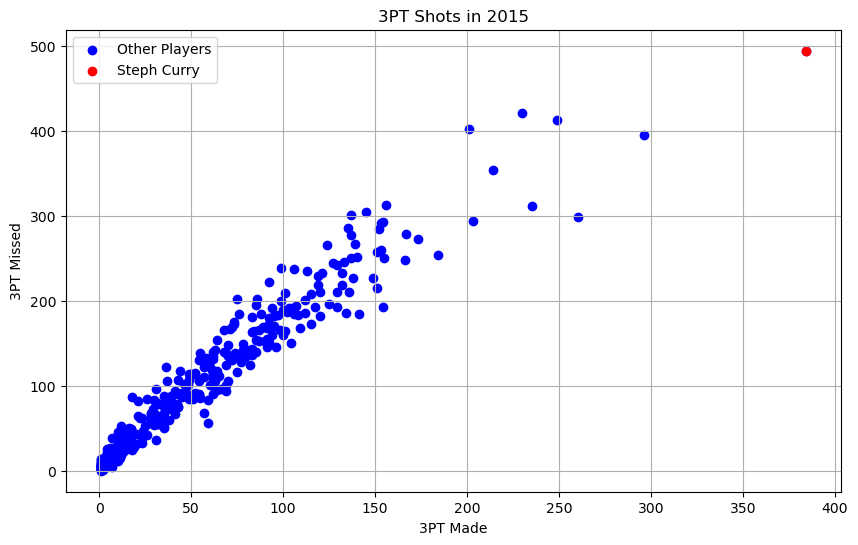

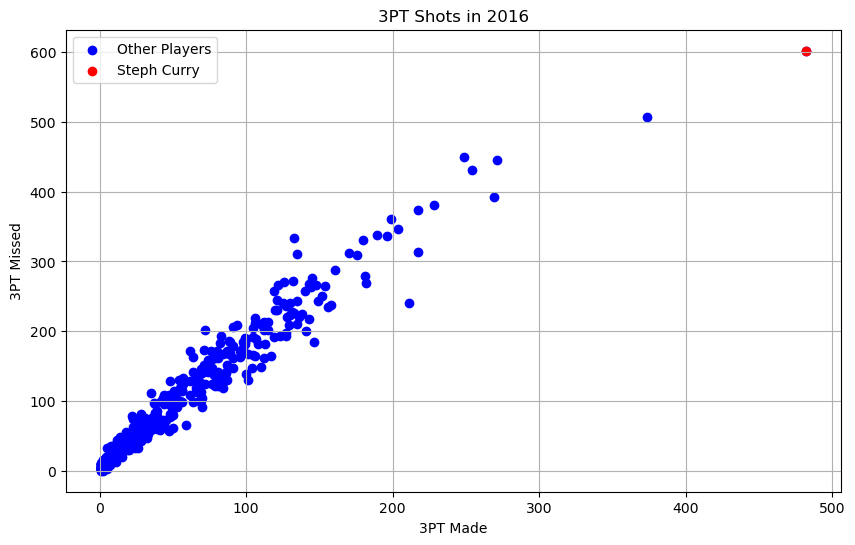

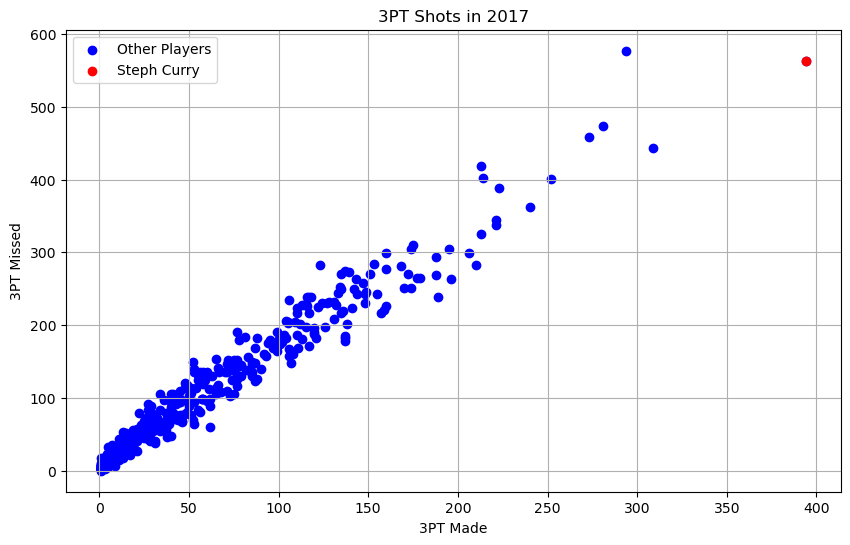

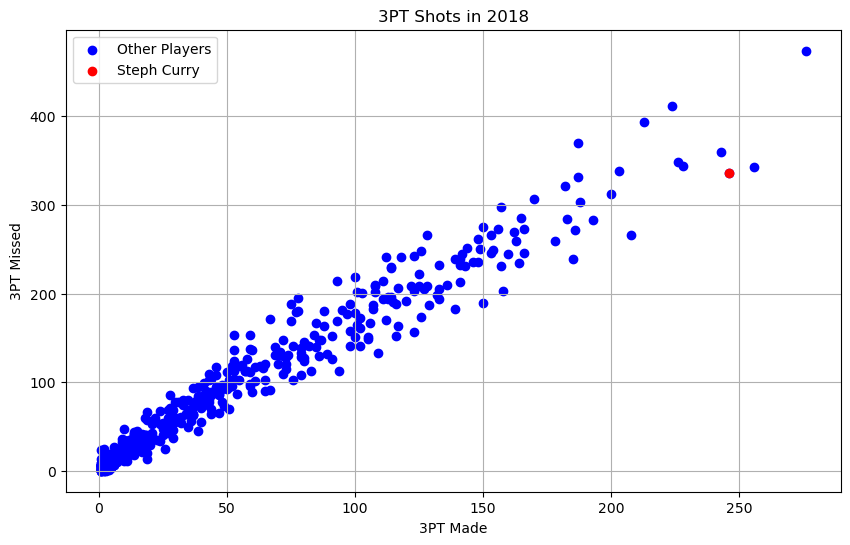

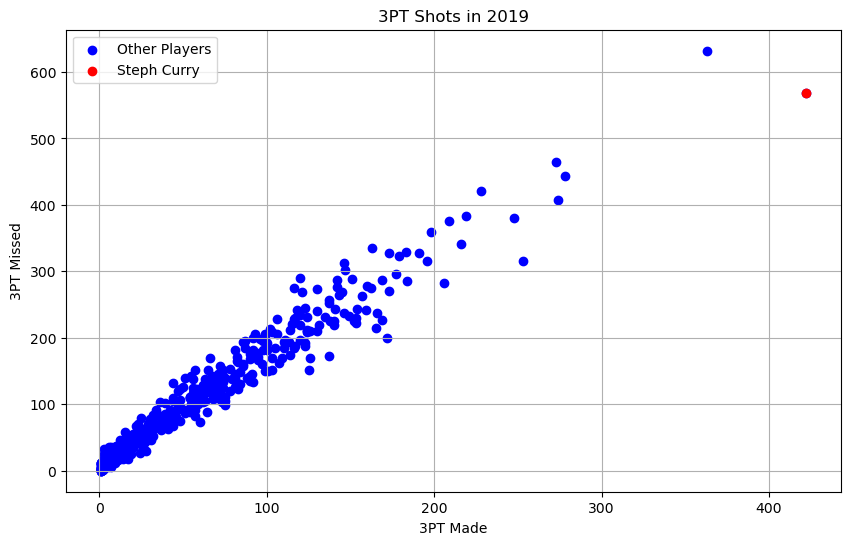

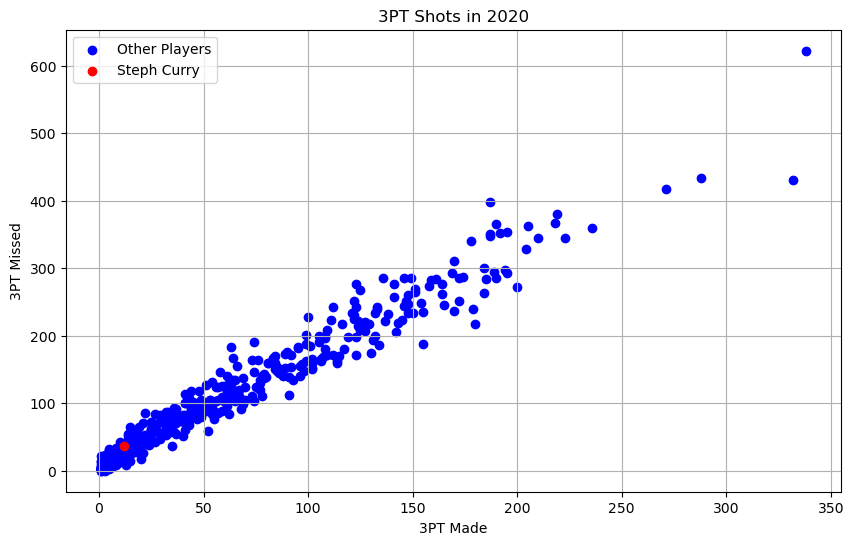

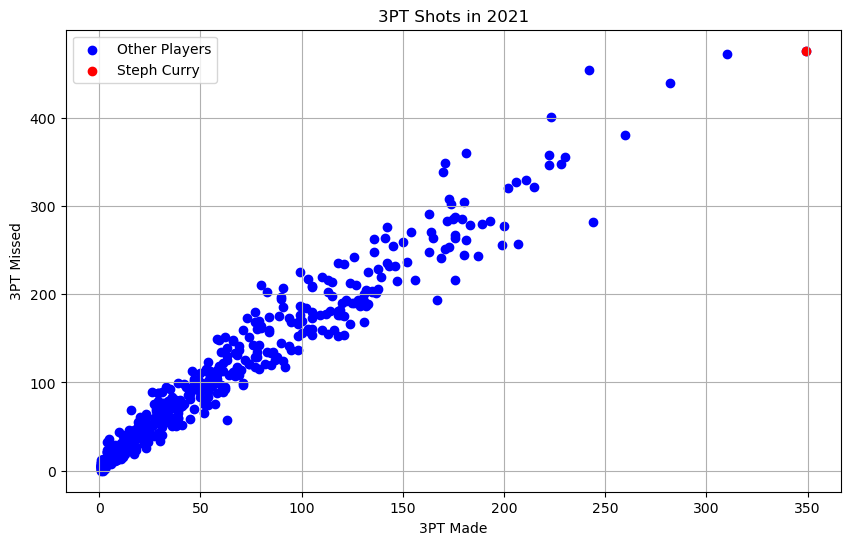

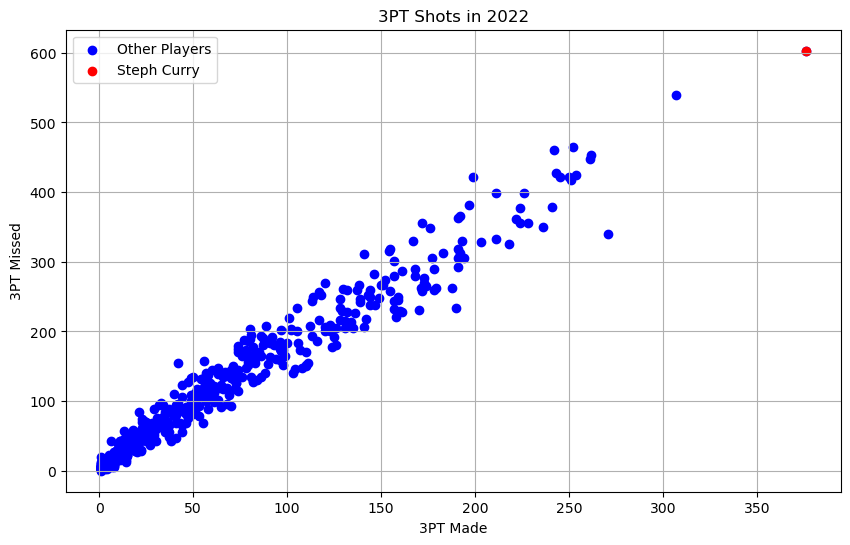

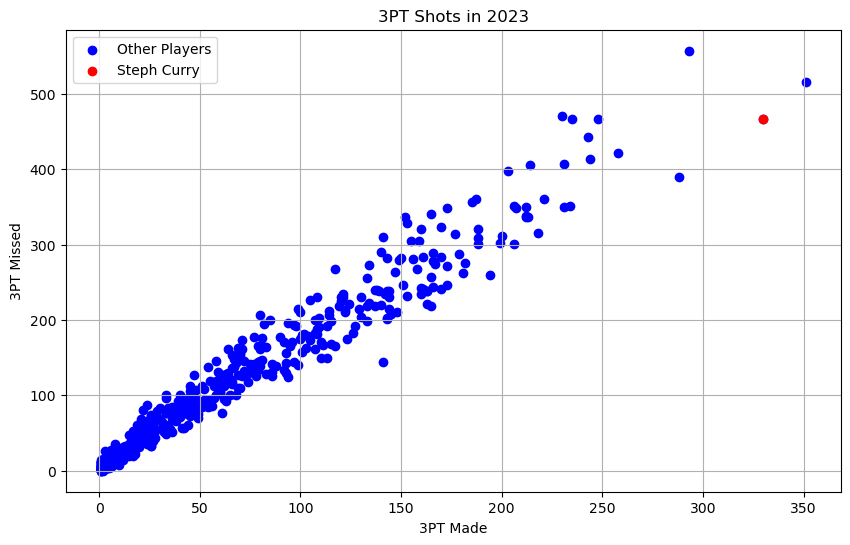

In [13]:
highlight_player = 201939

years = list(range(1999, 2023 + 1))

for year_index in range(25):
    year = 1999 + year_index
    made_shots = player_makes_per_season[year_index]
    missed_shots = player_misses_per_season[year_index]
    
    players = list(made_shots.keys())
    made_counts = [made_shots[player] for player in players]
    missed_counts = [missed_shots[player] for player in players]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(made_counts, missed_counts, color='blue', label='Other Players')
    
    # highlight steph
    if highlight_player in made_shots and year >= 2010:
        plt.scatter(made_shots[highlight_player], missed_shots[highlight_player], color='red', label='Steph Curry')
    
    plt.title(f"3PT Shots in {year}")
    plt.xlabel("3PT Made")
    plt.ylabel("3PT Missed")
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [35]:
max_makes_player = max(player_makes_per_season[0], key=player_makes_per_season[0].get)
max_makes = player_makes_per_season[0][max_makes_player]
max_makes_player
max_makes
player_misses_per_season[0][244]

214

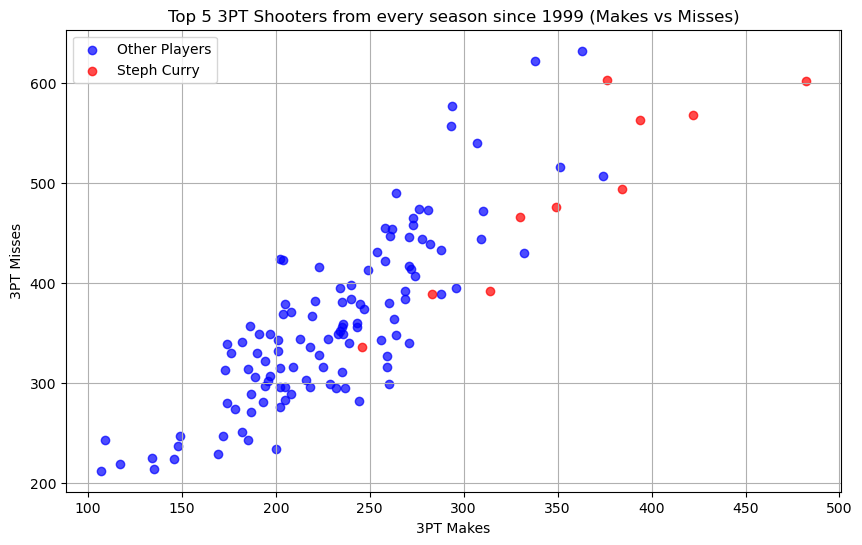

In [18]:
# Initialize lists of heaps for tracking top 5 shooters by makes per season
max_heap_player_makes = [[] for _ in range(25)]
all_makes = []
all_misses = []
curry_makes = []
curry_misses = []

#iterate through each year and gather the top 5 players' data
for year_index in range(25):
    made_shots = player_makes_per_season[year_index]
    
    # Push player data into the heap, negating shot count to simulate a max heap, default is min heap
    for player in made_shots.keys():
        heapq.heappush(max_heap_player_makes[year_index], (-made_shots[player], player))
    
    # Retrieve  top 5 players for each season by makes
    top_5_makes = heapq.nsmallest(5, max_heap_player_makes[year_index])
    
    for count, player in top_5_makes:
        made_shots = -count  
        missed_shots = player_misses_per_season[year_index][player]  
        
        if player == 201939:
            curry_makes.append(made_shots)
            curry_misses.append(missed_shots)
        else:
            all_makes.append(made_shots)
            all_misses.append(missed_shots)

plt.figure(figsize=(10, 6))

# Plot other players in blue
plt.scatter(all_makes, all_misses, color='blue', alpha=0.7, label='Other Players')

# Plot Curry in red
plt.scatter(curry_makes, curry_misses, color='red', alpha=0.7, label='Steph Curry')

plt.xlabel('3PT Makes')
plt.ylabel('3PT Misses')
plt.title('Top 5 3PT Shooters from every season since 1999 (Makes vs Misses)')
plt.legend() 
plt.grid(True)

plt.show()


In [ ]:
x = shot['location_x']
y = shot['location_y']
plt.scatter(x,y, s=.005,c='b', marker= '.')

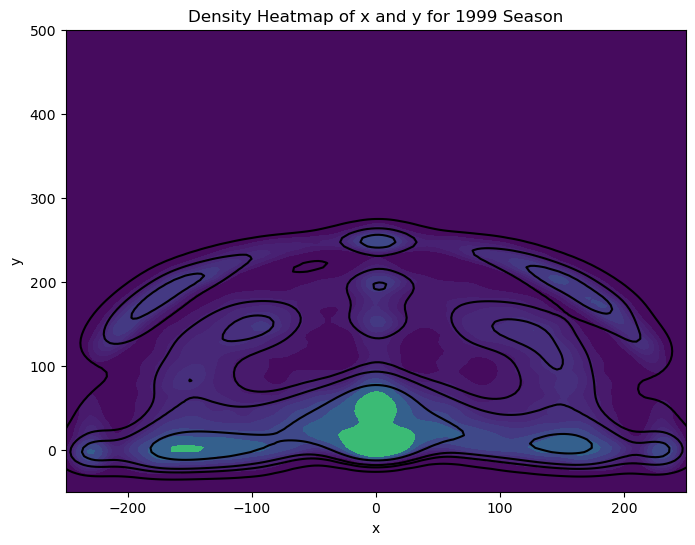

In [4]:
# Access the dataframe for the 1999 season using the file path
df_1999 = dataframes['C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp1999.csv']

# Convert x and y to numeric
df_1999['x'] = pd.to_numeric(df_1999['x'], errors='coerce')
df_1999['y'] = pd.to_numeric(df_1999['y'], errors='coerce')

# Drop rows with NaN values in x or y and exclude (0, 0)
df_1999 = df_1999.dropna(subset=['x', 'y'])
df_1999 = df_1999[(df_1999['x'] != 0) | (df_1999['y'] != 0)]  

# creat heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_1999['x'], y=df_1999['y'], cmap='viridis', fill=True, thresh=0, bw_adjust=0.5)
sns.kdeplot(x=df_1999['x'], y=df_1999['y'], color="black", levels=5)  
plt.xlim(-250, 250)
plt.ylim(-50, 500)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Density Heatmap of x and y for 1999 Season")
plt.show()

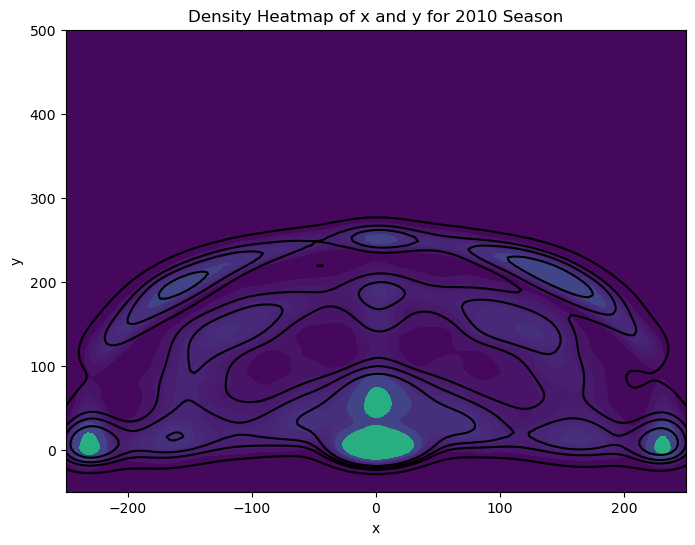

In [8]:
# Access the dataframe for the 2010 season using the file path
df_2010 = dataframes['C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2010.csv']

# Convert x and y to numeric
df_2010['x'] = pd.to_numeric(df_2010['x'], errors='coerce')
df_2010['y'] = pd.to_numeric(df_2010['y'], errors='coerce')

# Drop rows with NaN values in x or y and exclude (0, 0)
df_2010 = df_2010.dropna(subset=['x', 'y'])
df_2010 = df_2010[(df_2010['x'] != 0) | (df_2010['y'] != 0)]  
 
# creat heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_2010['x'], y=df_2010['y'], cmap='viridis', fill=True, thresh=0, bw_adjust=0.5)
sns.kdeplot(x=df_2010['x'], y=df_2010['y'], color="black", levels=5)  # Adding contour lines
plt.xlim(-250, 250) 
plt.ylim(-50, 500)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Density Heatmap of x and y for 2010 Season")
plt.show()

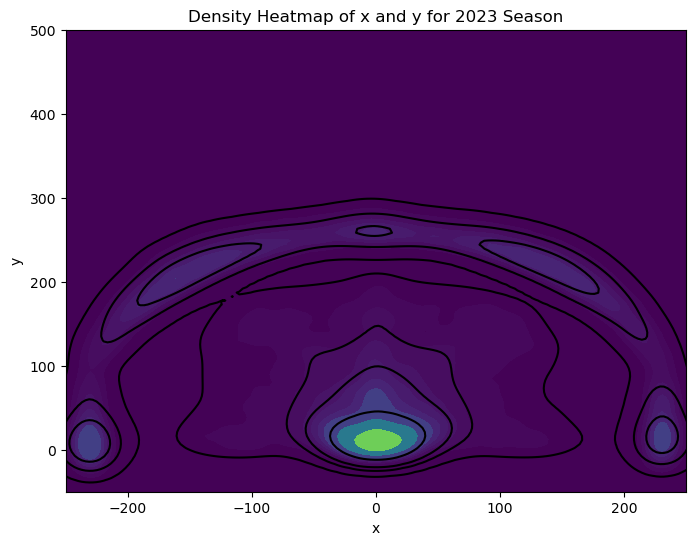

In [7]:
# Access the dataframe for the 2023 season using the file path
df_2023 = dataframes['C:\\Users\\Lachlan\\Desktop\\PlayByPlayData\\pbp2023.csv']

# Convert x and y to numeric
df_2023['x'] = pd.to_numeric(df_2023['x'], errors='coerce')
df_2023['y'] = pd.to_numeric(df_2023['y'], errors='coerce')

# Drop rows with NaN values in x or y and exclude (0, 0)
df_2023 = df_2023.dropna(subset=['x', 'y'])
df_2023 = df_2023[(df_2023['x'] != 0) | (df_2023['y'] != 0)]  
 
# creat heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_2023['x'], y=df_2023['y'], cmap='viridis', fill=True, thresh=0, bw_adjust=0.5)
sns.kdeplot(x=df_2023['x'], y=df_2023['y'], color="black", levels=5)  # Adding contour lines
plt.xlim(-250, 250) 
plt.ylim(-50, 500)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Density Heatmap of x and y for 2023 Season")
plt.show()

In [10]:
# Function to get the year index
def year_to_index(year):
    return year - 1999

# Initialize lists for tracking 3PT makes and misses per quarter for each year
three_pointers_made_per_quarter = [[0] * 4 for _ in range(25)]
three_pointers_missed_per_quarter = [[0] * 4 for _ in range(25)]

# Iterate through the pre-loaded dataframes and process data
for file, df in dataframes.items():
    year = int(file.split('pbp')[1].split('.')[0])
    if 1999 <= year <= 2023:
        year_index = year_to_index(year)
        for _, row in df.iterrows():
            if '3PT' in str(row['desc']):
                if row['type'] == 'Made Shot':
                    if row['period'] == 1:
                        three_pointers_made_per_quarter[year_index][0] += 1
                    elif row['period'] == 2:
                        three_pointers_made_per_quarter[year_index][1] += 1
                    elif row['period'] == 3:
                        three_pointers_made_per_quarter[year_index][2] += 1
                    elif row['period'] == 4:
                        three_pointers_made_per_quarter[year_index][3] += 1
                elif row['type'] == 'Missed Shot':
                    if row['period'] == 1:
                        three_pointers_missed_per_quarter[year_index][0] += 1
                    elif row['period'] == 2:
                        three_pointers_missed_per_quarter[year_index][1] += 1
                    elif row['period'] == 3:
                        three_pointers_missed_per_quarter[year_index][2] += 1
                    elif row['period'] == 4:
                        three_pointers_missed_per_quarter[year_index][3] += 1

In [11]:
print(three_pointers_made_per_quarter)

[[1579, 1665, 1755, 1978], [2911, 2893, 2998, 3390], [2730, 2930, 3187, 3328], [2935, 3199, 3346, 3612], [2995, 3244, 3380, 3505], [3075, 3054, 3277, 3622], [3329, 3527, 3797, 4004], [3325, 3648, 3982, 4062], [3568, 3859, 4046, 4302], [3858, 4341, 4265, 4595], [3978, 4321, 4407, 4666], [3988, 4157, 4137, 4492], [3751, 4230, 4296, 4468], [3224, 3294, 3446, 3624], [4350, 4792, 4680, 4855], [4903, 4955, 5141, 5303], [5059, 5090, 5136, 5274], [5598, 5403, 5689, 5681], [6450, 6147, 6392, 6262], [6307, 5996, 6348, 6016], [6816, 6499, 7002, 6436], [7123, 6963, 7039, 6726], [7888, 7164, 7431, 7047], [8641, 7986, 8254, 7853], [8540, 8056, 8276, 7446]]


In [12]:
print(three_pointers_missed_per_quarter)

[[3035, 3316, 3293, 4019], [4830, 5407, 5639, 6474], [4849, 5225, 5676, 6418], [5017, 5826, 6031, 7089], [5303, 5923, 6152, 6937], [5398, 5833, 6147, 7242], [5679, 6492, 6671, 7698], [5777, 6547, 6741, 7840], [6158, 7017, 6873, 8243], [6485, 7670, 7395, 8587], [6677, 7364, 7472, 8526], [6683, 7549, 7680, 8590], [6644, 7217, 7659, 8501], [5689, 6252, 6414, 7074], [7397, 8245, 8336, 9417], [8290, 8973, 9023, 9801], [8810, 9421, 9382, 10549], [9682, 9977, 10275, 10852], [10747, 11062, 11480, 11947], [10564, 10705, 10912, 11348], [11906, 12080, 12238, 12486], [12356, 12403, 12492, 12585], [12767, 12669, 12697, 12925], [15088, 14998, 14813, 14832], [14547, 14546, 14140, 14104]]


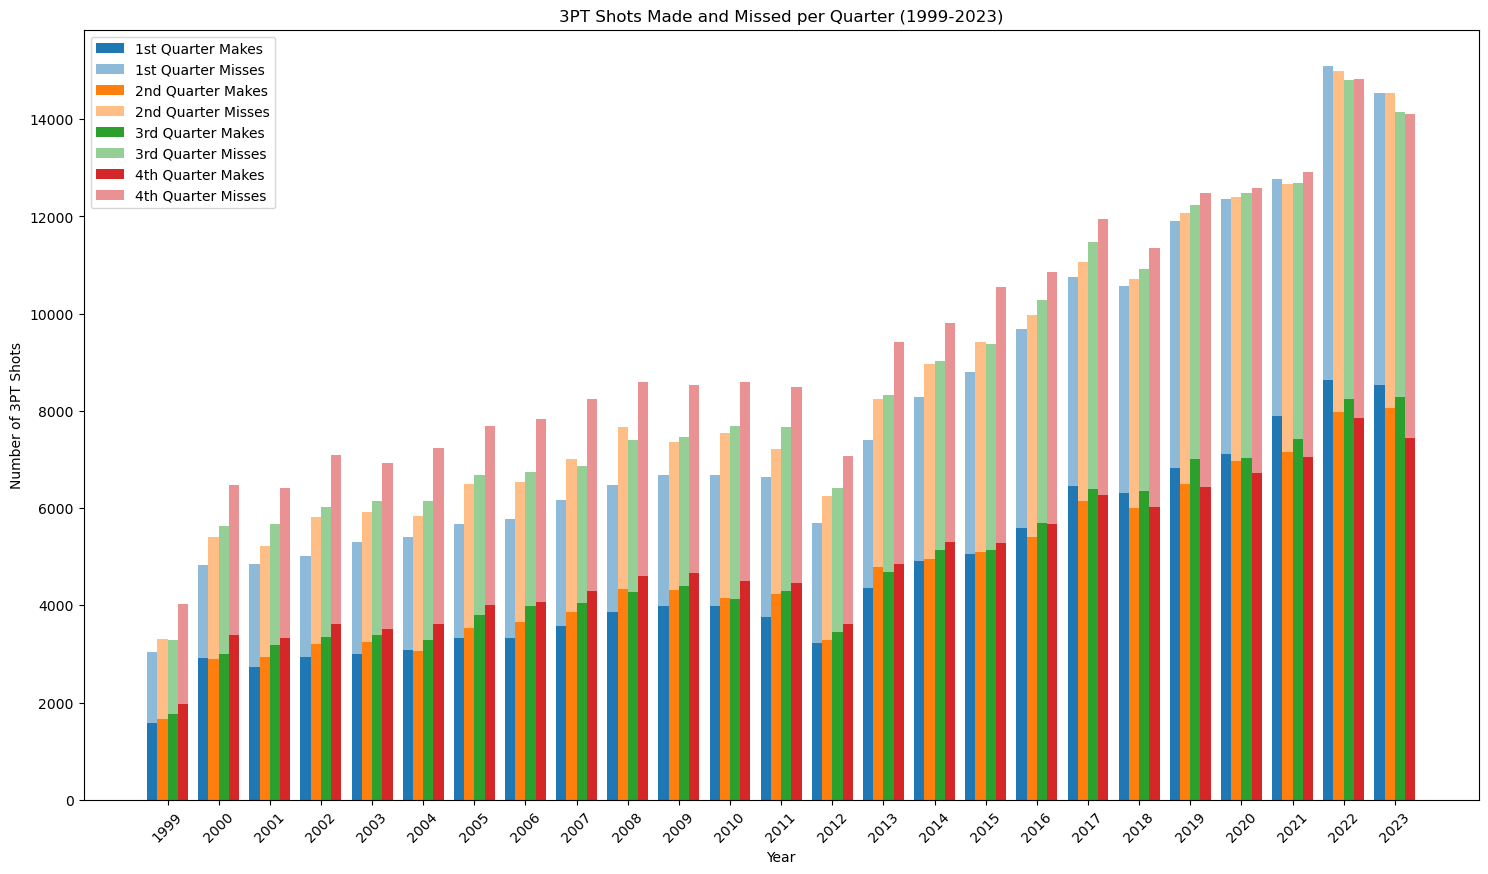

In [16]:
years = list(range(1999, 2024))
quarters = ['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter']

# Convert lists to numpy arrays
makes = np.array(three_pointers_made_per_quarter)
misses = np.array(three_pointers_missed_per_quarter)

fig, ax = plt.subplots(figsize=(18, 10))

# width of the bars + positions on the x-axis
bar_width = 0.2
bar_positions = np.arange(len(years))

# plot  data for each quarter
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

for i in range(4):
    ax.bar(bar_positions + i * bar_width, makes[:, i], width=bar_width, label=f'{quarters[i]} Makes', color=colors[i])
    ax.bar(bar_positions + i * bar_width, misses[:, i] - makes[:, i], width=bar_width, bottom=makes[:, i], color=colors[i], alpha=0.5, label=f'{quarters[i]} Misses')

# add labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Number of 3PT Shots')
ax.set_title('3PT Shots Made and Missed per Quarter (1999-2023)')
ax.set_xticks(bar_positions + 1.5 * bar_width)  
ax.set_xticklabels(years, rotation=45)
ax.legend()

plt.show()

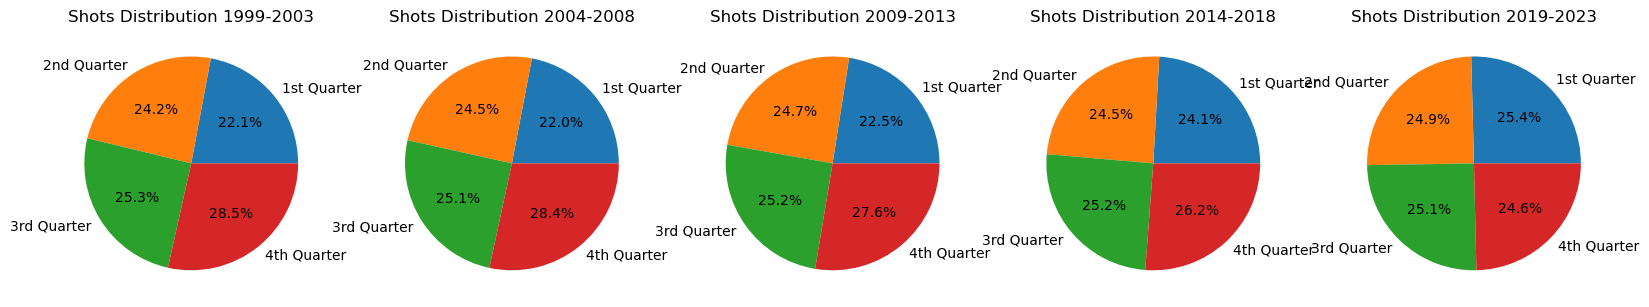

In [17]:
grouped_years = {
    '1999-2003': list(range(1999, 2004)),
    '2004-2008': list(range(2004, 2009)),
    '2009-2013': list(range(2009, 2014)),
    '2014-2018': list(range(2014, 2019)),
    '2019-2023': list(range(2019, 2024))
}

grouped_shots = {key: np.zeros(4) for key in grouped_years.keys()}

# Calculate total shots for each group
for group_name, years in grouped_years.items():
    for year in years:
        year_index = year - 1999
        grouped_shots[group_name] += np.array(three_pointers_made_per_quarter[year_index]) + np.array(three_pointers_missed_per_quarter[year_index])

# Plot pie charts for each group
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, (group_name, total_shots) in enumerate(grouped_shots.items()):
    axs[i].pie(total_shots, labels=['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    axs[i].set_title(f'Shots Distribution {group_name}')

plt.show()


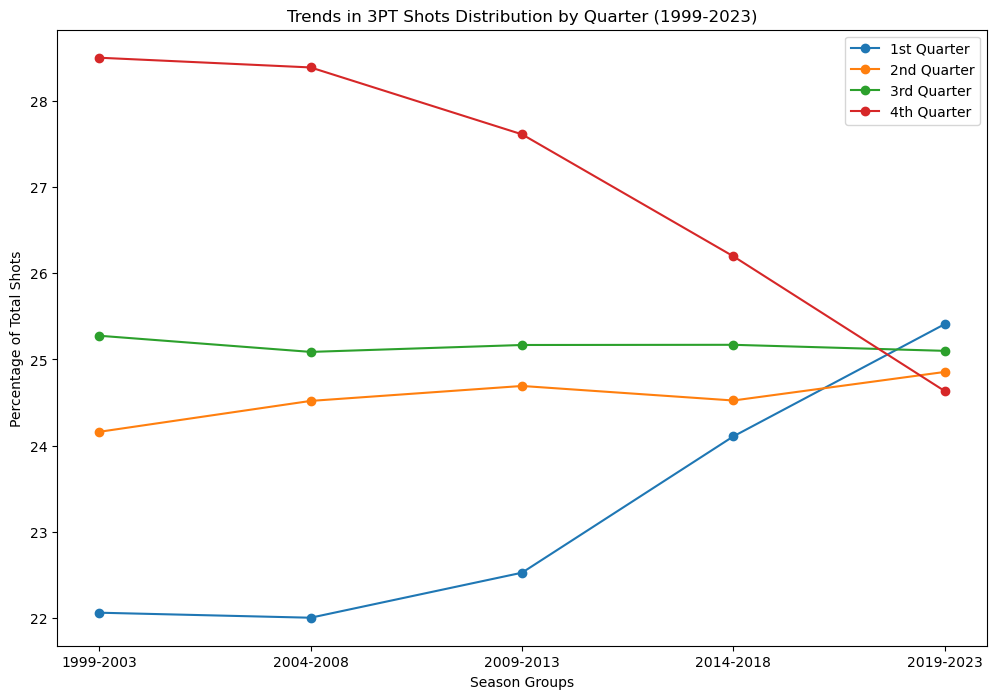

In [21]:
# Calculate percentages for each quarter within each group
grouped_percentages = {key: (total_shots / total_shots.sum()) * 100 for key, total_shots in grouped_shots.items()}

# Prepare data for plotting
quarters = ['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter']
group_names = list(grouped_percentages.keys())
percentages_by_quarter = np.array([grouped_percentages[group] for group in group_names]).T

# Plot line chart
plt.figure(figsize=(12, 8))
for i, quarter in enumerate(quarters):
    plt.plot(group_names, percentages_by_quarter[i], marker='o', label=quarter)

plt.xlabel('Season Groups')
plt.ylabel('Percentage of Total Shots')
plt.title('Trends in 3PT Shots Distribution by Quarter (1999-2023)')
plt.legend()
plt.show()


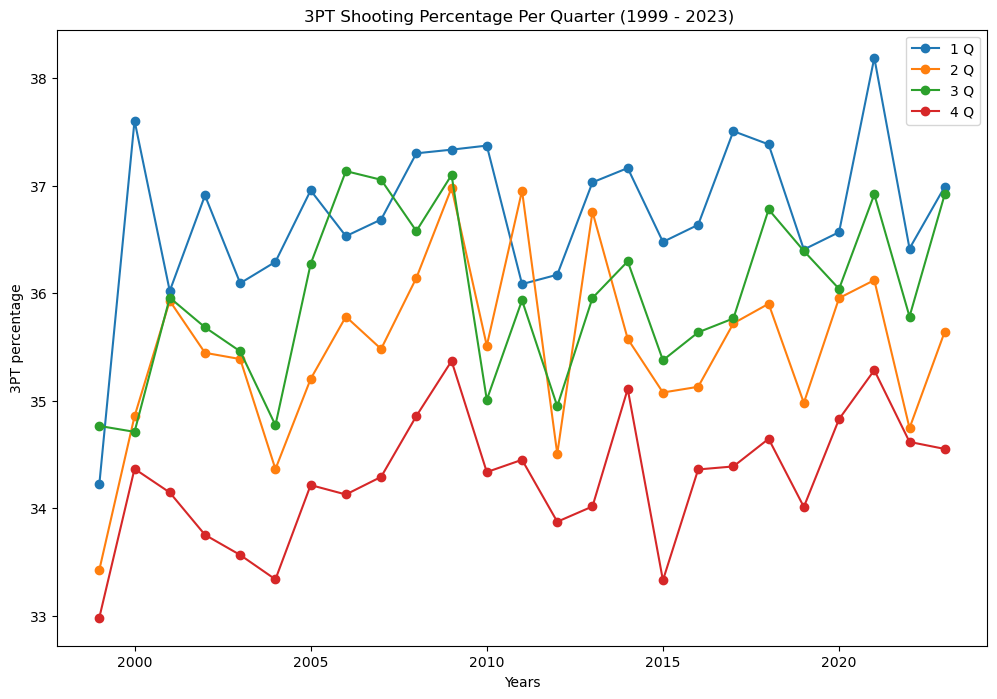

In [42]:
three_point_percentage = [[0] * 4 for _ in range(25)]
years = list(range(1999, 2024))

for i in range(25):
    three_point_percentage[i][0] = (three_pointers_made_per_quarter[i][0] / (three_pointers_missed_per_quarter[i][0] + three_pointers_made_per_quarter[i][0]))* 100
    three_point_percentage[i][1] = (three_pointers_made_per_quarter[i][1] / (three_pointers_missed_per_quarter[i][1] + three_pointers_made_per_quarter[i][1]))* 100
    three_point_percentage[i][2] = (three_pointers_made_per_quarter[i][2] / (three_pointers_missed_per_quarter[i][2] + three_pointers_made_per_quarter[i][2]))* 100
    three_point_percentage[i][3] = (three_pointers_made_per_quarter[i][3] / (three_pointers_missed_per_quarter[i][3] + three_pointers_made_per_quarter[i][3]))* 100

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.plot(years,[three_point_percentage[j][i] for j in range(25)], marker = 'o',label = f'{i+1} Q' )
plt.xlabel('Years')
plt.ylabel('3PT percentage')
plt.title('3PT Shooting Percentage Per Quarter (1999 - 2023) ')
plt.legend()
plt.show()

In [14]:
# Load the dataset into a DataFrame
w_l = pd.read_csv('C:\\Users\\Lachlan\\Desktop\\WL\\advanced_stats_total.csv')

# Initialize wins and losses dictionaries to store cumulative data
wins = [defaultdict(int) for _ in range(24)]

# Function to get rid of Asterisk at the end of the name
def remove_asterisk(team_name):
    if team_name.endswith('*'):
        return team_name[:-1]
    return team_name

# Iterate over the DataFrame rows
for index, row in w_l.iterrows():
    year = row['Year'] - 2000
    team = remove_asterisk(row['Team'])

    try:
        #convert win count to integer
        win_count = int(row['W'])
    except ValueError as e:
        print(f"Error converting win/loss count to integer for row {index}: {e}")
        continue  # Skip this row if conversion fails

    # Store the wins and losses
    wins[year][team] += win_count

for i in range(24):
    wins[i]['Charlotte Hornets'] += wins[i]['Charlotte Bobcats']
    wins[i]['Oklahoma City Thunder'] += wins[i]['Seattle Supersonics']
    wins[i]['New Orleans Pelicans'] += wins[i]['New Orleans/Oklahoma City Hornets']
    wins[i]['New Orleans Pelicans'] += wins[i]['New Orleans Hornets']
    wins[i]['Brooklyn Nets'] += wins[i]['New Jersey Nets']


Error converting win/loss count to integer for row 0: invalid literal for int() with base 10: 'W'
Error converting win/loss count to integer for row 30: cannot convert float NaN to integer
Error converting win/loss count to integer for row 31: invalid literal for int() with base 10: 'W'
Error converting win/loss count to integer for row 61: cannot convert float NaN to integer
Error converting win/loss count to integer for row 62: invalid literal for int() with base 10: 'W'
Error converting win/loss count to integer for row 92: cannot convert float NaN to integer
Error converting win/loss count to integer for row 93: invalid literal for int() with base 10: 'W'
Error converting win/loss count to integer for row 123: cannot convert float NaN to integer
Error converting win/loss count to integer for row 124: invalid literal for int() with base 10: 'W'
Error converting win/loss count to integer for row 154: cannot convert float NaN to integer
Error converting win/loss count to integer for r

67


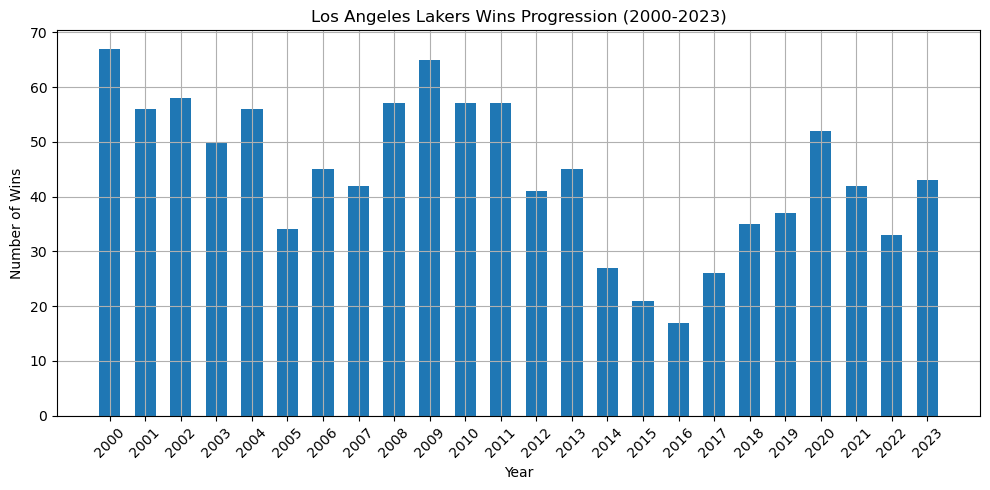

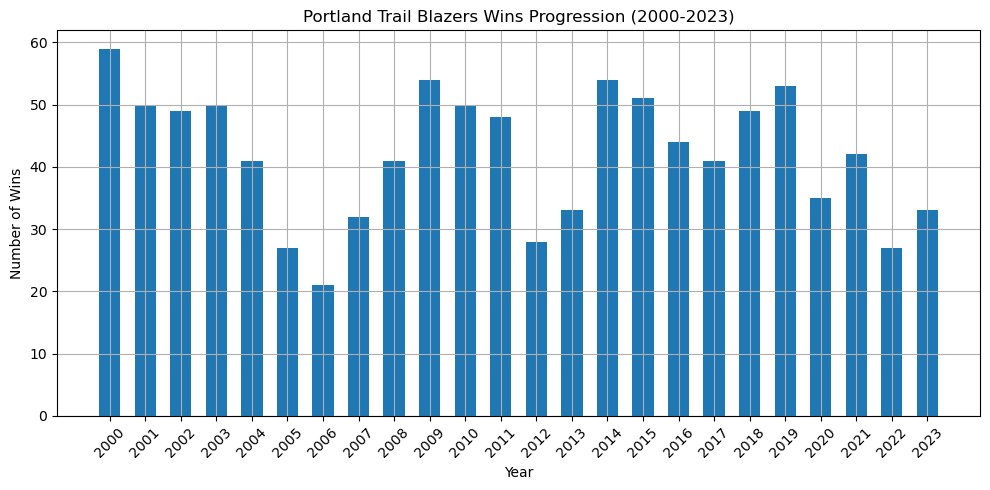

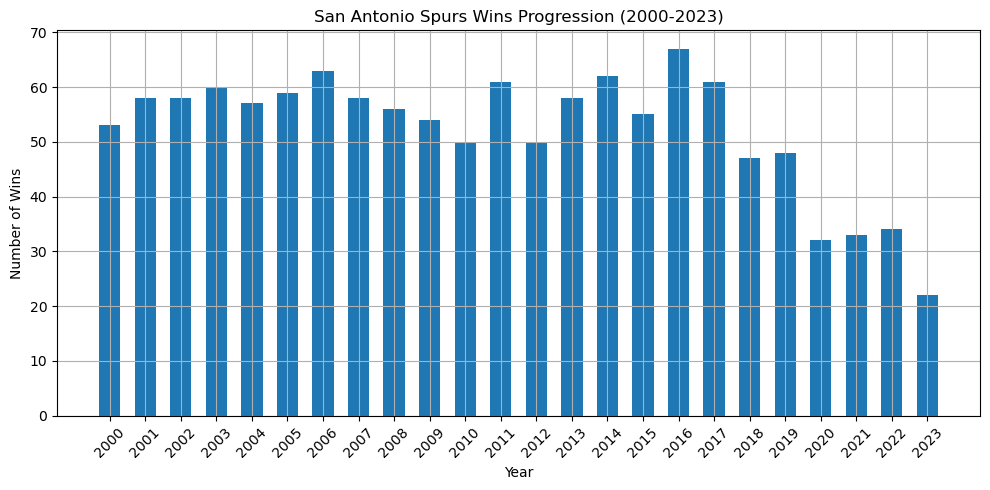

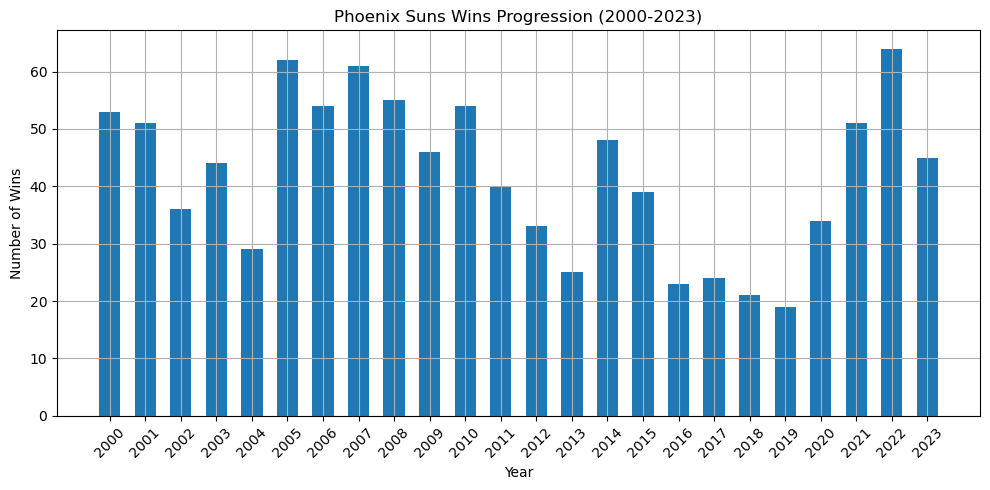

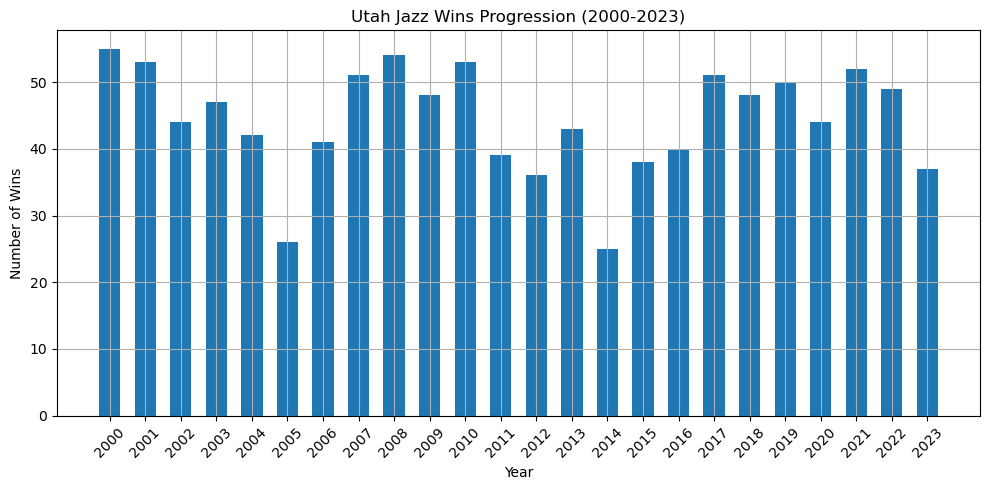

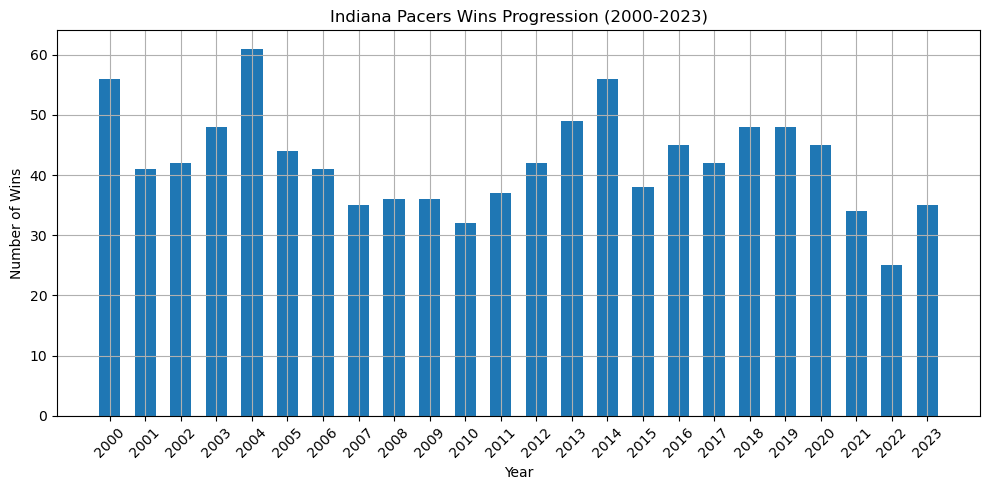

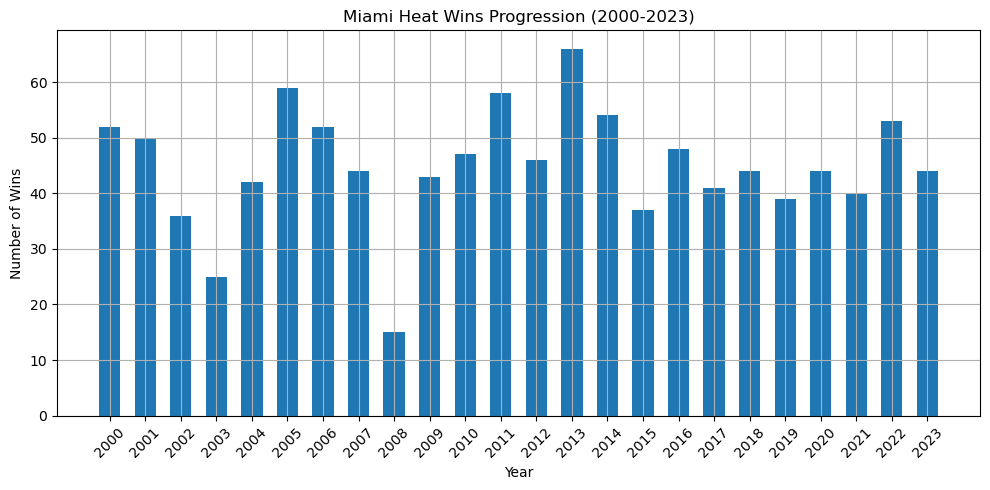

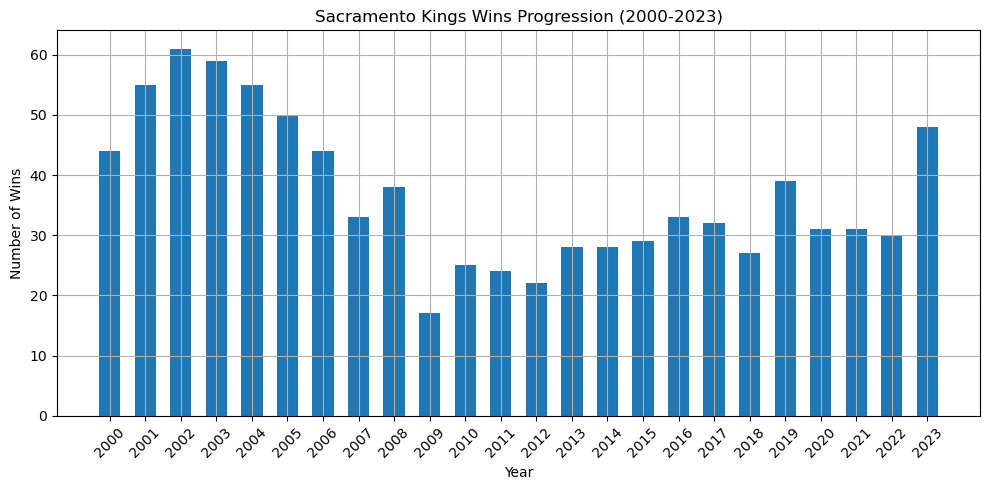

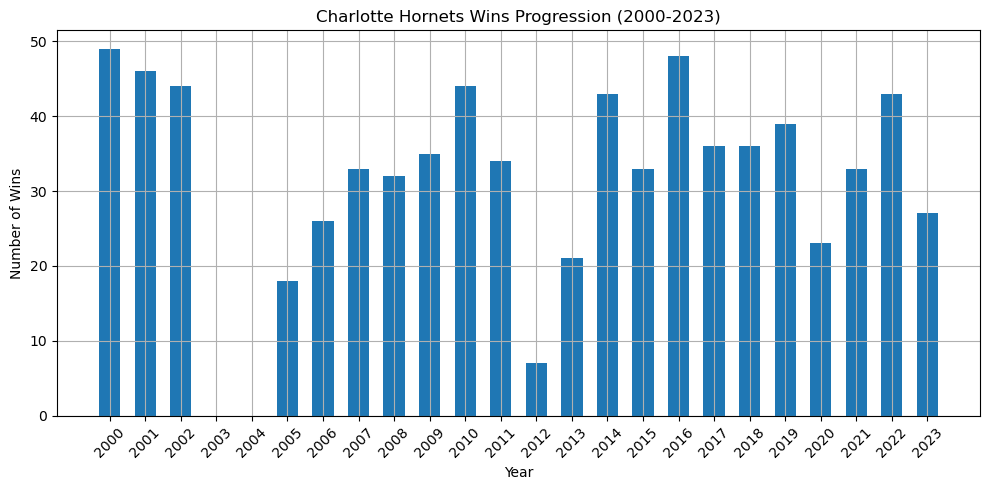

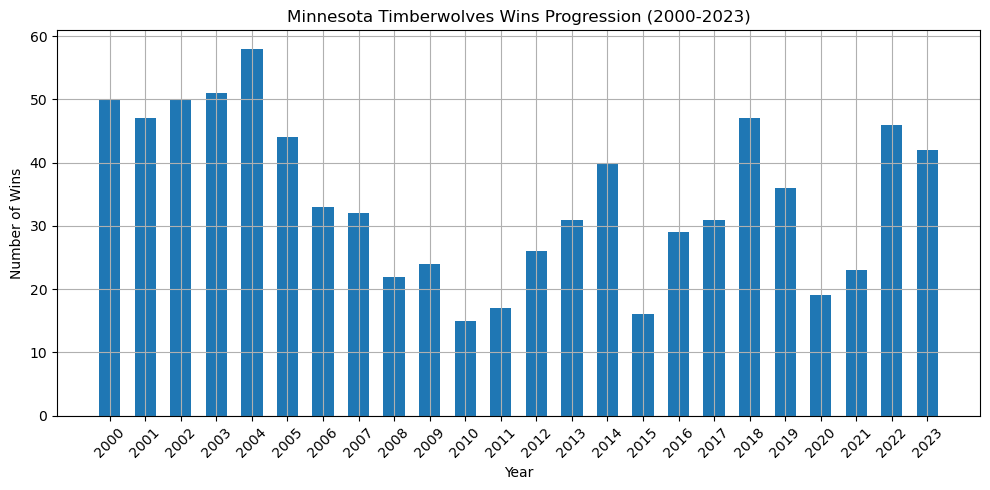

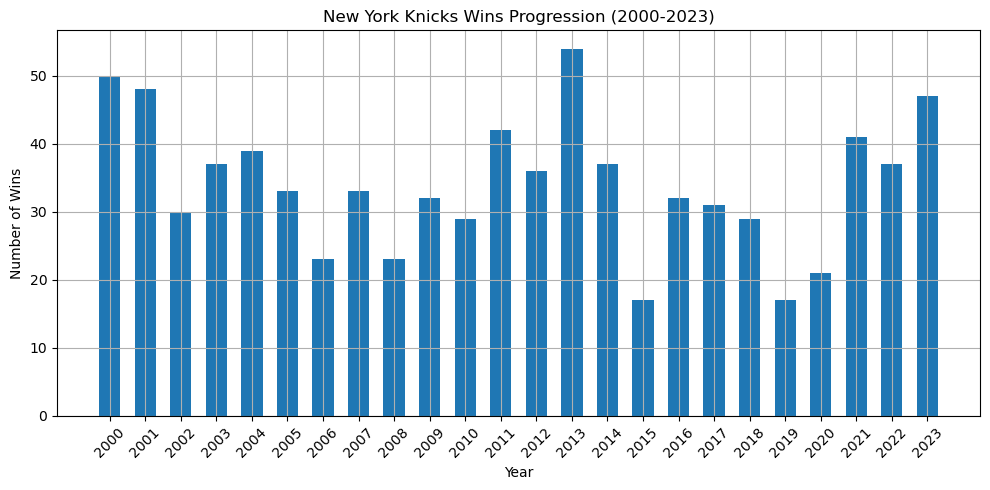

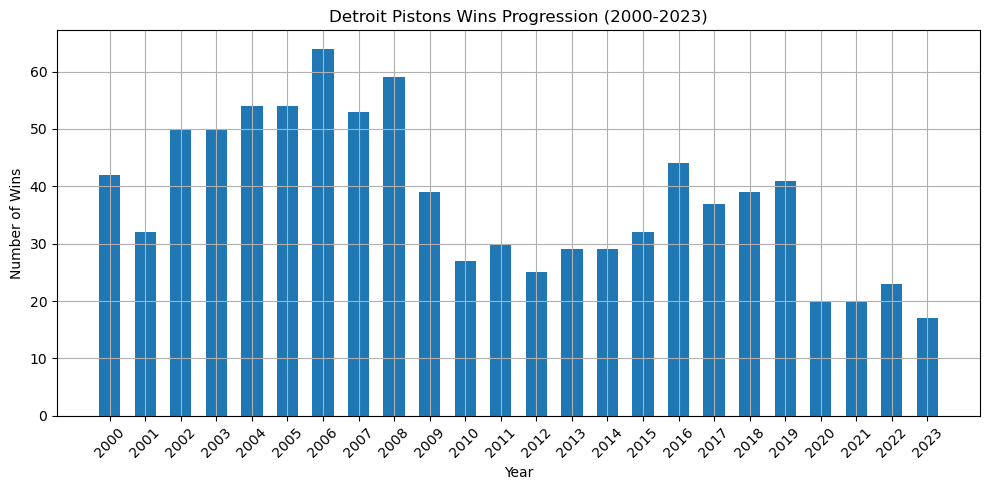

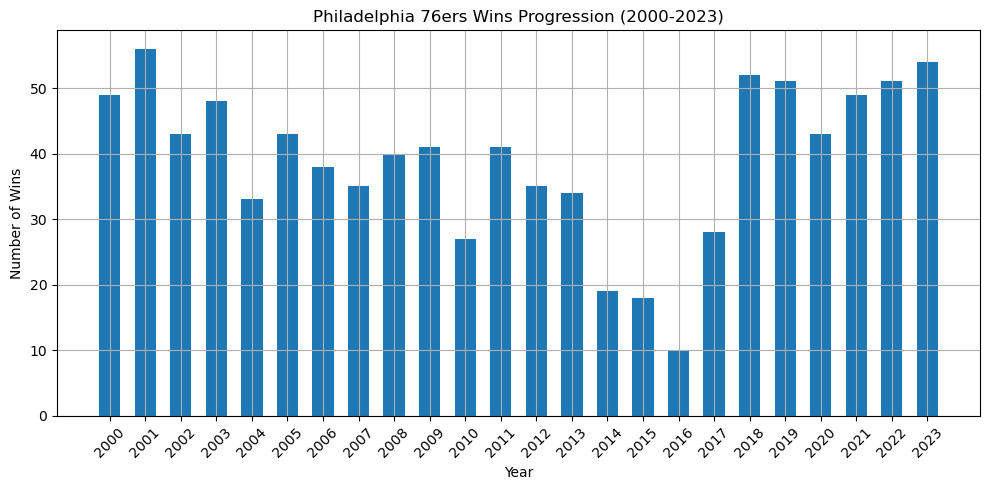

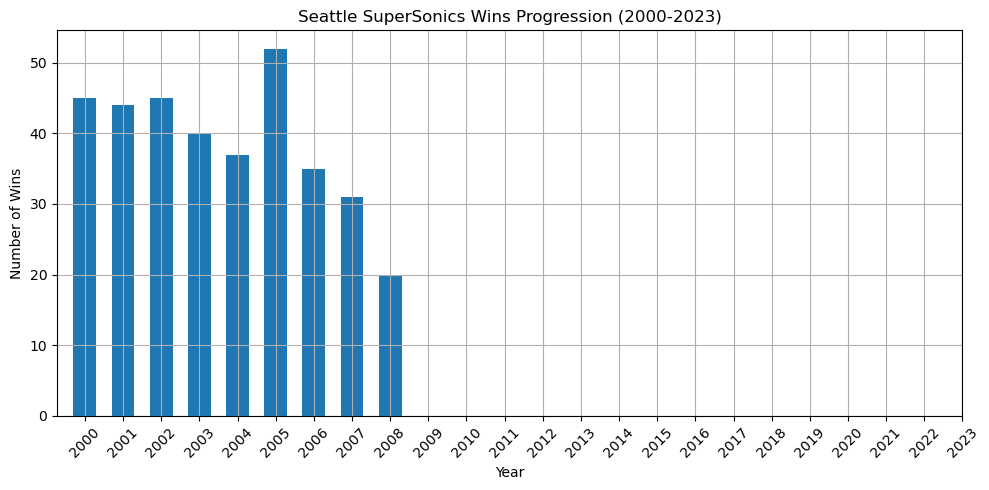

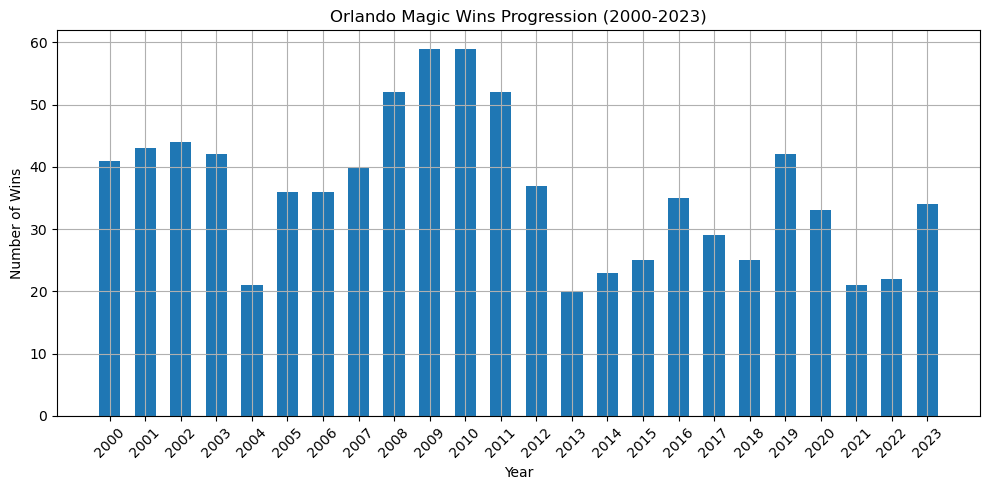

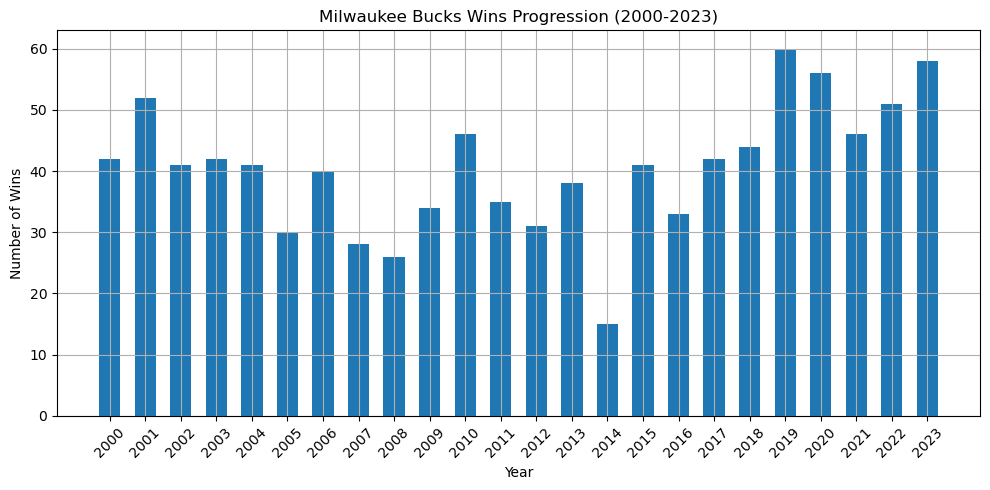

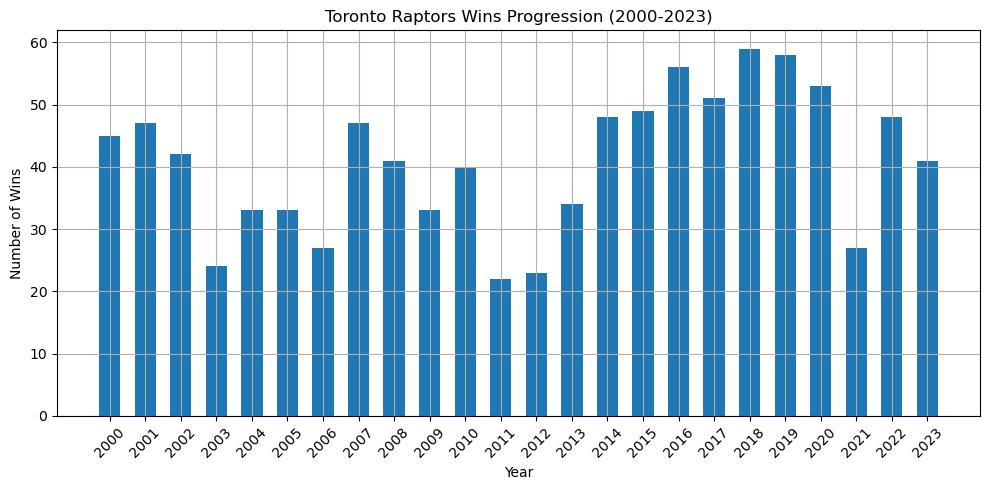

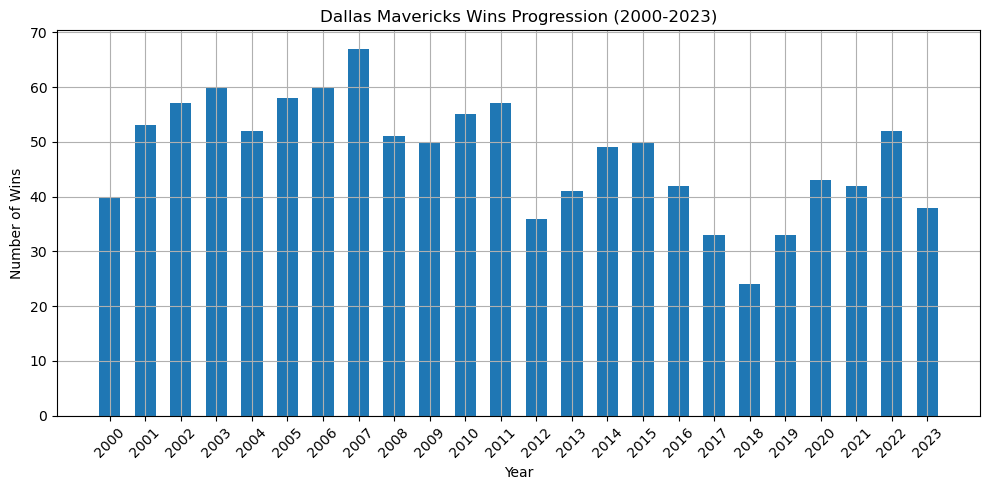

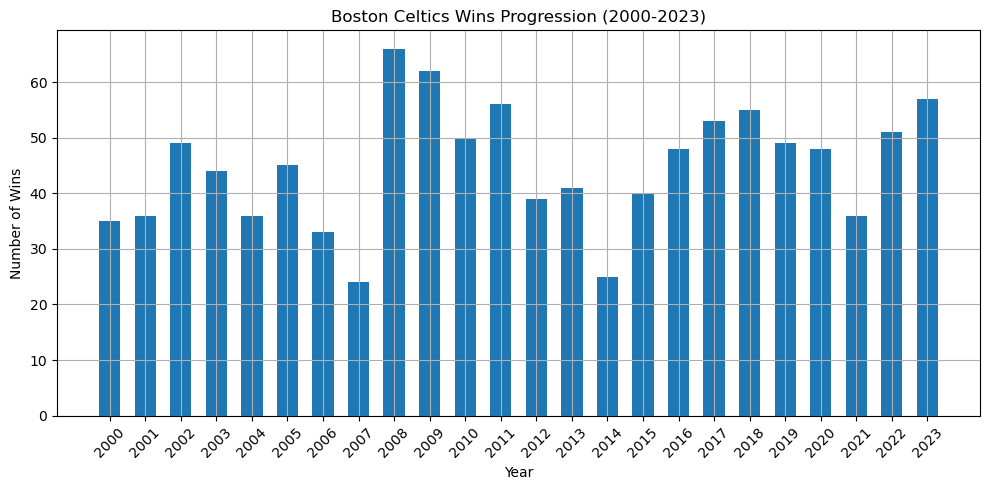

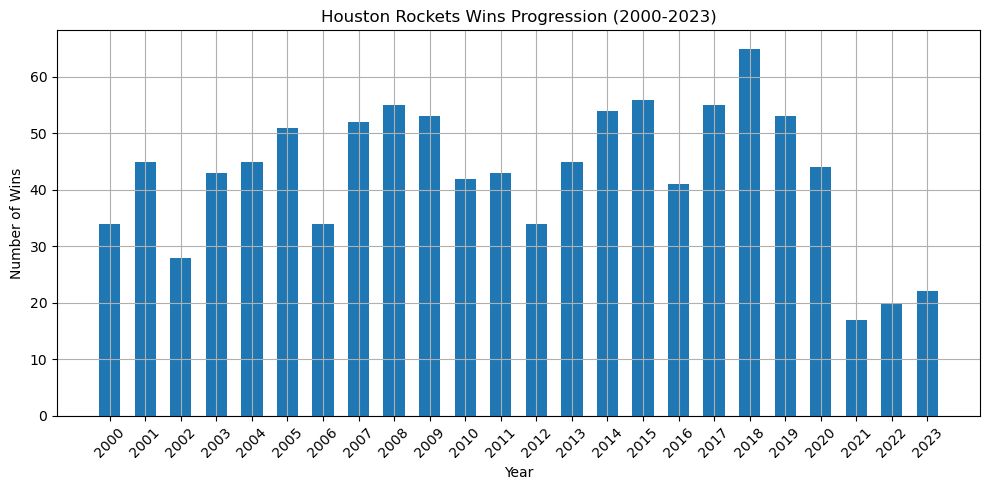

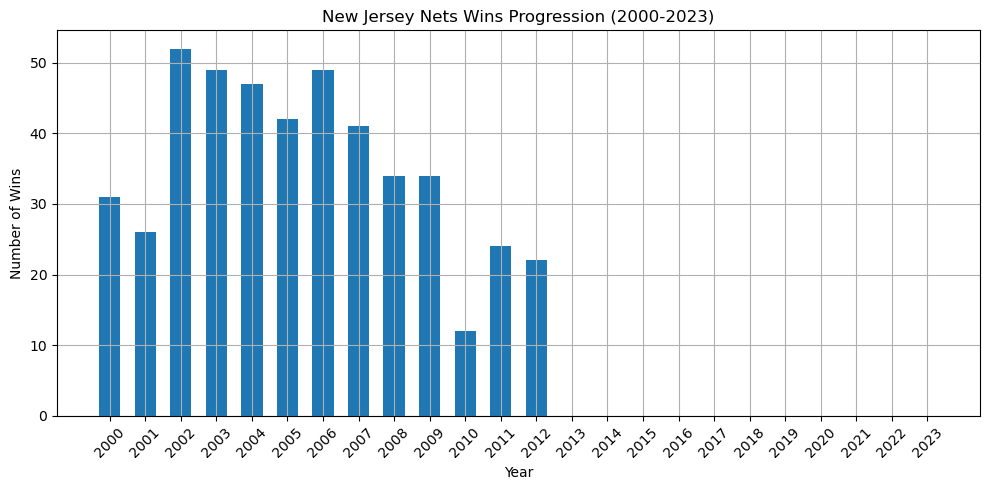

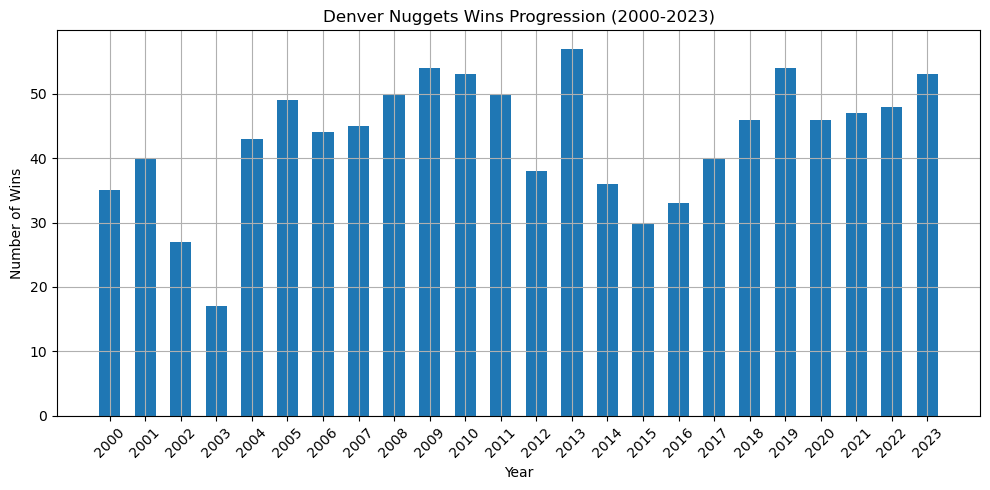

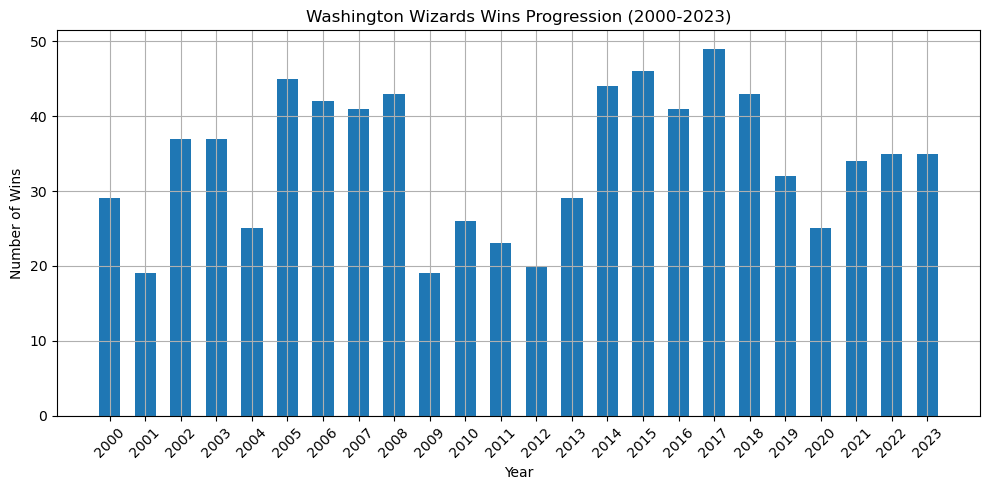

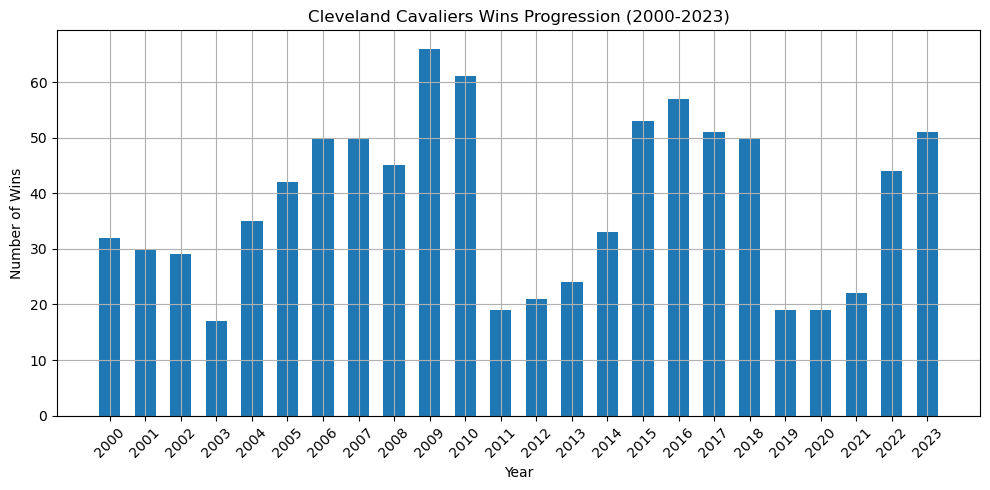

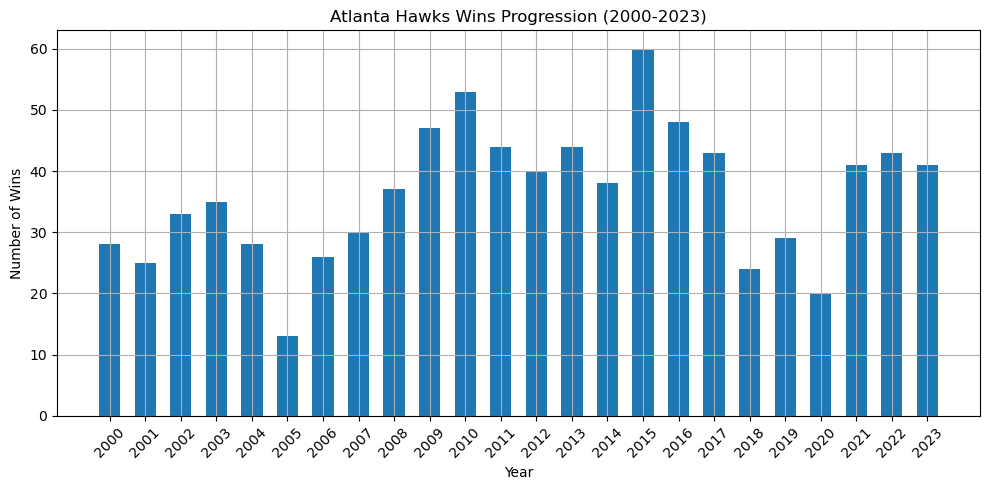

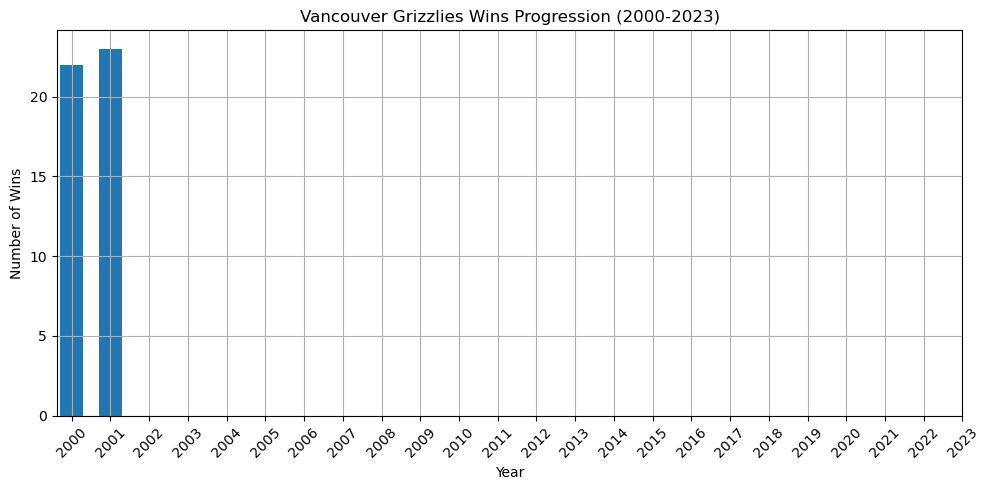

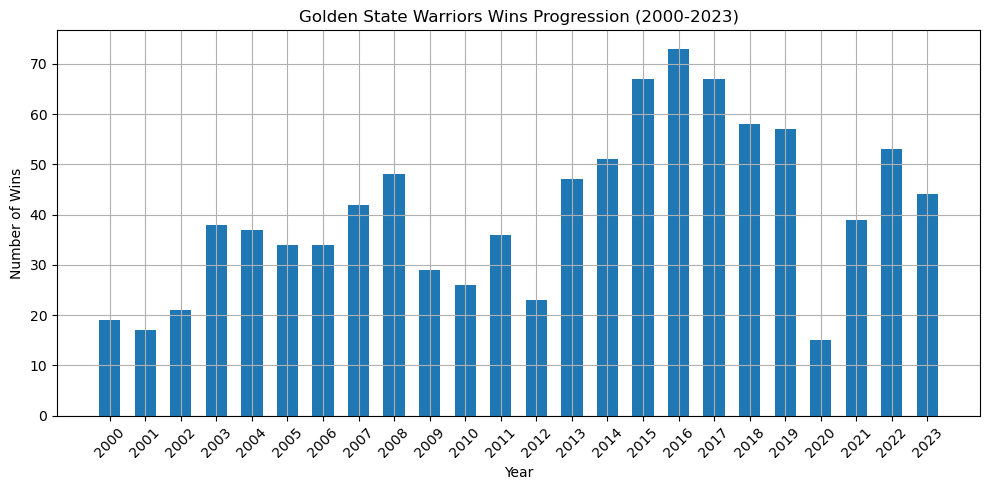

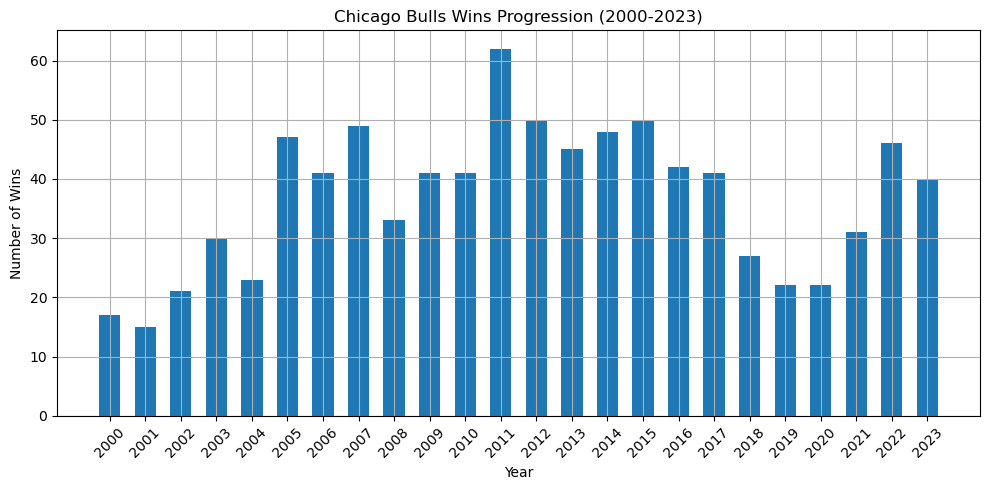

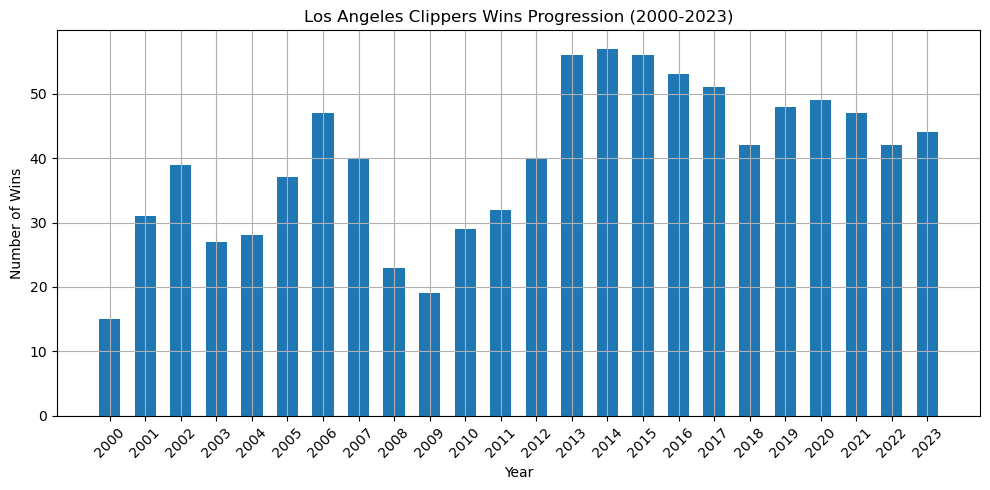

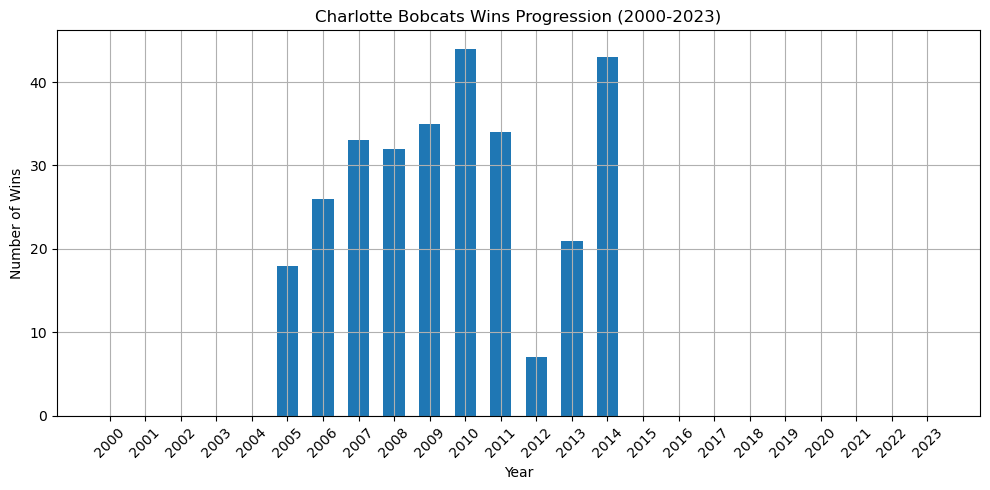

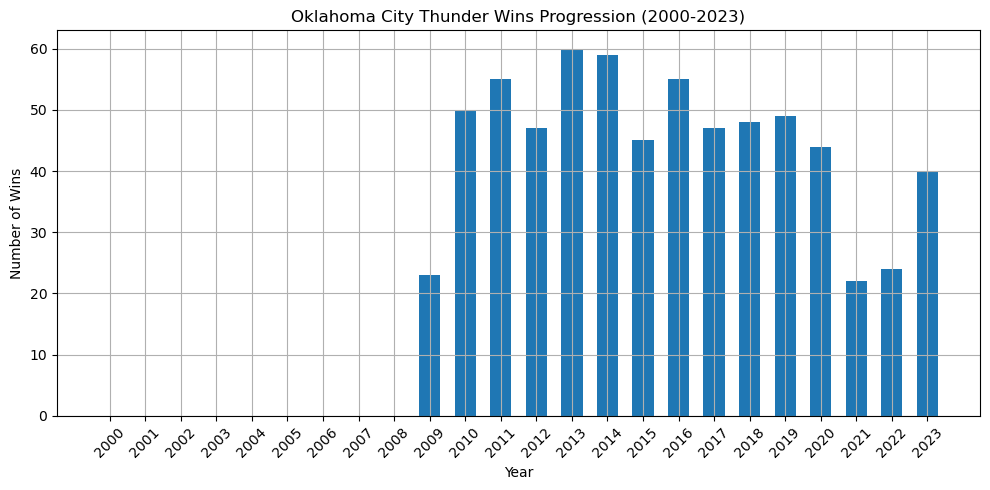

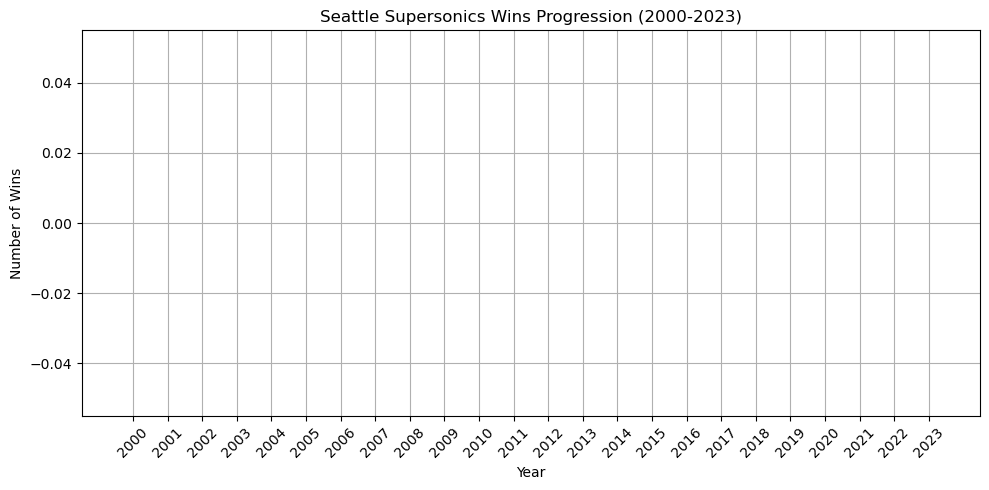

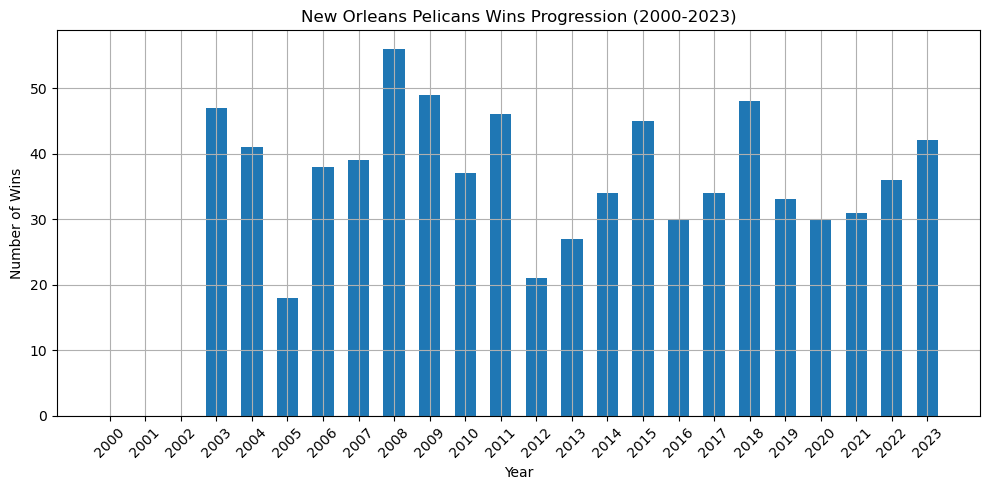

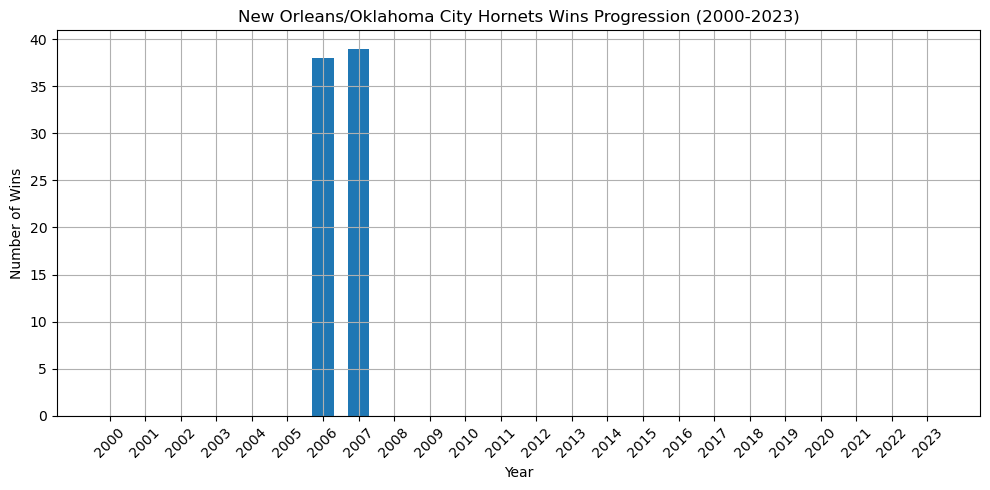

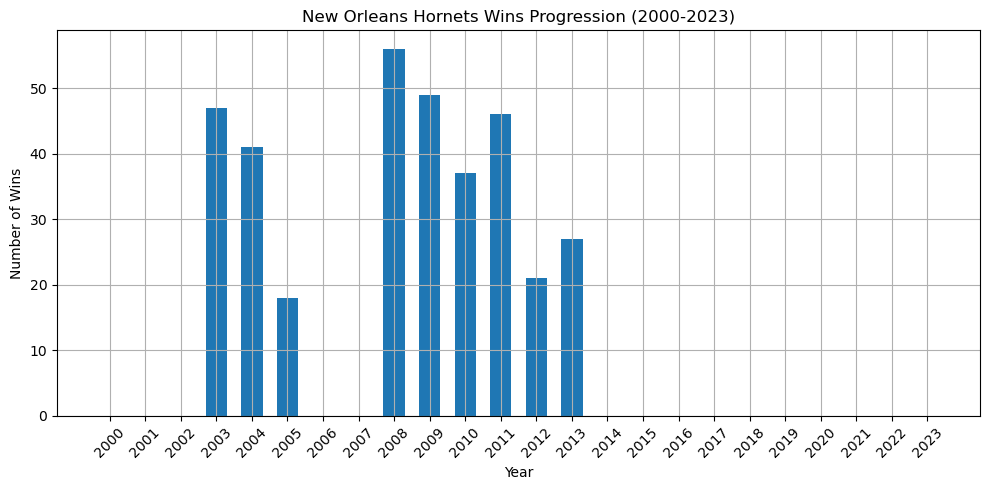

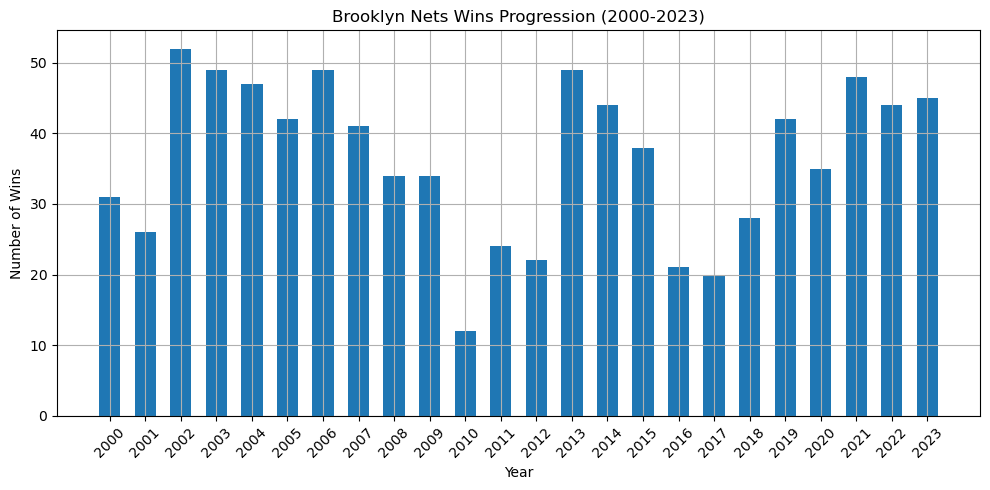

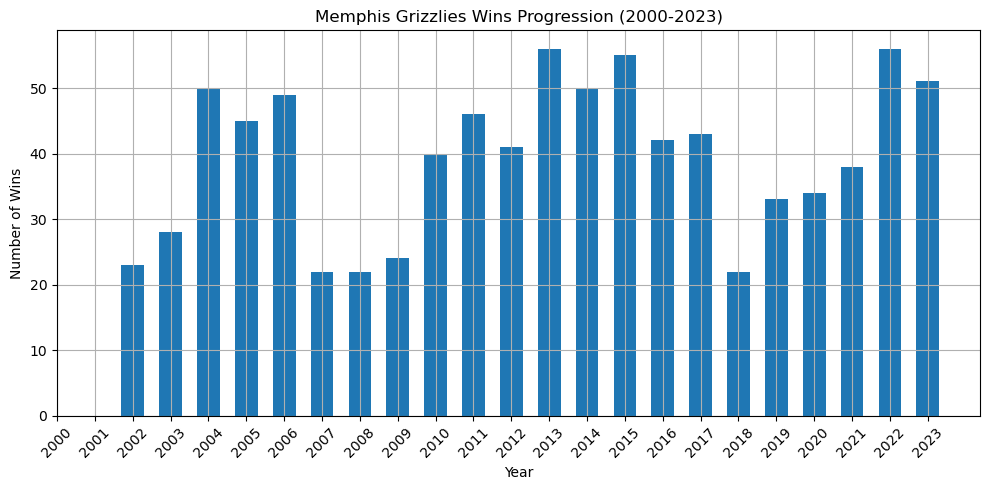

In [15]:
# Convert the wins dictionary to a DataFrame
years = list(range(2000, 2024))
wins_df = pd.DataFrame(wins, index=years)

# Plotting a separate bar chart for each team
for team in wins_df.columns:
    plt.figure(figsize=(10, 5))
    plt.bar(wins_df.index, wins_df[team], width=0.6)
    plt.title(f'{team} Wins Progression (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Wins')
    plt.xticks(years, rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

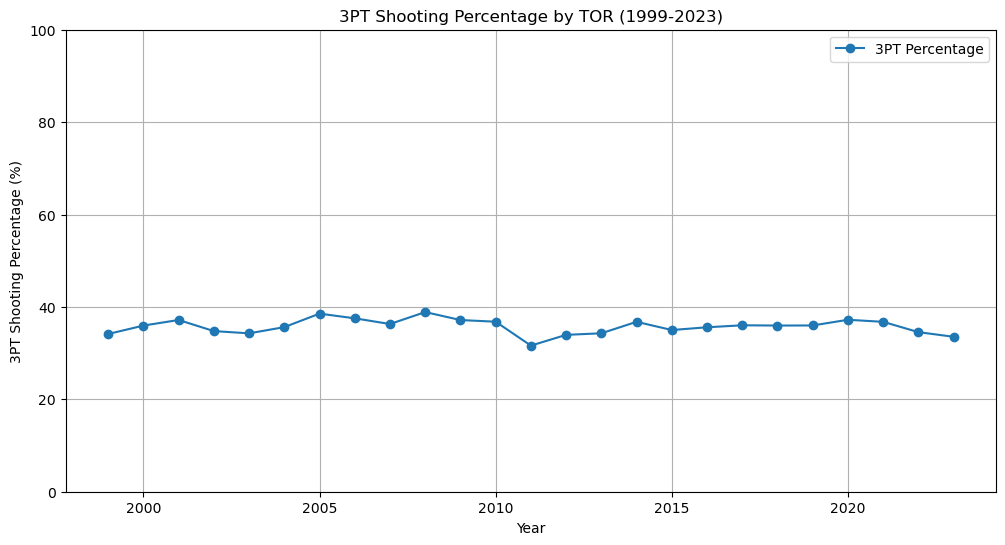

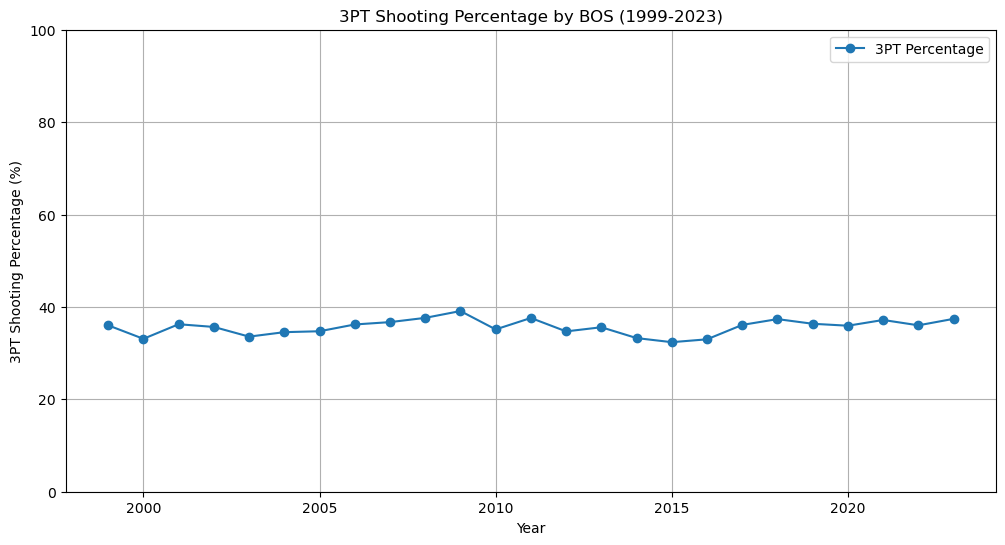

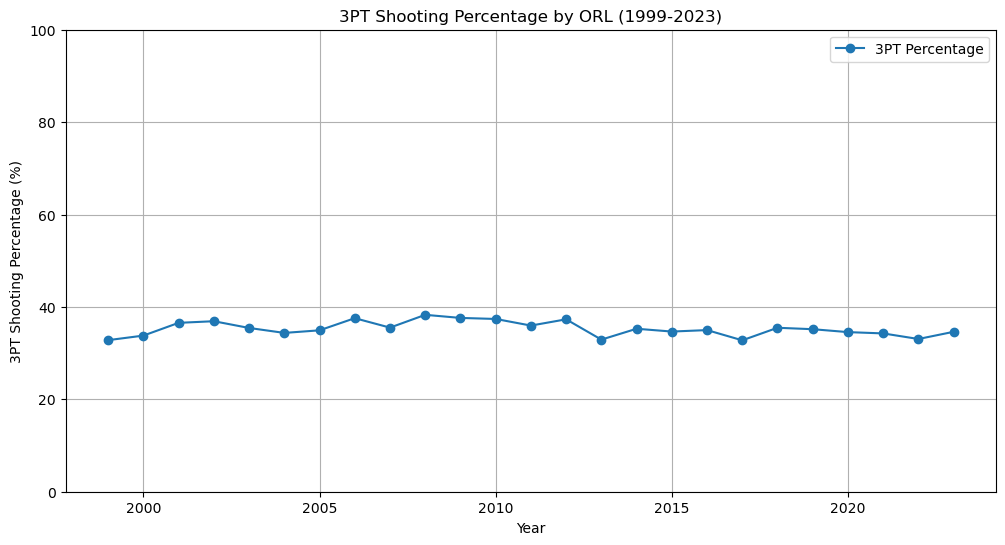

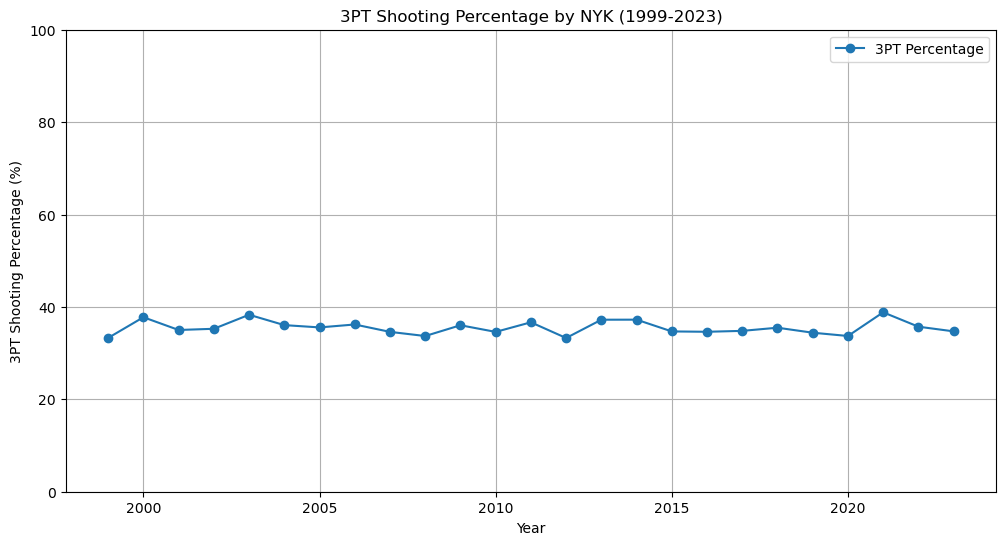

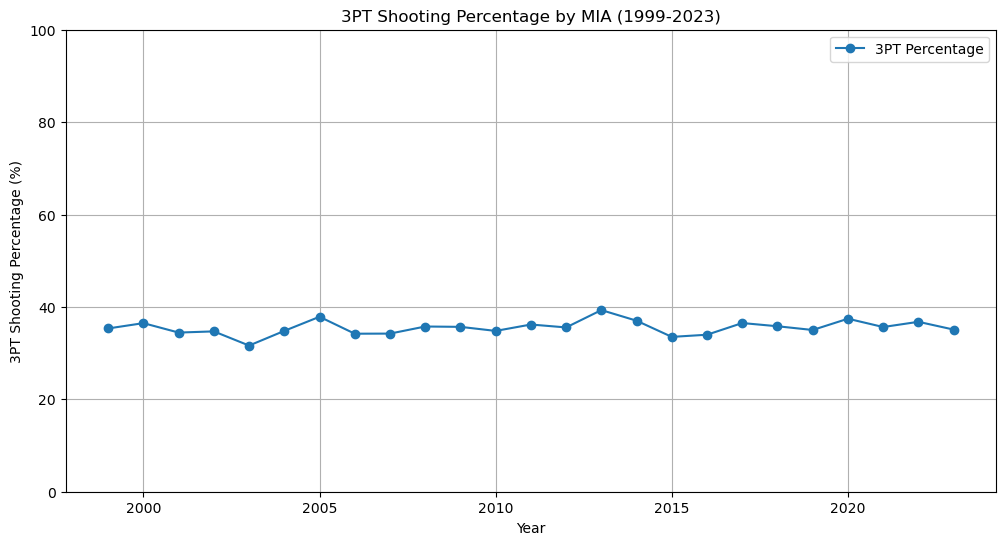

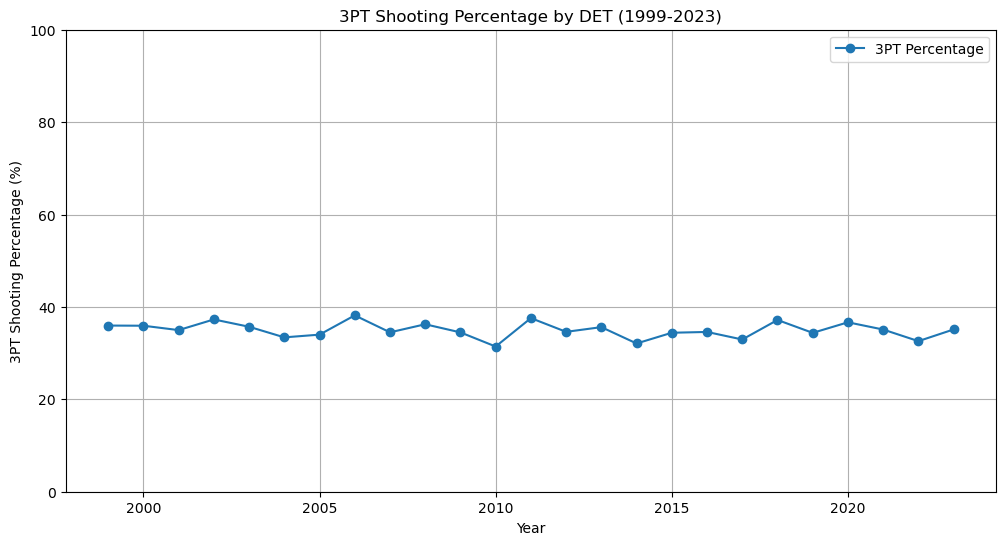

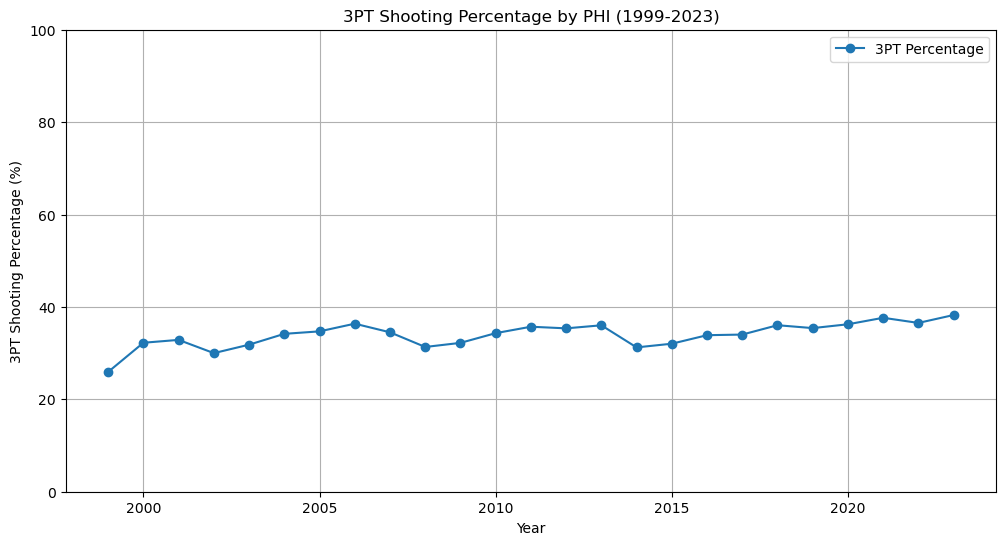

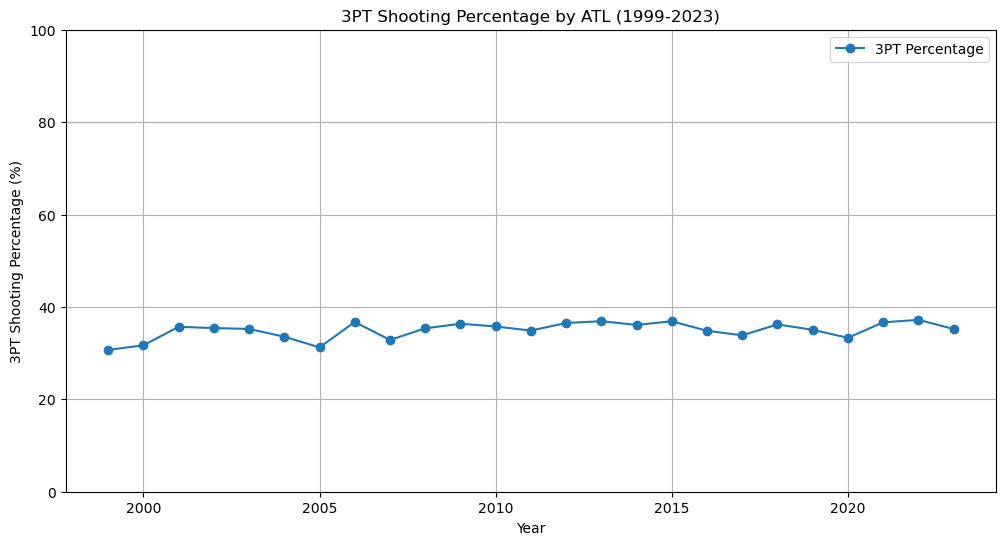

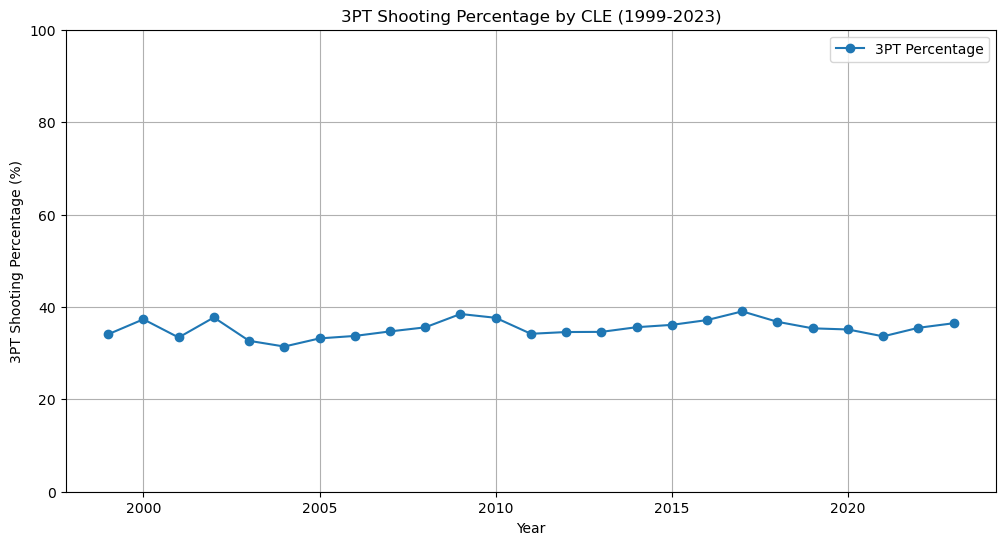

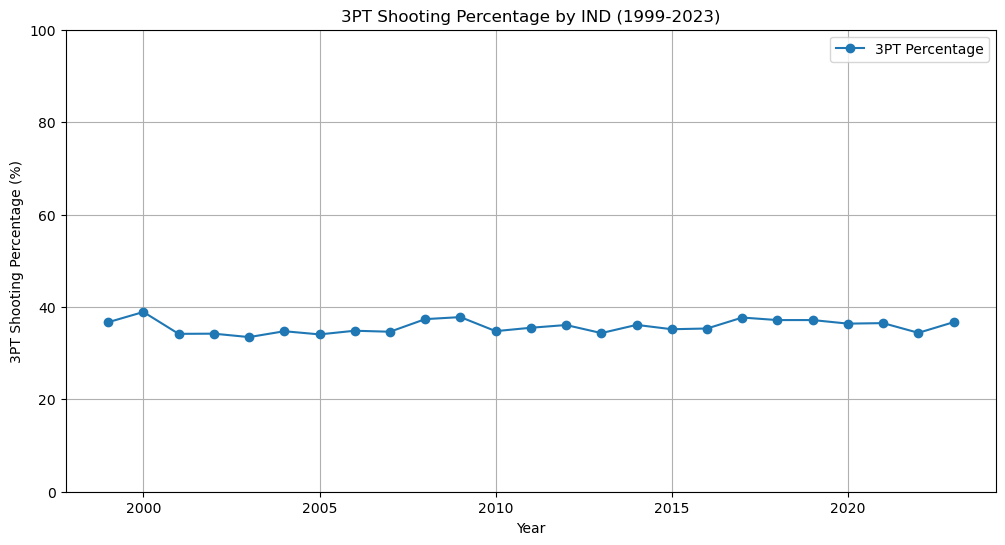

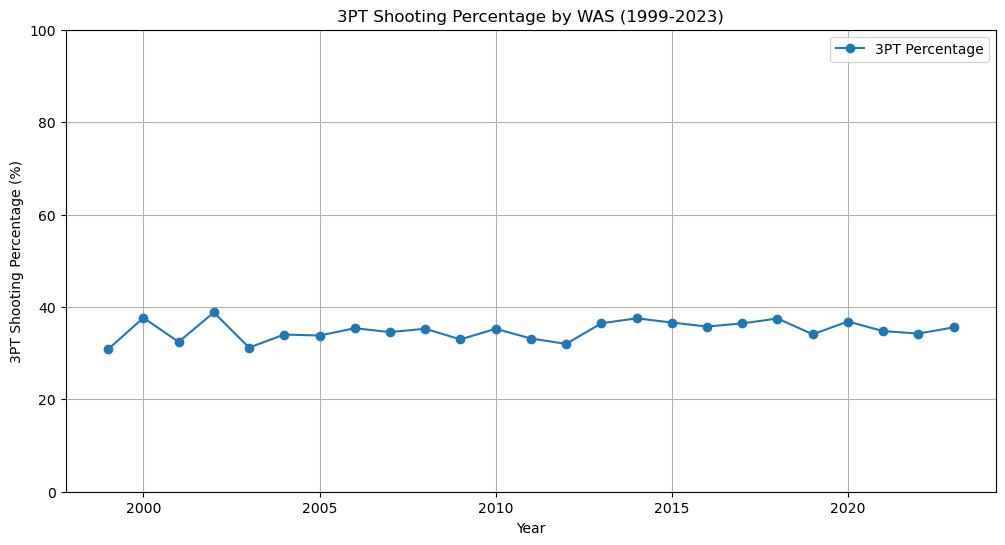

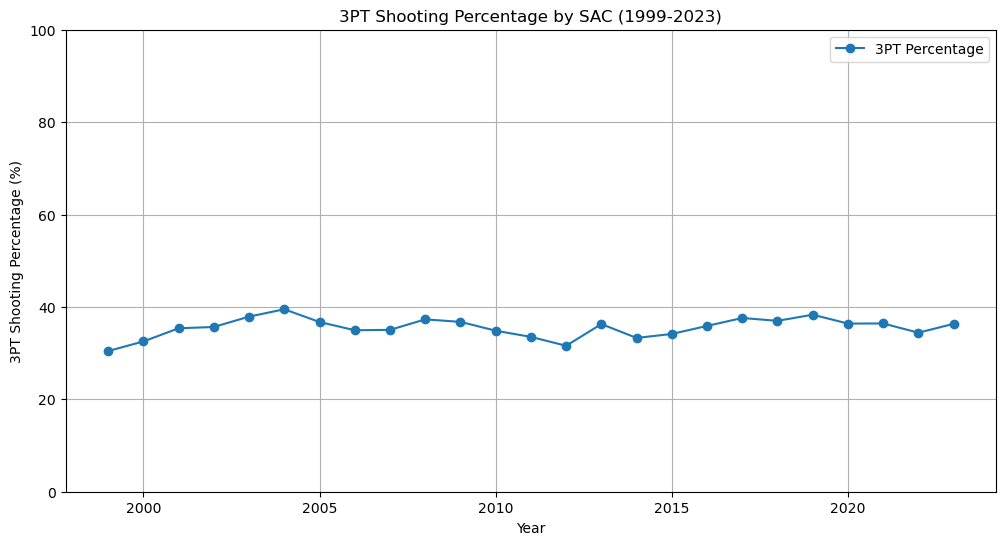

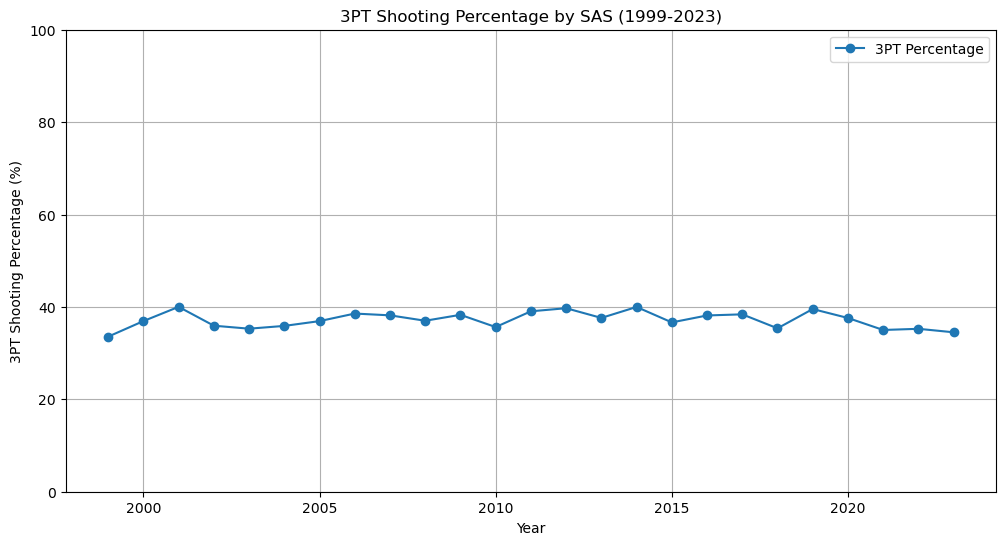

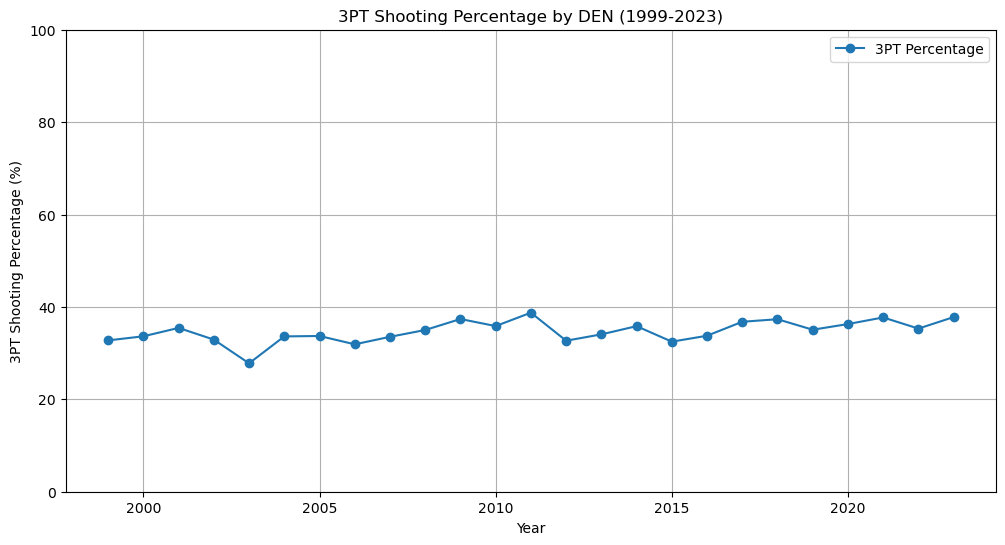

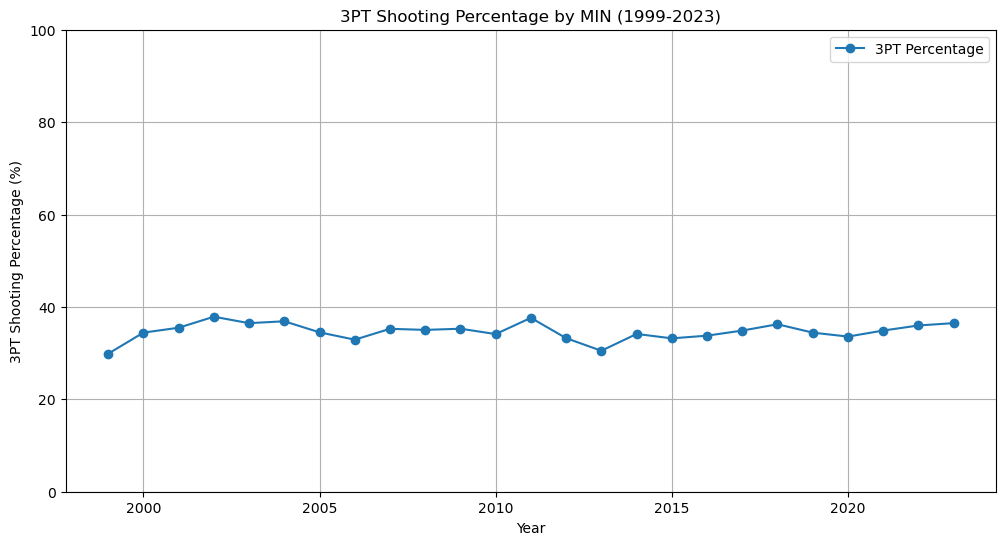

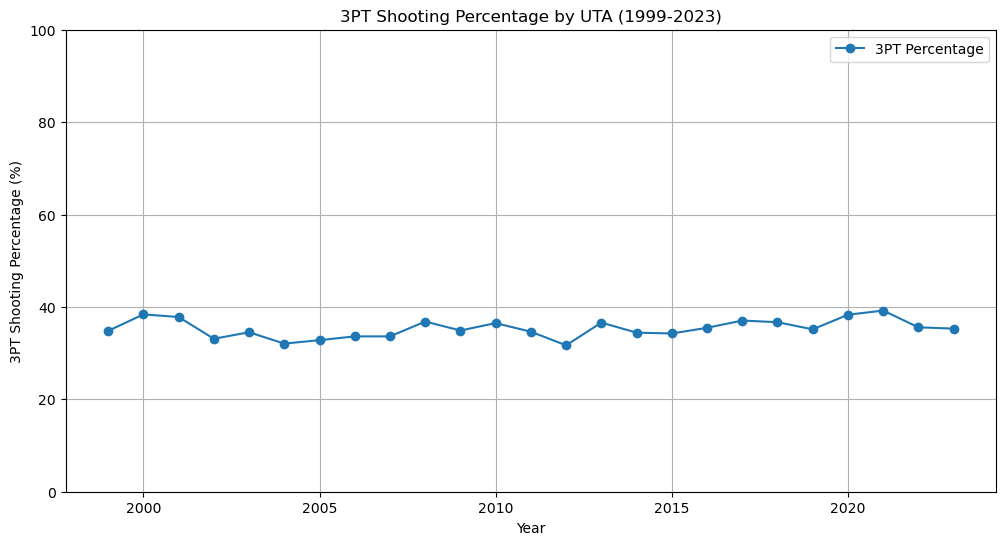

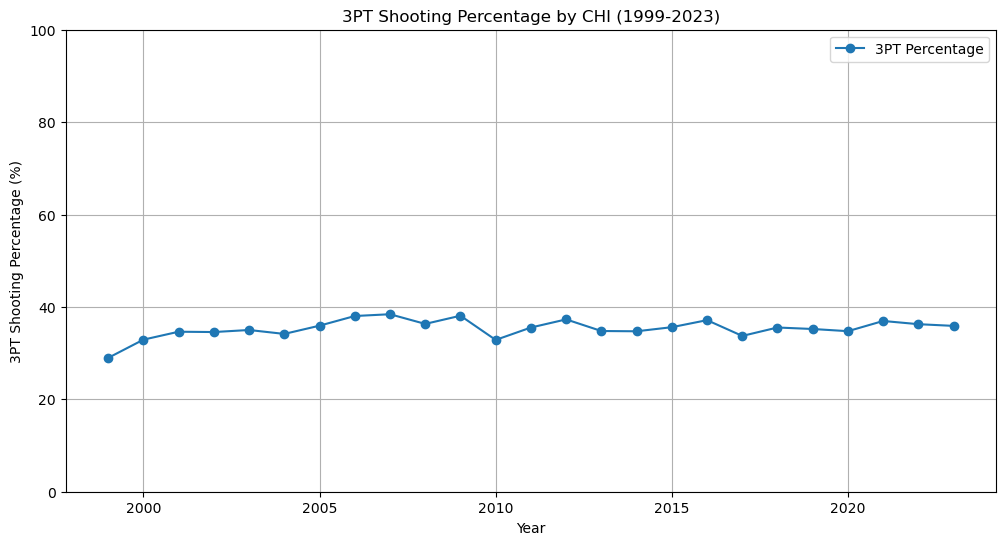

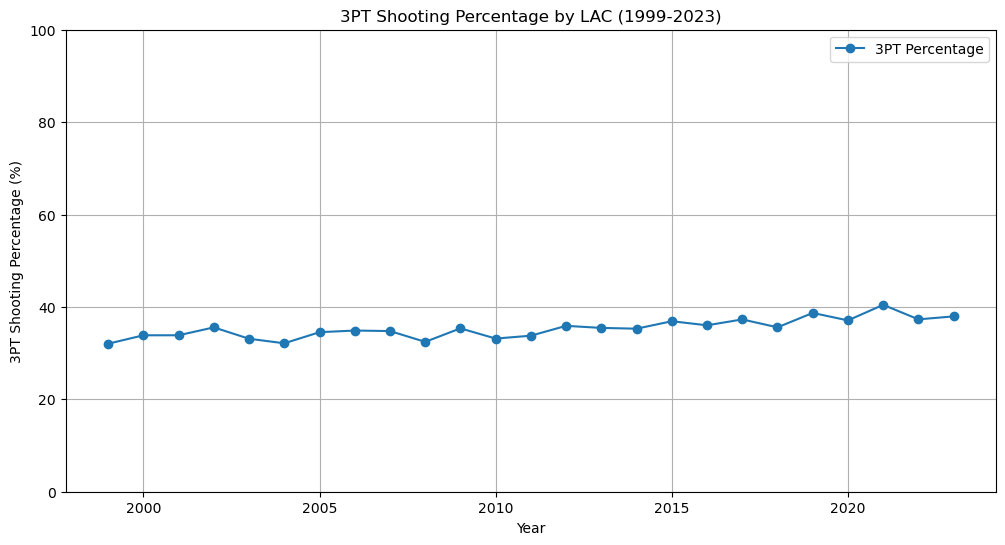

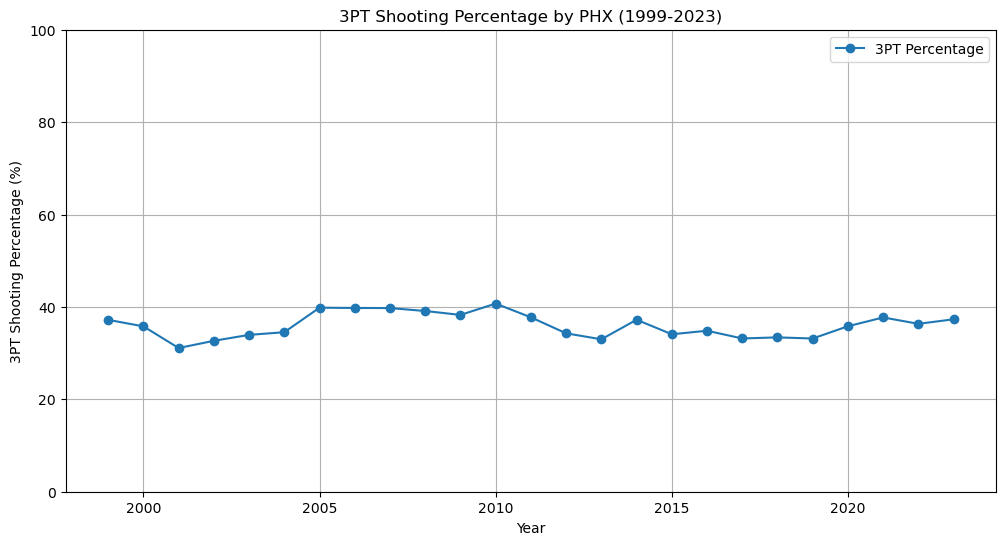

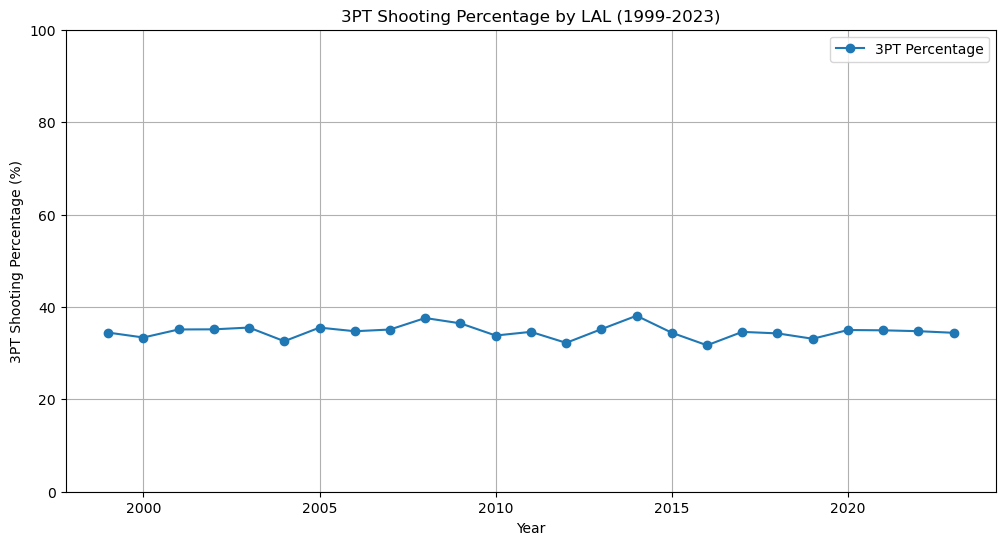

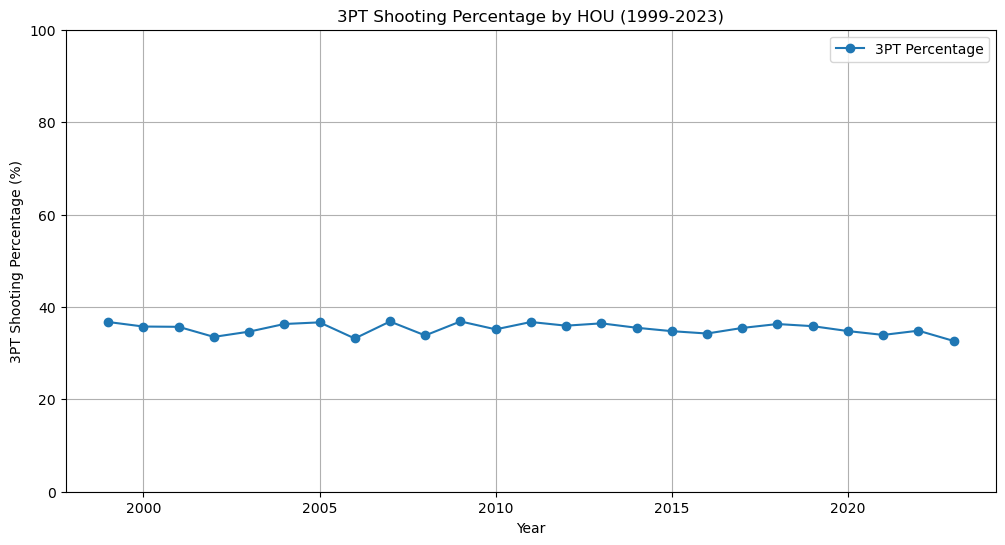

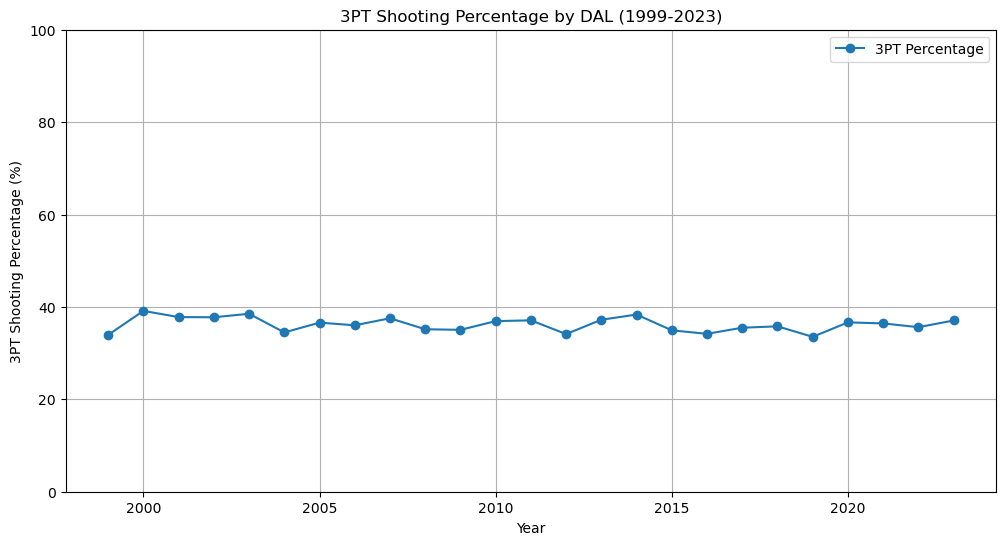

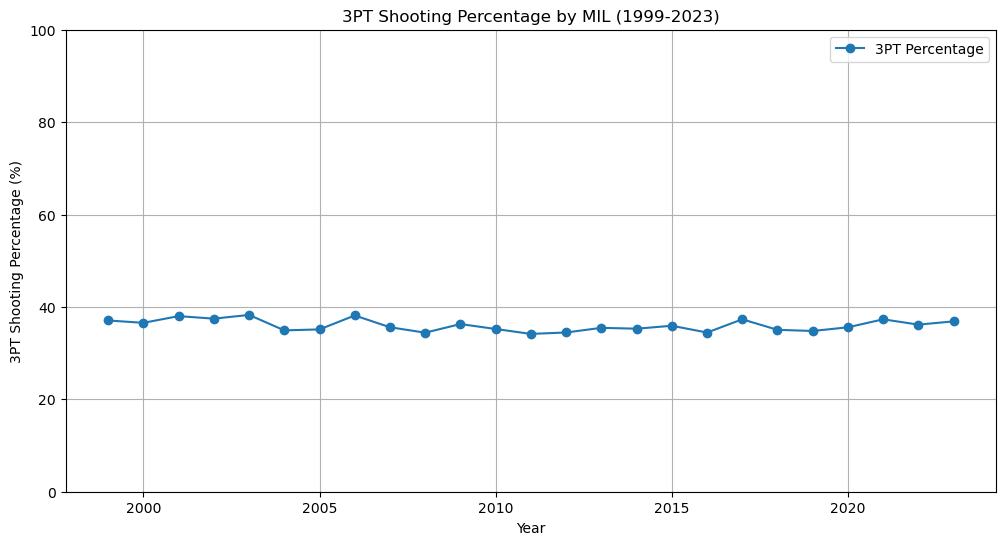

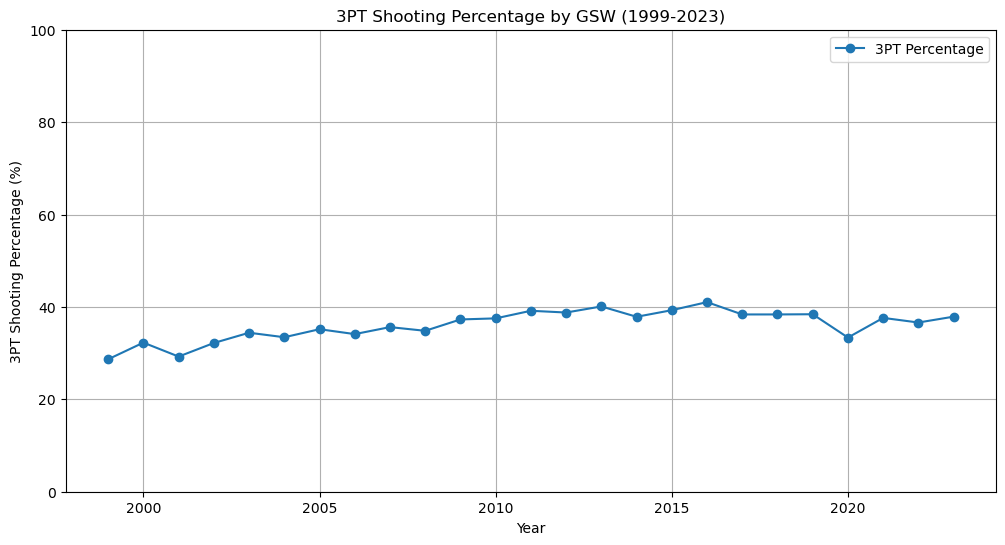

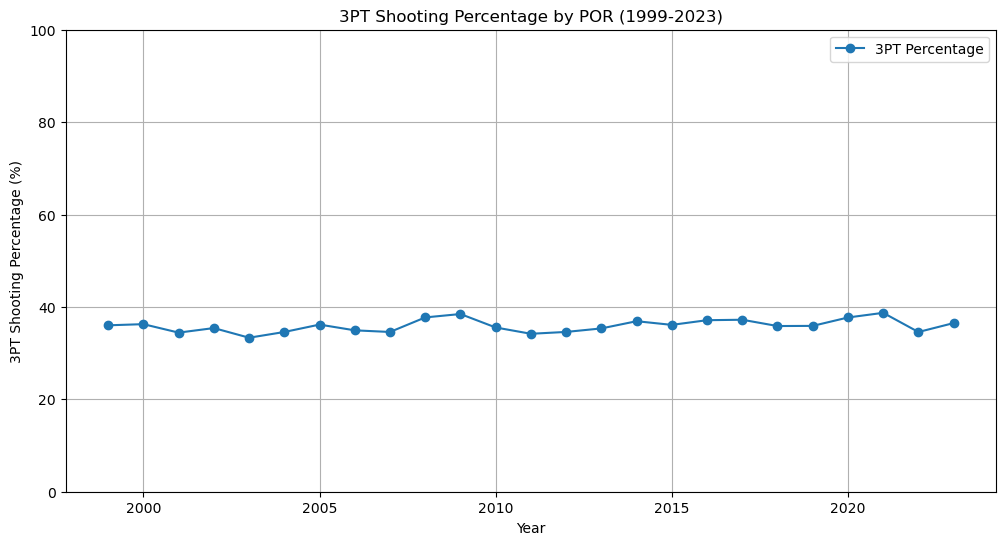

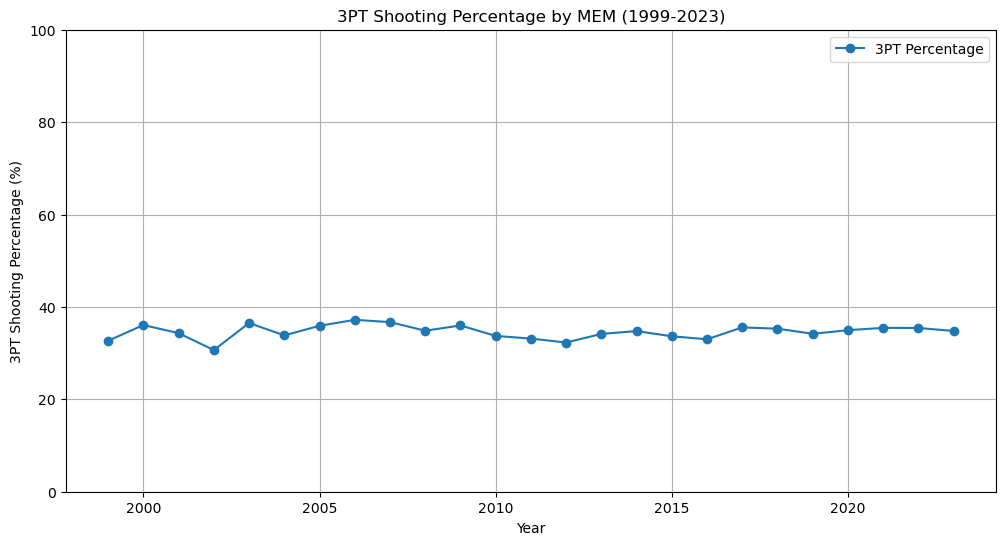

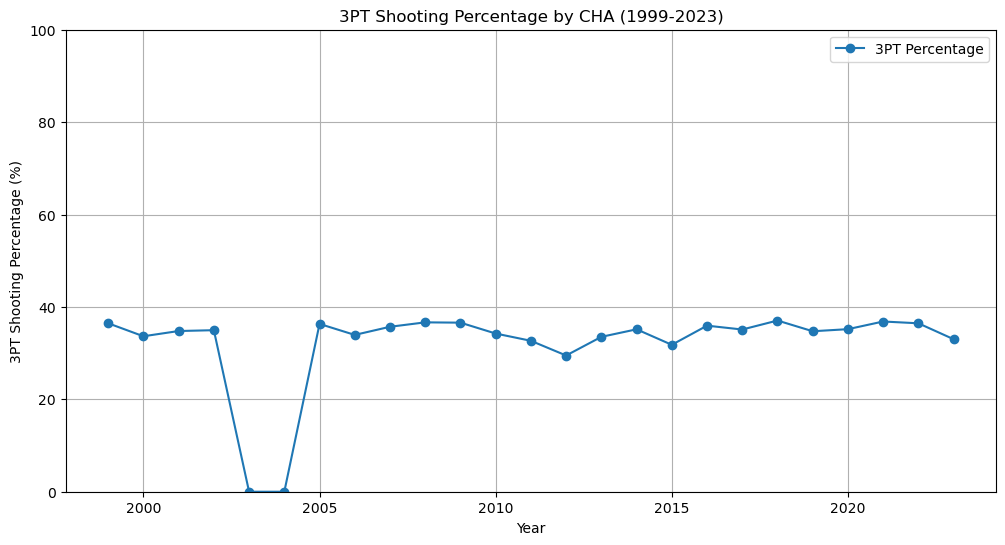

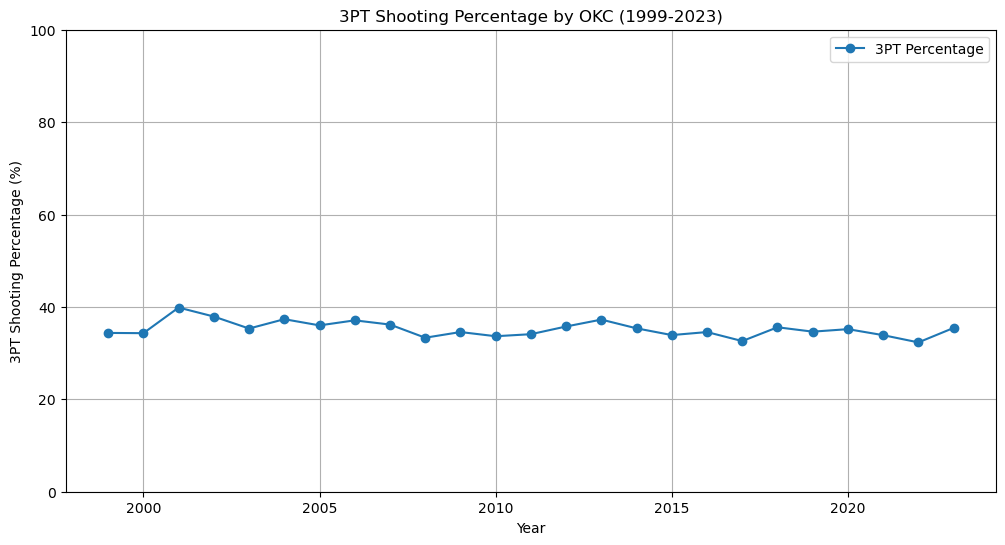

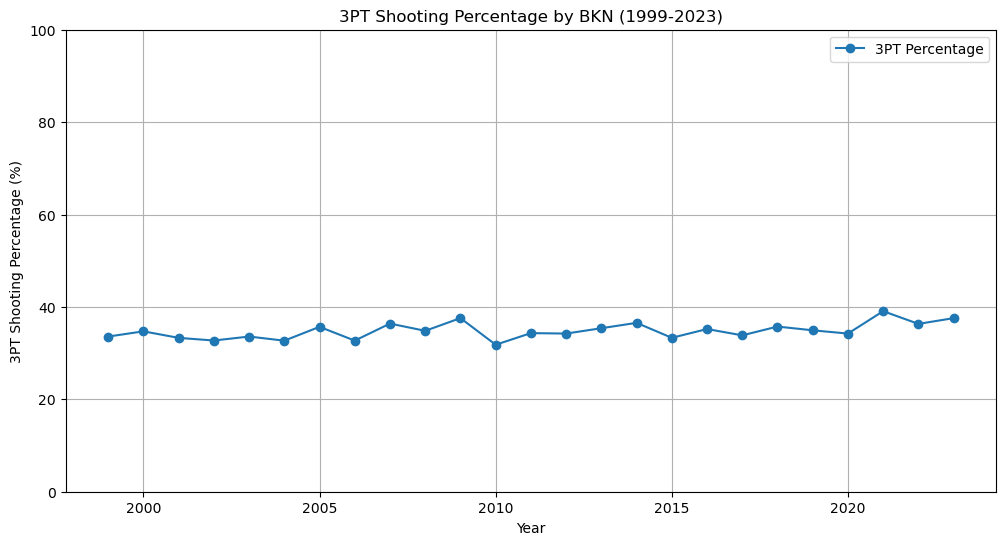

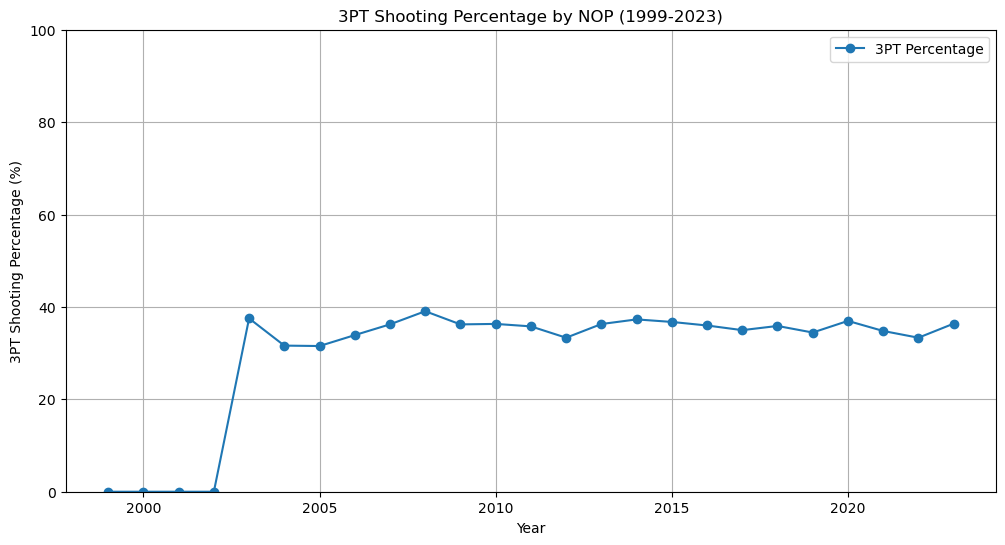

In [5]:
# Now, plot the 3PT shooting percentages
for team, data in teams_shots.items():
    made_shots_team = [year_data[0] for year_data in data]
    missed_shots_team = [year_data[1] for year_data in data]
    years = list(range(1999, 2023 + 1))

    # Calculate the 3PT shooting percentages
    percentages = [(made / (made + missed) * 100) if (made + missed) > 0 else 0 for made, missed in zip(made_shots_team, missed_shots_team)]

    # Plot the 3PT shooting percentages
    plt.figure(figsize=(12, 6))
    plt.plot(years, percentages, marker='o', label='3PT Percentage')

    # Add titles and labels
    plt.title(f"3PT Shooting Percentage by {team} (1999-2023)")
    plt.xlabel("Year")
    plt.ylabel("3PT Shooting Percentage (%)")
    plt.ylim(0, 100)  
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()